# Title of the analysis:

# *Analytical description of hotel-rooms' bookings that includes recommendations on how the featured accommodations can increase their average daily rates, followed by the completion of corroborative AB testing and concluded with the computation of a machine learning model predicting those very rates in unseen data.*

# Description of the dataset's columns: 

Can be found on this link: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

# Index of the analysis:

<ins> 1. Data Preprocessing for Exploratory Data Analysis </ins>

- 1.a) Top-level understanding of the dataset

- 1.b) Treatment of missing values

- 1.c) Elimination of duplicate rows

- 1.d) Transformation of categorical variables into numerical ones

- 1.e) Feature engineering

<ins> 2. Exploratory Data Analysis </ins>

- 2.a) Histogram display for the occurence-frequency of each numerical columns' values

- 2.b) Boxplot display for the dispersion of each numerical columns' values

- 2.c) Relation between metrics defining booking timing, duration, client-composition and preferences with average daily rates and cancellation rates

- 2.d) Filtered pivot tables detailing the top 20 bookings per average daily rate and cancellation rate

- 2.e) Correlation matrix relating all available booking characteristics to the actual average daily rate

<ins> 3. Data Preprocessing for Machine Learning </ins>

- 3.a) Outlier elimination

- 3.b) Dimensionality reduction via principal component analysis

- 3.c) Distribution fitting 

<ins> 4. AB Testing </ins>

<ins> 5. Machine Learning Model predicting Accommodations' Actual Average Daily Rate </ins>

# 1. Data Cleaning

## <ins>1.a) Top-level understanding of the dataset</ins>

In [1]:
import pandas as pd

file_path = '/Users/goncalolazaro/Downloads/hotel_bookings.csv'

pd.set_option('display.max_columns', None)

df = pd.read_csv(file_path)

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

## <ins>1.b) Treatment of missing values</ins>

In [4]:
# Checking for missing values in the dataset:

nan_values = df.isna()

any_missing_values = nan_values.any()

print("\nMissing Values in the Entire DataFrame?")
print(any_missing_values)

# Count the number of null values in each column
null_counts = df.isnull().sum()

print("Number of null values in each column:")
print(null_counts)


Missing Values in the Entire DataFrame?
hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True

## How I'm treating the missing data

- For column "children", which displays the number of children expected to be a part of each booking, I will assume that every null value is a booking that includes no children, which is why I will transform the missing data into 0.

- For column "country", which displays the country of origin of each person booking the accommodation, I will transform the missing data into "Unknown".

- For column "agent", which displays the id of the travel agency via which the accommodation was booked, I will eliminate the column from the dataframe, as the sheer amount of agencies combined with the absense of information about them makes any significant analysis impossible.

- For column "company", which displays the company that made each booking, the sheer amount of missing data makes any significant analysis impossible, which is why I will eliminate that column from the dataframe.

In [5]:
# Treating the missing data on the 4 columns I highlight above:

import numpy as np
from numpy import NaN

df['children'].fillna(0, inplace=True)

df['country'].fillna('Unknown', inplace=True)

df.drop(['agent', 'company'], axis=1, inplace=True)

df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0                  C                3   No Deposit                     0   
1                  C                4   No Deposit                     0   
2                  C                0   No Deposit                     0   
3                  A                0   No Deposit                     0   
4                  A                0   No Deposit                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

  reservation_status reservation_status_date  
0          Check-Out              2015-07-01  
1          Check-Out              2015-07-01  
2          Check-Out              2015-07-02  
3          Check-Out              2015-07-02  
4          Check-Out              2015-07-03

## <ins>1.c) Elimination of duplicate rows</ins>

In [6]:
# Checking for any duplicate rows and removing them

df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## <ins>1.d) Transformation of categorical variables into numerical ones</ins>

We do so because having categorical variables turned into numerical ones enables analyses of those that would otherwise be impossible. Examples of such would be correlation analysis or predictive modeling. 

Before we carry out that transformation we should understand if, for each column containing categorical variables, there is a ranking between the latter or not, as that will influence how the turn to numerical will take place:
- when a ranking exists, no new columns will be created 
- when a ranking doesn't exist, new columns will be created, one per categorical variables, and the original column with the categorical variables should be deleted

Moreover, for categorical columns that appear to have a large number of unique values, it would be sound to understand the sheer scale of those unique values to therefore know if it'd make sense to clusterize those into smaller, hence manageable, groups, before the turn to numerical happens.

In [7]:
# Checking what hotel types exist in the dataset to then decide if we transform the 'hotel' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_hotel_types = df['hotel'].unique()

print(unique_hotel_types)

['Resort Hotel' 'City Hotel']


In [8]:
# Checking what meal types exist in the dataset to then decide if we transform the 'meal' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_meal_types = df['meal'].unique()

print(unique_meal_types)

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [9]:
# Checking the sheer number of countries present in dataset so that I know if I'll clusterize them into smaller groups or not before proceeding to one-hot encoding

unique_country_types = df['country'].unique()

print(unique_country_types)

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA'
 'TMP' 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA'
 'LBY' 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV'

In [10]:
# Checking what market segments exist in the dataset to then decide if we transform the 'market segment' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_market_segments = df['market_segment'].unique()

print(unique_market_segments)

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [11]:
# Checking what distribution channels exist in the dataset to then decide if we transform the 'distribution channel' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_distribution_channels = df['distribution_channel'].unique()

print(unique_distribution_channels)

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [12]:
# Checking what reserved room types exist in the dataset to then decide if we transform the 'reserved room types' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_reserved_room_type = df['reserved_room_type'].unique()

print(unique_reserved_room_type)

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [13]:
# Checking what assigned room types exist in the dataset to then decide if we transform the 'assigned room types' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_assigned_room_type = df['assigned_room_type'].unique()

print(unique_assigned_room_type)

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [14]:
# Checking what deposit types exist in the dataset to then decide if we transform the 'deposit type' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_deposit_types = df['deposit_type'].unique()

print(unique_deposit_types)

['No Deposit' 'Refundable' 'Non Refund']


In [15]:
# Checking what customer types exist in the dataset to then decide if we transform the 'customer type' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_customer_types = df['customer_type'].unique()

print(unique_customer_types)

['Transient' 'Contract' 'Transient-Party' 'Group']


In [16]:
# Checking what reservation status types exist in the dataset to then decide if we transform the 'reservation status' column's categorical variables into numerical variables displayed in one column (happenning when a ranking exists between the variables) or several columns (happenning when a ranking does not exist between the variables)

unique_reservation_status_types = df['reservation_status'].unique()

print(unique_reservation_status_types)

['Check-Out' 'Canceled' 'No-Show']


## How I'm turning the categorical variables into numerical ones, on a per column basis

Columns whose categorical variables can be ranked between themselves, hence will be tranformed into numerical variables displayed in just one new column:

- arrival date month
- meal
- deposit type
- reservaton status
- reservation status date (dates will be converted to months before the transformation to numerical, as to make the column's data manageable)

Columns whose categorical variables cannot be ranked between themselves, hence will be tranformed into numerical variables displayed in several columns, one for each unique value:

- hotel
- country (country codes will be converted to supranational regions before the transformation to numerical, as to make the column's data manageable)
- market segment
- distribution channel
- reserved room type
- assigned room type
- customer type

In [17]:
# Turning the categorical columns whose variables can be ranked between themselves into numerical columns:

df['arrival_date_month'] = df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
df['meal'] = df['meal'].map({'Undefined': 0, 'SC': 1, 'BB': 2, 'HB': 3, 'FB': 4})
df['deposit_type'] = df['deposit_type'].map({'No Deposit': 1, 'Refundable': 2, 'Non Refund': 3})
df['reservation_status'] = df['reservation_status'].map({'Check-Out': 1, 'Canceled': 0, 'No-Show': 0})

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_month'] = df['reservation_status_date'].dt.month

columns_to_convert = ['arrival_date_month', 'meal', 'deposit_type', 'reservation_status']

for column in columns_to_convert:
    df[column] = df[column].astype(int)

df.head()

hotel  is_canceled  lead_time  arrival_date_year  \
0  Resort Hotel            0        342               2015   
1  Resort Hotel            0        737               2015   
2  Resort Hotel            0          7               2015   
3  Resort Hotel            0         13               2015   
4  Resort Hotel            0         14               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   7                        27                          1   
1                   7                        27                          1   
2                   7                        27                          1   
3                   7                        27                          1   
4                   7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
0     2     PRT         Direct               Direct                  0   
1     2     PRT         Direct               Direct                  0   
2     2     GBR         Direct               Direct                  0   
3     2     GBR      Corporate            Corporate                  0   
4     2     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes  deposit_type  days_in_waiting_list  \
0                  C                3             1                     0   
1                  C                4             1                     0   
2                  C                0             1                     0   
3                  A                0             1                     0   
4                  A                0             1                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0     Transient   0.0                            0                          0   
1     Transient   0.0                            0                          0   
2     Transient  75.0                            0                          0   
3     Transient  75.0                            0                          0   
4     Transient  98.0                            0                          1   

   reservation_status reservation_status_date  reservation_status_month  
0                   1              2015-07-01                         7  
1                   1              2015-07-01                         7  
2                   1              2015-07-02                         7  
3                   1              2015-07-02                         7  
4                   1              2015-07-03                         7

In [18]:
# Turning the categorical columns whose variables cannot be ranked between themselves into numerical columns via one-hot encoding:

continent_mapping = {
    'PRT': 'Europe', 'GBR': 'Europe', 'USA': 'North America', 'ESP': 'Europe', 'IRL': 'Europe', 
    'FRA': 'Europe', 'ROU': 'Europe', 'NOR': 'Europe', 'OMN': 'Asia', 'ARG': 'South America',
    'POL': 'Europe', 'DEU': 'Europe', 'BEL': 'Europe', 'CHE': 'Europe', 'CN': 'Asia', 'GRC': 'Europe',
    'ITA': 'Europe', 'NLD': 'Europe', 'DNK': 'Europe', 'RUS': 'Europe', 'SWE': 'Europe', 'AUS': 'Oceania',
    'EST': 'Europe', 'CZE': 'Europe', 'BRA': 'South America', 'FIN': 'Europe', 'MOZ': 'Africa',
    'BWA': 'Africa', 'LUX': 'Europe', 'SVN': 'Europe', 'ALB': 'Europe', 'IND': 'Asia', 'CHN': 'Asia',
    'MEX': 'North America', 'MAR': 'Africa', 'UKR': 'Europe', 'SMR': 'Europe', 'LVA': 'Europe',
    'PRI': 'North America', 'SRB': 'Europe', 'CHL': 'South America', 'AUT': 'Europe', 'BLR': 'Europe',
    'LTU': 'Europe', 'TUR': 'Asia', 'ZAF': 'Africa', 'AGO': 'Africa', 'ISR': 'Asia', 'CYM': 'North America',
    'ZMB': 'Africa', 'CPV': 'Africa', 'ZWE': 'Africa', 'DZA': 'Africa', 'KOR': 'Asia', 'CRI': 'North America',
    'HUN': 'Europe', 'ARE': 'Asia', 'TUN': 'Africa', 'JAM': 'North America', 'HRV': 'Europe', 'HKG': 'Asia',
    'IRN': 'Asia', 'GEO': 'Asia', 'AND': 'Europe', 'GIB': 'Europe', 'URY': 'South America', 'JEY': 'Europe',
    'CAF': 'Africa', 'CYP': 'Europe', 'COL': 'South America', 'GGY': 'Europe', 'KWT': 'Asia', 'NGA': 'Africa',
    'MDV': 'Asia', 'VEN': 'South America', 'SVK': 'Europe', 'FJI': 'Oceania', 'KAZ': 'Asia', 'PAK': 'Asia',
    'IDN': 'Asia', 'LBN': 'Asia', 'PHL': 'Asia', 'SEN': 'Africa', 'SYC': 'Africa', 'AZE': 'Asia', 'BHR': 'Asia',
    'NZL': 'Oceania', 'THA': 'Asia', 'DOM': 'North America', 'MKD': 'Europe', 'MYS': 'Asia', 'ARM': 'Asia',
    'JPN': 'Asia', 'LKA': 'Asia', 'CUB': 'North America', 'CMR': 'Africa', 'BIH': 'Europe', 'MUS': 'Africa',
    'COM': 'Africa', 'SUR': 'South America', 'UGA': 'Africa', 'BGR': 'Europe', 'CIV': 'Africa', 'JOR': 'Asia',
    'SYR': 'Asia', 'SGP': 'Asia', 'BDI': 'Africa', 'SAU': 'Asia', 'VNM': 'Asia', 'PLW': 'Oceania',
    'QAT': 'Asia', 'EGY': 'Africa', 'PER': 'South America', 'MLT': 'Europe', 'MWI': 'Africa', 'ECU': 'South America',
    'MDG': 'Africa', 'ISL': 'Europe', 'UZB': 'Asia', 'NPL': 'Asia', 'BHS': 'North America', 'MAC': 'Asia',
    'TGO': 'Africa', 'TWN': 'Asia', 'DJI': 'Africa', 'STP': 'Africa', 'KNA': 'North America', 'ETH': 'Africa',
    'IRQ': 'Asia', 'HND': 'North America', 'RWA': 'Africa', 'KHM': 'Asia', 'MCO': 'Europe', 'BGD': 'Asia',
    'IMN': 'Europe', 'TJK': 'Asia', 'NIC': 'North America', 'BEN': 'Africa', 'VGB': 'North America',
    'TZA': 'Africa', 'GAB': 'Africa', 'GHA': 'Africa', 'TMP': 'Asia', 'GLP': 'Europe', 'KEN': 'Africa',
    'LIE': 'Europe', 'GNB': 'Africa', 'MNE': 'Europe', 'UMI': 'North America', 'MYT': 'Africa', 'FRO': 'Europe',
    'MMR': 'Asia', 'PAN': 'North America', 'BFA': 'Africa', 'LBY': 'Africa', 'MLI': 'Africa', 'NAM': 'Africa',
    'BOL': 'South America', 'PRY': 'South America', 'BRB': 'North America', 'ABW': 'North America',
    'AIA': 'North America', 'SLV': 'North America', 'DMA': 'North America', 'PYF': 'Oceania', 'GUY': 'South America',
    'LCA': 'North America', 'ATA': 'Antarctica', 'GTM': 'North America', 'ASM': 'Oceania', 'MRT': 'Africa',
    'NCL': 'Oceania', 'KIR': 'Oceania', 'SDN': 'Africa', 'ATF': 'Antarctica', 'SLE': 'Africa', 'LAO': 'Asia'
}

df['continent'] = df['country'].map(continent_mapping)

df['hotel_copy'] = df['hotel'] #copy the already existing columns that i want to keep after the get-dummies part
df['continent_copy'] = df['continent']
df['market_segment_copy'] = df['market_segment']
df['distribution_channel_copy'] = df['distribution_channel']
df['reserved_room_type_copy'] = df['reserved_room_type']
df['assigned_room_type_copy'] = df['assigned_room_type']
df['customer_type_copy'] = df['customer_type']

df = pd.get_dummies(df, columns=['hotel', 'continent', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type'], drop_first=False)

df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        342               2015                   7   
1            0        737               2015                   7   
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal country  is_repeated_guest  previous_cancellations  \
0     2     PRT                  0                       0   
1     2     PRT                  0                       0   
2     2     GBR                  0                       0   
3     2     GBR                  0                       0   
4     2     GBR                  0                       0   

   previous_bookings_not_canceled  booking_changes  deposit_type  \
0                               0                3             1   
1                               0                4             1   
2                               0                0             1   
3                               0                0             1   
4                               0                0             1   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   1              2015-07-01   
1                          0                   1              2015-07-01   
2                          0                   1              2015-07-02   
3                          0                   1              2015-07-02   
4                          1                   1              2015-07-03   

   reservation_status_month    hotel_copy continent_copy market_segment_copy  \
0                         7  Resort Hotel         Europe              Direct   
1                         7  Resort Hotel         Europe              Direct   
2                         7  Resort Hotel         Europe              Direct   
3                         7  Resort Hotel         Europe           Corporate   
4                         7  Resort Hotel         Europe           Online TA   

  distribution_channel_copy reserved_room_type_copy assigned_room_type_copy  \
0                    Direct                       C                       C   
1                    Direct                       C                       C   
2                    Direct                       A                       C   
3                 Corporate                       A                       A   
4                     TA/TO                       A                       A   

  customer_type_copy  hotel_City Hotel  hotel_Resort Hotel  continent_Africa  \
0          Transient             False                True             False   
1          Transient             False          

In [19]:
# Turning the 'True' and 'False' values of the newly formed columns into 1's and 0's (respectively):

binary_columns = [
    'hotel_City Hotel', 'hotel_Resort Hotel', 'continent_Africa', 'continent_Antarctica', 'continent_Asia',
    'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America',
    'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct',
    'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined',
    'distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_GDS',
    'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_A', 'reserved_room_type_B',
    'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
    'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P', 'assigned_room_type_A', 'assigned_room_type_B',
    'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G',
    'assigned_room_type_H', 'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P',
    'customer_type_Contract', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party'
]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

for column in binary_columns:
    df[column] = df[column].astype(int) 

df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        342               2015                   7   
1            0        737               2015                   7   
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal country  is_repeated_guest  previous_cancellations  \
0     2     PRT                  0                       0   
1     2     PRT                  0                       0   
2     2     GBR                  0                       0   
3     2     GBR                  0                       0   
4     2     GBR                  0                       0   

   previous_bookings_not_canceled  booking_changes  deposit_type  \
0                               0                3             1   
1                               0                4             1   
2                               0                0             1   
3                               0                0             1   
4                               0                0             1   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   1              2015-07-01   
1                          0                   1              2015-07-01   
2                          0                   1              2015-07-02   
3                          0                   1              2015-07-02   
4                          1                   1              2015-07-03   

   reservation_status_month    hotel_copy continent_copy market_segment_copy  \
0                         7  Resort Hotel         Europe              Direct   
1                         7  Resort Hotel         Europe              Direct   
2                         7  Resort Hotel         Europe              Direct   
3                         7  Resort Hotel         Europe           Corporate   
4                         7  Resort Hotel         Europe           Online TA   

  distribution_channel_copy reserved_room_type_copy assigned_room_type_copy  \
0                    Direct                       C                       C   
1                    Direct                       C                       C   
2                    Direct                       A                       C   
3                 Corporate                       A                       A   
4                     TA/TO                       A                       A   

  customer_type_copy  hotel_City Hotel  hotel_Resort Hotel  continent_Africa  \
0          Transient                 0                   1                 0   
1          Transient                 0          

## <ins>1.e) Feature engineering</ins>

After analysing the numerical variables the dataset provides, I have decided to compute 8 new columns, those being:

- Total number of people = Adults + Children + Babies
- Actual ADR = ADR (when the booking hasn't been canceled or no-show) or 0 (when the booking has been canceled or no-show)
- Total actual revenue = Actual ADR x (Number of weekend nights in the booking + Number of week nights in the booking)
- Total number of days in stay = Stays in weekend nights + Stays in week nights
- Arrival date
- Check out date 
- Quarter arrival = yearly quarter (Q1, Q2, Q3 or Q4) in which the customer's arrival occured
- Match reserved and assigned room = retrieves a 1 if the room assigned to the customer matches the room reserved and 0 if it doesn't

The calculation of 'Total number of people' creates a metric that allows for analyses concerning amounts of customers and their relation with the other characteristics of the dataset in a way that's more manageable and succint than if the metrics "Adults", "Children" & "Babies" had been used separately for the same purpose.

As far as 'Actual ADR', this metric is essentially the ADR when accounting for the cancellation rate, therefore illustrating the true ADR. Will be used as the true success metric of our analysis.

Moreover, 'Total actual revenue' allows for studies concerning which of the dataset's characteristics correlate with the most total gross revenue.

Furthermore, 'Total number of days in stay' allows for studies on what stay durations correlate with other characteristics of the dataset, i.e.: Actual ADR per person, booking origin or lead time

'Arrival date', 'Check out date' and 'Quarter arrival' all allow for studies correlating accommodation dates to the other characteristics of the dataset, with the latter metric allowing for a manageable view of those correlations (instead of one that's too detailed).

'Match reserved and assigned room' allows for studies concerning how clusters of accommodations are catering to their customers' reserved rooms. 

In [20]:
# Computing the 8 aforementioned columns:

df['total_number_of_people'] = df['adults'] + df['children'] + df['babies']

def calculate_actual_adr(row):
    if row['is_canceled'] == 0:
        return row['adr']
    else:
        return 0

df['actual_adr'] = df.apply(calculate_actual_adr, axis=1)

df['total_actual_revenue'] = df['actual_adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

df['total_number_of_days_in_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))

quarters = pd.PeriodIndex(df['arrival_date'], freq='Q')

df['quarter_arrival'] = quarters.quarter

df['check_out_date'] = df['arrival_date'] + pd.to_timedelta(df['total_number_of_days_in_stay'], unit='D')

df['match_reserved_and_assigned_room'] = (df['reserved_room_type_copy'] == df['assigned_room_type_copy']).astype(int)

df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        342               2015                   7   
1            0        737               2015                   7   
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal country  is_repeated_guest  previous_cancellations  \
0     2     PRT                  0                       0   
1     2     PRT                  0                       0   
2     2     GBR                  0                       0   
3     2     GBR                  0                       0   
4     2     GBR                  0                       0   

   previous_bookings_not_canceled  booking_changes  deposit_type  \
0                               0                3             1   
1                               0                4             1   
2                               0                0             1   
3                               0                0             1   
4                               0                0             1   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   1              2015-07-01   
1                          0                   1              2015-07-01   
2                          0                   1              2015-07-02   
3                          0                   1              2015-07-02   
4                          1                   1              2015-07-03   

   reservation_status_month    hotel_copy continent_copy market_segment_copy  \
0                         7  Resort Hotel         Europe              Direct   
1                         7  Resort Hotel         Europe              Direct   
2                         7  Resort Hotel         Europe              Direct   
3                         7  Resort Hotel         Europe           Corporate   
4                         7  Resort Hotel         Europe           Online TA   

  distribution_channel_copy reserved_room_type_copy assigned_room_type_copy  \
0                    Direct                       C                       C   
1                    Direct                       C                       C   
2                    Direct                       A                       C   
3                 Corporate                       A                       A   
4                     TA/TO                       A                       A   

  customer_type_copy  hotel_City Hotel  hotel_Resort Hotel  continent_Africa  \
0          Transient                 0                   1                 0   
1          Transient                 0          

I also have decided to clusterize the column 'lead_time' in an attempt to make it more manageable for purposes of creating a pivot table and drawing insights out of this variable:

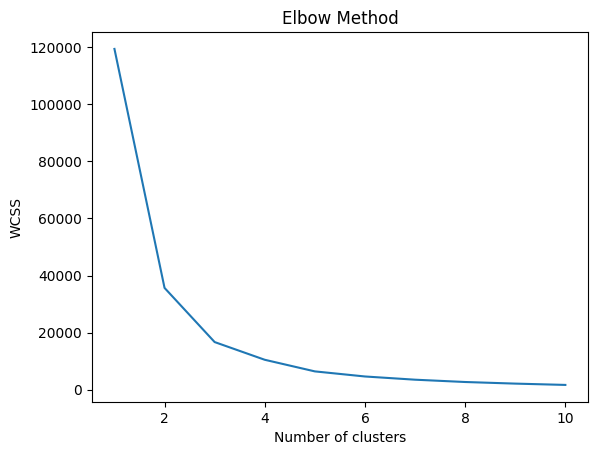

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

lead_time_data = df['lead_time'].values.reshape(-1, 1)  # Reshape data for clustering

# Standardize the data
scaler = StandardScaler()
lead_time_data_scaled = scaler.fit_transform(lead_time_data)

# Choosing the number of clusters (k) using Elbow method
# WCSS (Within-Cluster Sum of Squares) will help us decide the optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(lead_time_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method to find the optimal k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# From the plot, choose the optimal value of k

# Applying K-means clustering

# Choose the optimal number of clusters based on the Elbow method (where on the plot above the 'elbow' occurs, which is around the 'number of clusters' 2 and 3)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(lead_time_data_scaled)

# Adding cluster labels to the DataFrame
df['lead_time_cluster'] = cluster_labels

# Viewing the DataFrame with cluster labels
df.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        342               2015                   7   
1            0        737               2015                   7   
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   meal country  is_repeated_guest  previous_cancellations  \
0     2     PRT                  0                       0   
1     2     PRT                  0                       0   
2     2     GBR                  0                       0   
3     2     GBR                  0                       0   
4     2     GBR                  0                       0   

   previous_bookings_not_canceled  booking_changes  deposit_type  \
0                               0                3             1   
1                               0                4             1   
2                               0                0             1   
3                               0                0             1   
4                               0                0             1   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests  reservation_status reservation_status_date  \
0                          0                   1              2015-07-01   
1                          0                   1              2015-07-01   
2                          0                   1              2015-07-02   
3                          0                   1              2015-07-02   
4                          1                   1              2015-07-03   

   reservation_status_month    hotel_copy continent_copy market_segment_copy  \
0                         7  Resort Hotel         Europe              Direct   
1                         7  Resort Hotel         Europe              Direct   
2                         7  Resort Hotel         Europe              Direct   
3                         7  Resort Hotel         Europe           Corporate   
4                         7  Resort Hotel         Europe           Online TA   

  distribution_channel_copy reserved_room_type_copy assigned_room_type_copy  \
0                    Direct                       C                       C   
1                    Direct                       C                       C   
2                    Direct                       A                       C   
3                 Corporate                       A                       A   
4                     TA/TO                       A                       A   

  customer_type_copy  hotel_City Hotel  hotel_Resort Hotel  continent_Africa  \
0          Transient                 0                   1                 0   
1          Transient                 0          

In [23]:
# Describing again the numerical columns of the dataset, which is necessary considering there were categorical columns turned into numerical that weren't featured in the same description of the kind. 

df.describe()

is_canceled      lead_time  arrival_date_year  arrival_date_month  \
count  119390.000000  119390.000000      119390.000000       119390.000000   
mean        0.370416     104.011416        2016.156554            6.552483   
min         0.000000       0.000000        2015.000000            1.000000   
25%         0.000000      18.000000        2016.000000            4.000000   
50%         0.000000      69.000000        2016.000000            7.000000   
75%         1.000000     160.000000        2017.000000            9.000000   
max         1.000000     737.000000        2017.000000           12.000000   
std         0.482918     106.863097           0.707476            3.090619   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   
std                   13.605138                   8.780829   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   
std                   0.998613              1.908286       0.579261   

            children         babies           meal  is_repeated_guest  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean        0.103886       0.007949       2.025722           0.031912   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       2.000000           0.000000   
50%         0.000000       0.000000       2.000000           0.000000   
75%         0.000000       0.000000       2.000000           0.000000   
max        10.000000      10.000000       4.000000           1.000000   
std         0.398555       0.097436       0.524963           0.175767   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   
std                  0.844336                        1.497437   

       booking_changes   deposit_type  days_in_waiting_list            adr  \
count    119390.000000  119390.000000         119390.000000  119390.000000   
mean          0.221124       1.245716              2.321149     101.831122   
min           0.000000       1.000000              0.000000      -6.380000   
25%           0.000000       1.000000              0.000000      69.290000   
50%           0.000000       1.000000              0.000000      94.575000   
75%           0.000000       1.000000              0.000000     126.000000   
max          21.000000       3.000000            391.000000    5400.000000   
std           0.652306       0.655517             17.594721      50.535790   

       required_car_parking_spaces  total_of_special_requests  \
count                119390.000000              119390.000000   
mean                      0.06

# 2. Exploratory Data Analysis

## <ins>2.a) Histogram display for the occurence-frequency of each numerical columns' values</ins>

I'm displaying a group of Histograms which show, for each now-numerical column (meaning, I'm including, in the following plot, the dataset's once-categorical now-turned-numerical columns) the frequency of accommodations per featured categories.

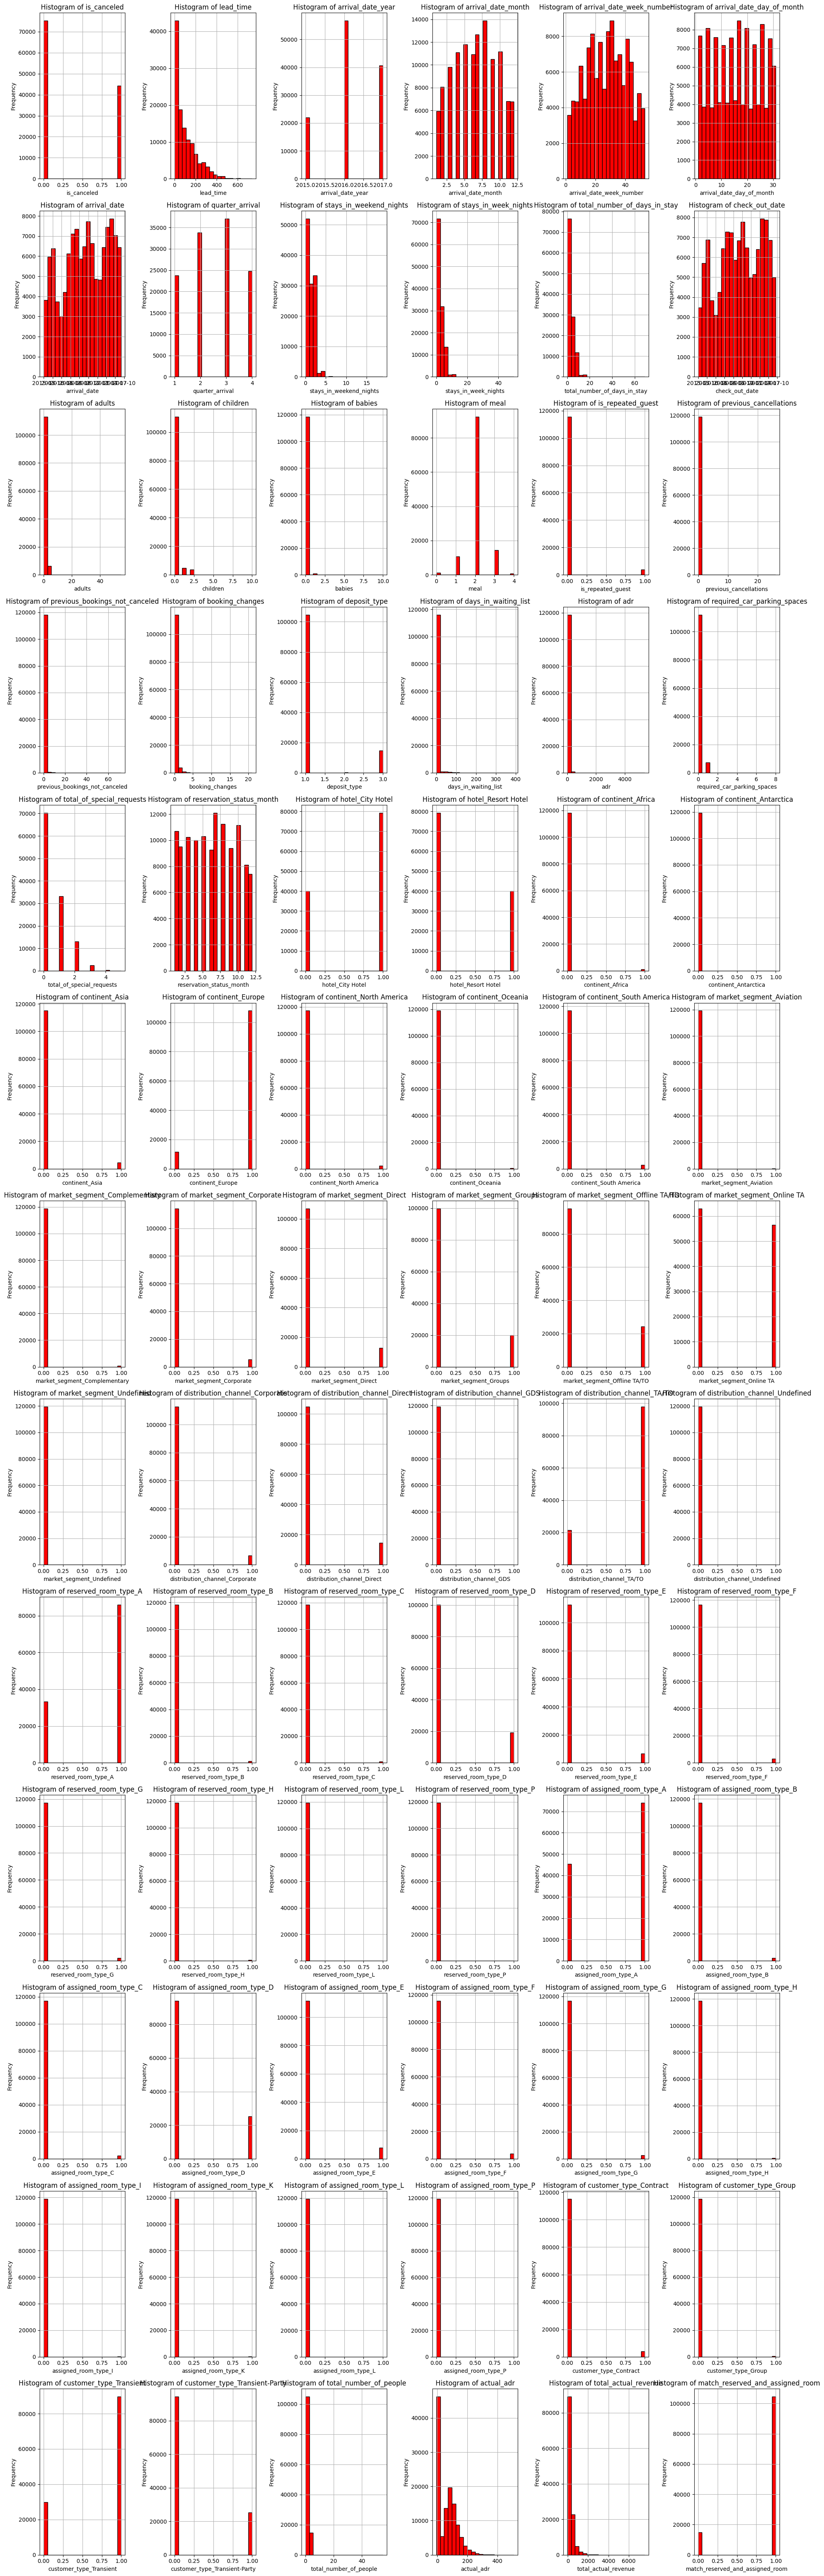

In [24]:
columns_to_plot = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date', 'quarter_arrival', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_number_of_days_in_stay', 'check_out_date', 'adults', 'children', 'babies', 'meal', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_month', 'hotel_City Hotel', 'hotel_Resort Hotel', 'continent_Africa', 'continent_Antarctica', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P', 'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P', 'customer_type_Contract', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'total_number_of_people', 'actual_adr', 'total_actual_revenue', 'match_reserved_and_assigned_room']

num_columns = 6  
num_rows = -(-len(columns_to_plot) // num_columns)  

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5*num_rows))

for i, column in enumerate(columns_to_plot):
    row = i // num_columns
    col = i % num_columns
    df[column].replace([np.inf, -np.inf], np.nan, inplace=True)
    axes[row, col].hist(df[column], bins=20, color='red', edgecolor='black')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

## <ins>2.b) Boxplot display for the dispersion of each numerical columns' values</ins>

I'm displaying a group of boxplots, each for every numerical column in our dataset and each showing dispersion-related metrics: the inter-quartile range (which identifies the 25th and 75th percentiles), the median and the distribution's outliers. 

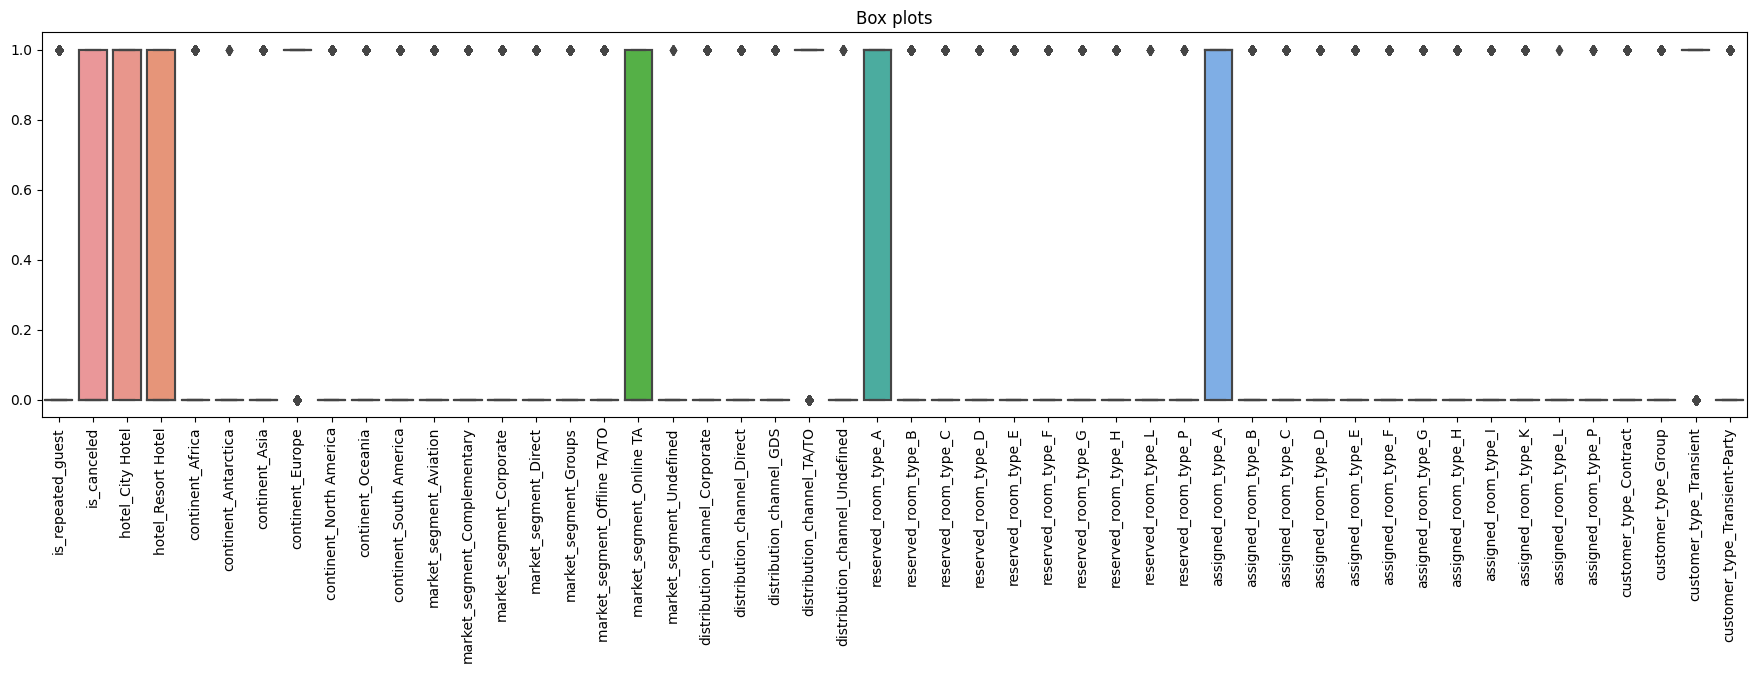

In [25]:
import seaborn as sns

binary_columns = ['is_repeated_guest', 'is_canceled', 'hotel_City Hotel', 'hotel_Resort Hotel', 'continent_Africa', 'continent_Antarctica', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'reserved_room_type_A', 'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H', 'reserved_room_type_L', 'reserved_room_type_P', 'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P', 'customer_type_Contract', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party']

plt.figure(figsize=(22,5))

ax = sns.boxplot(data=df[binary_columns])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.boxplot(data=df[binary_columns])

plt.title('Box plots')

plt.show()

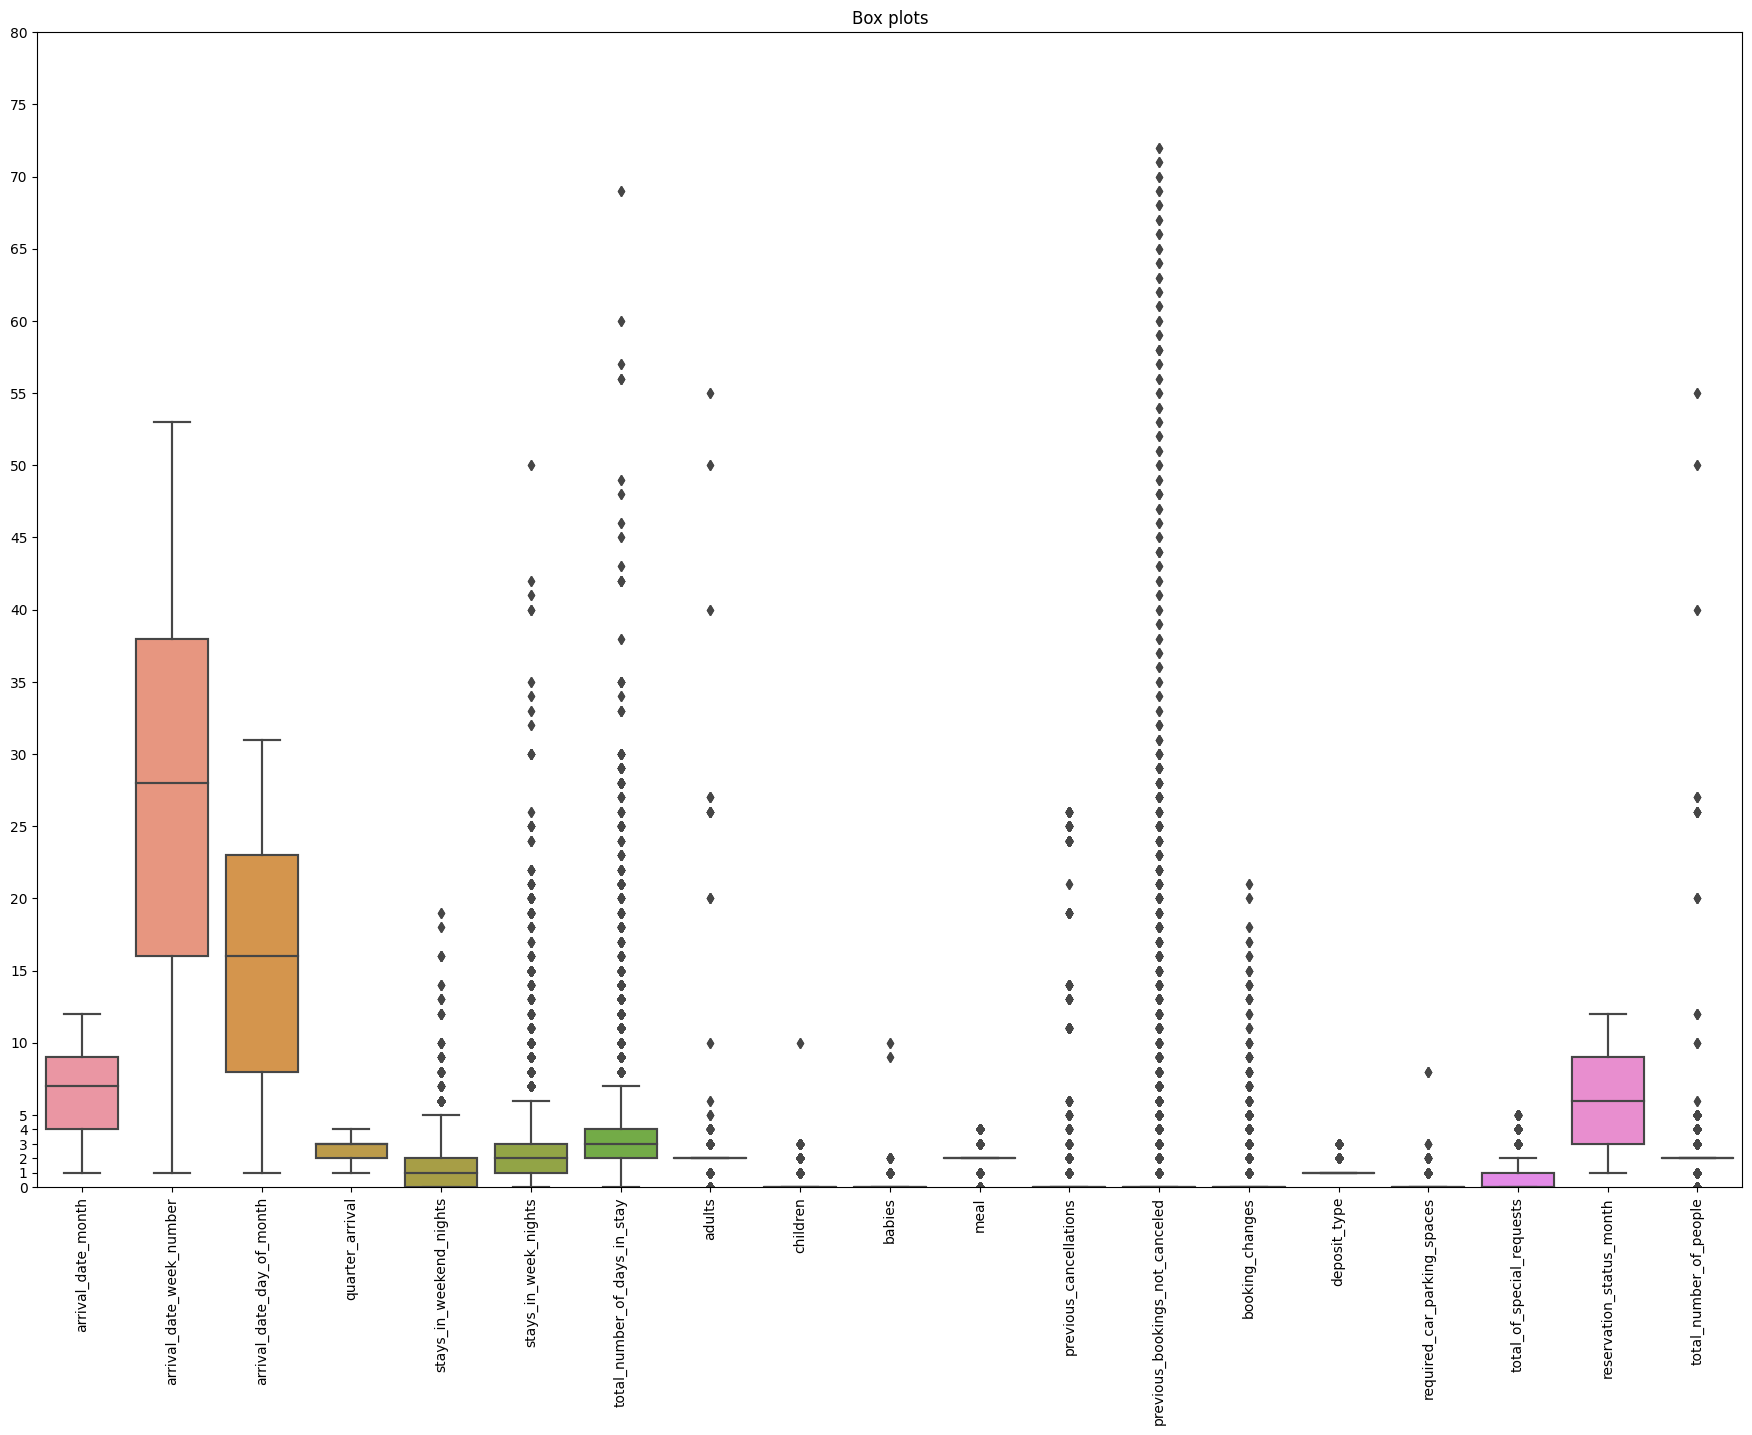

In [26]:
numerical_columns_a = ['arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'quarter_arrival', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_number_of_days_in_stay', 'adults', 'children', 'babies', 'meal', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'deposit_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_month', 'total_number_of_people']

plt.figure(figsize=(22,15))

ax = sns.boxplot(data=df[numerical_columns_a])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.boxplot(data=df[numerical_columns_a])

plt.ylim(bottom=0)

additional_ticks = [1, 2, 3, 4, 5, 15, 25, 35, 45, 55, 65, 75] 
plt.yticks(list(plt.yticks()[0]) + additional_ticks)

plt.title('Box plots')

plt.show()

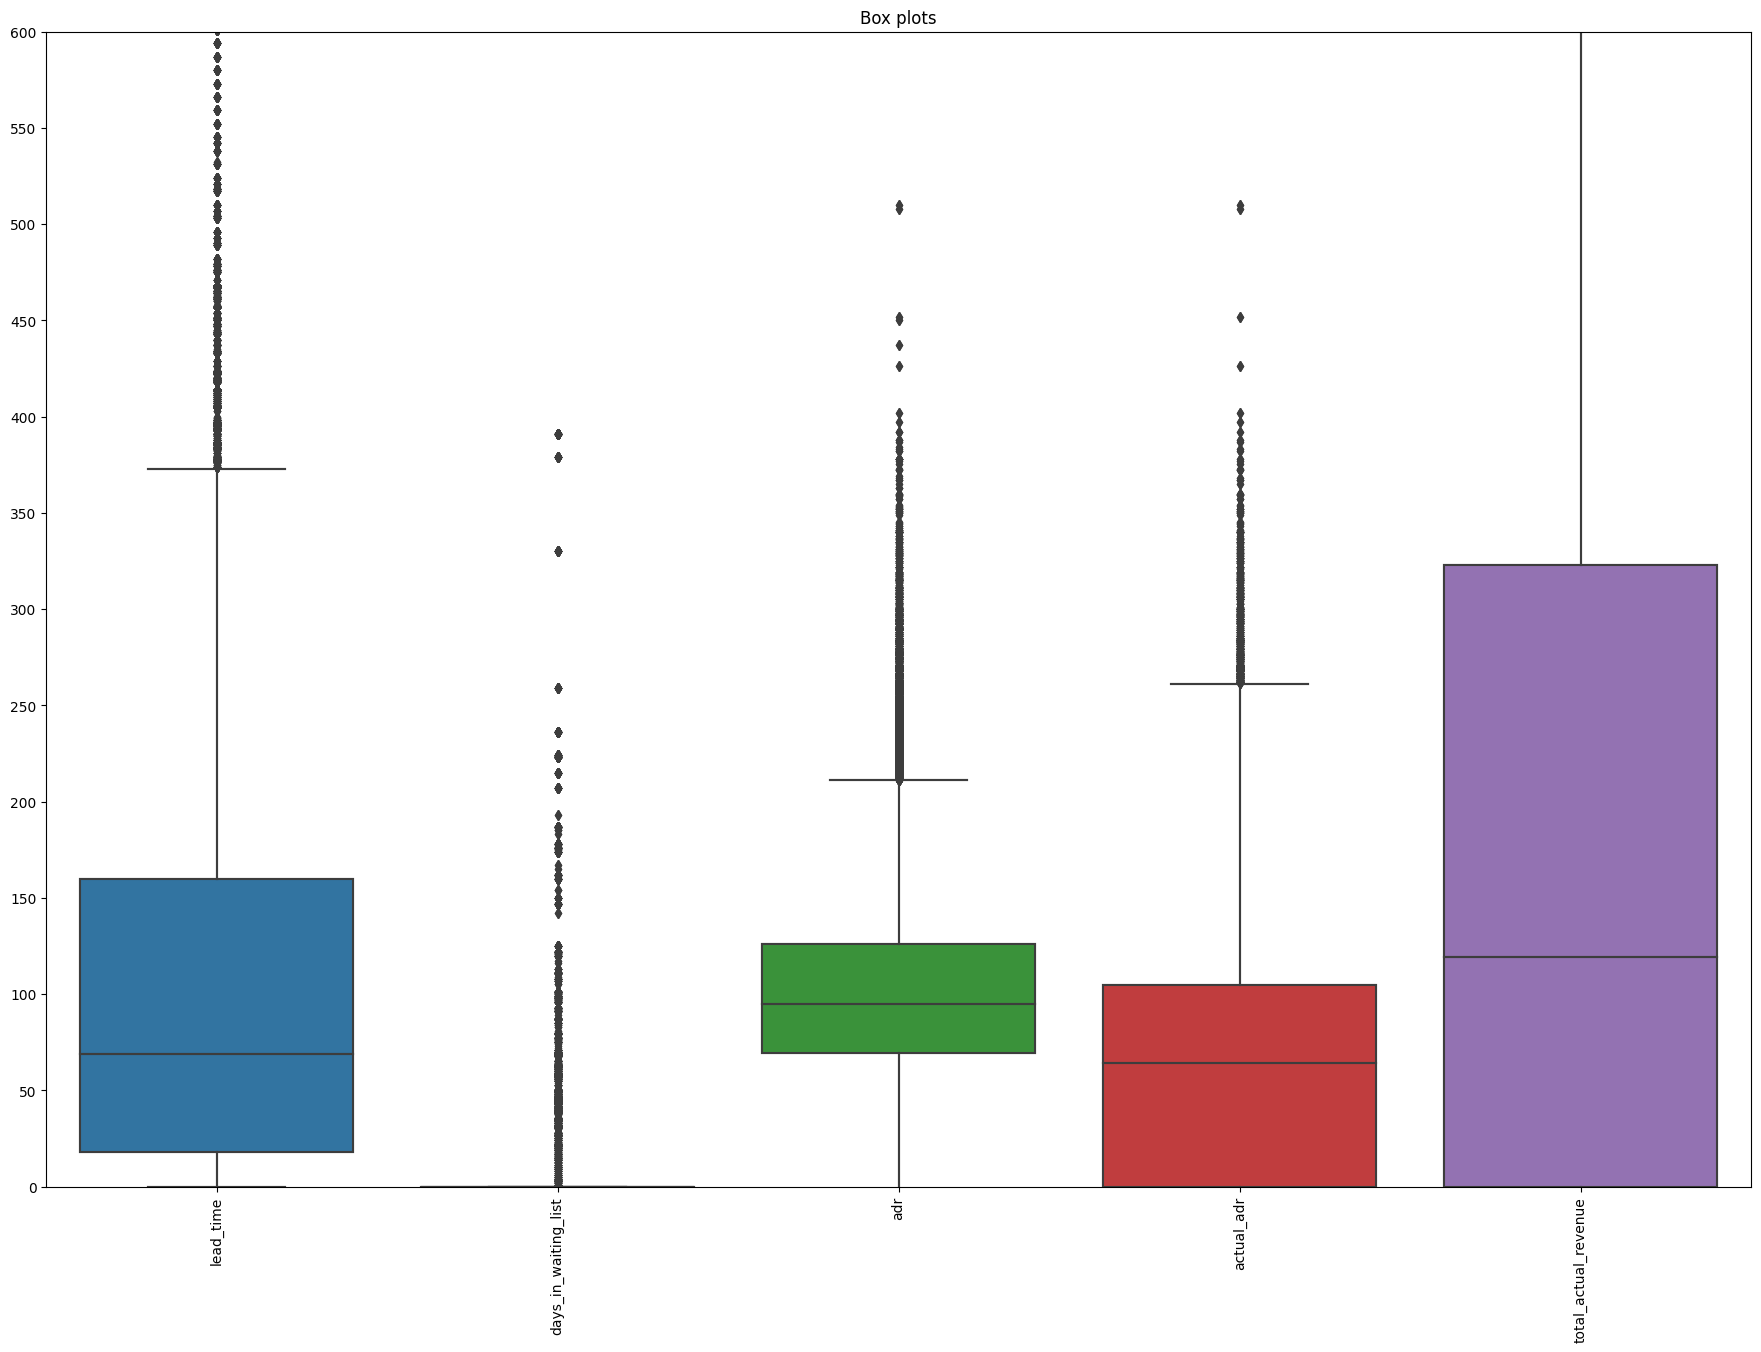

In [27]:
numerical_columns_b = ['lead_time', 'days_in_waiting_list', 'adr', 'actual_adr', 'total_actual_revenue']

plt.figure(figsize=(22,15))

ax = sns.boxplot(data=df[numerical_columns_b])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 550)

sns.boxplot(data=df[numerical_columns_b])

additional_ticks = [50, 150, 250, 350, 450, 550] 
plt.yticks(list(plt.yticks()[0]) + additional_ticks)

plt.title('Box plots')

plt.show()

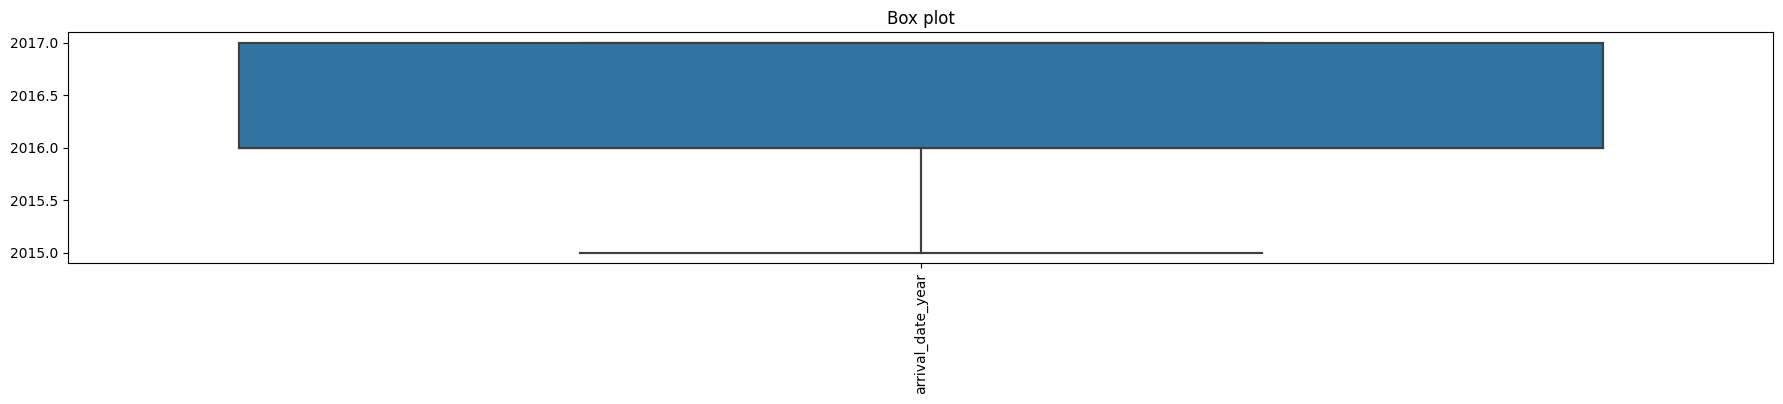

In [28]:
numerical_columns_c = ['arrival_date_year']

plt.figure(figsize=(22,3))

ax = sns.boxplot(data=df[numerical_columns_c])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

sns.boxplot(data=df[numerical_columns_c])

plt.title('Box plot')

plt.show()

## <ins>2.c) Relation between metrics defining booking timing, duration, client-composition and preferences with average daily rates and cancellation rates</ins>

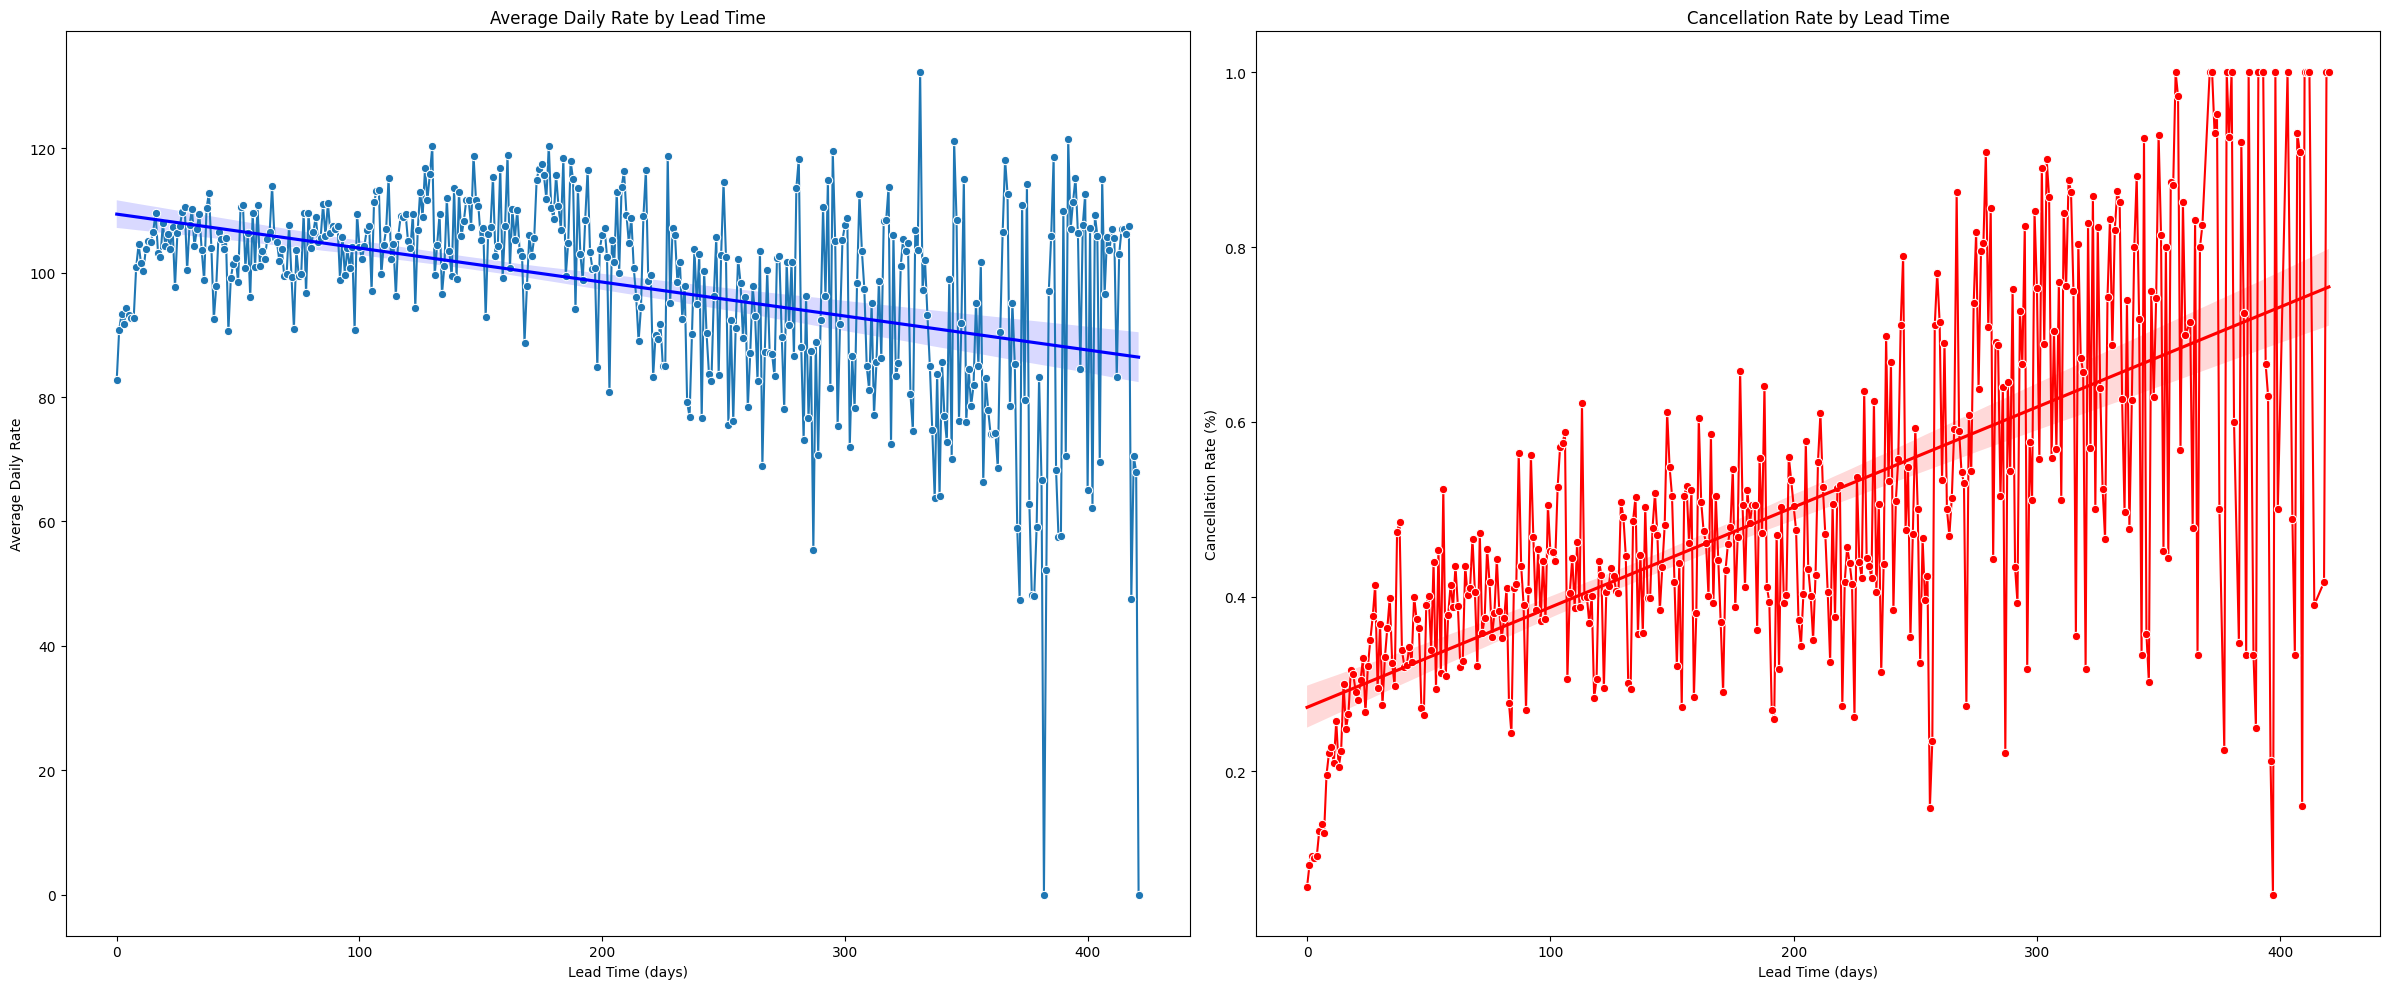

In [26]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('lead_time')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('lead_time').size() / df.groupby('lead_time').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

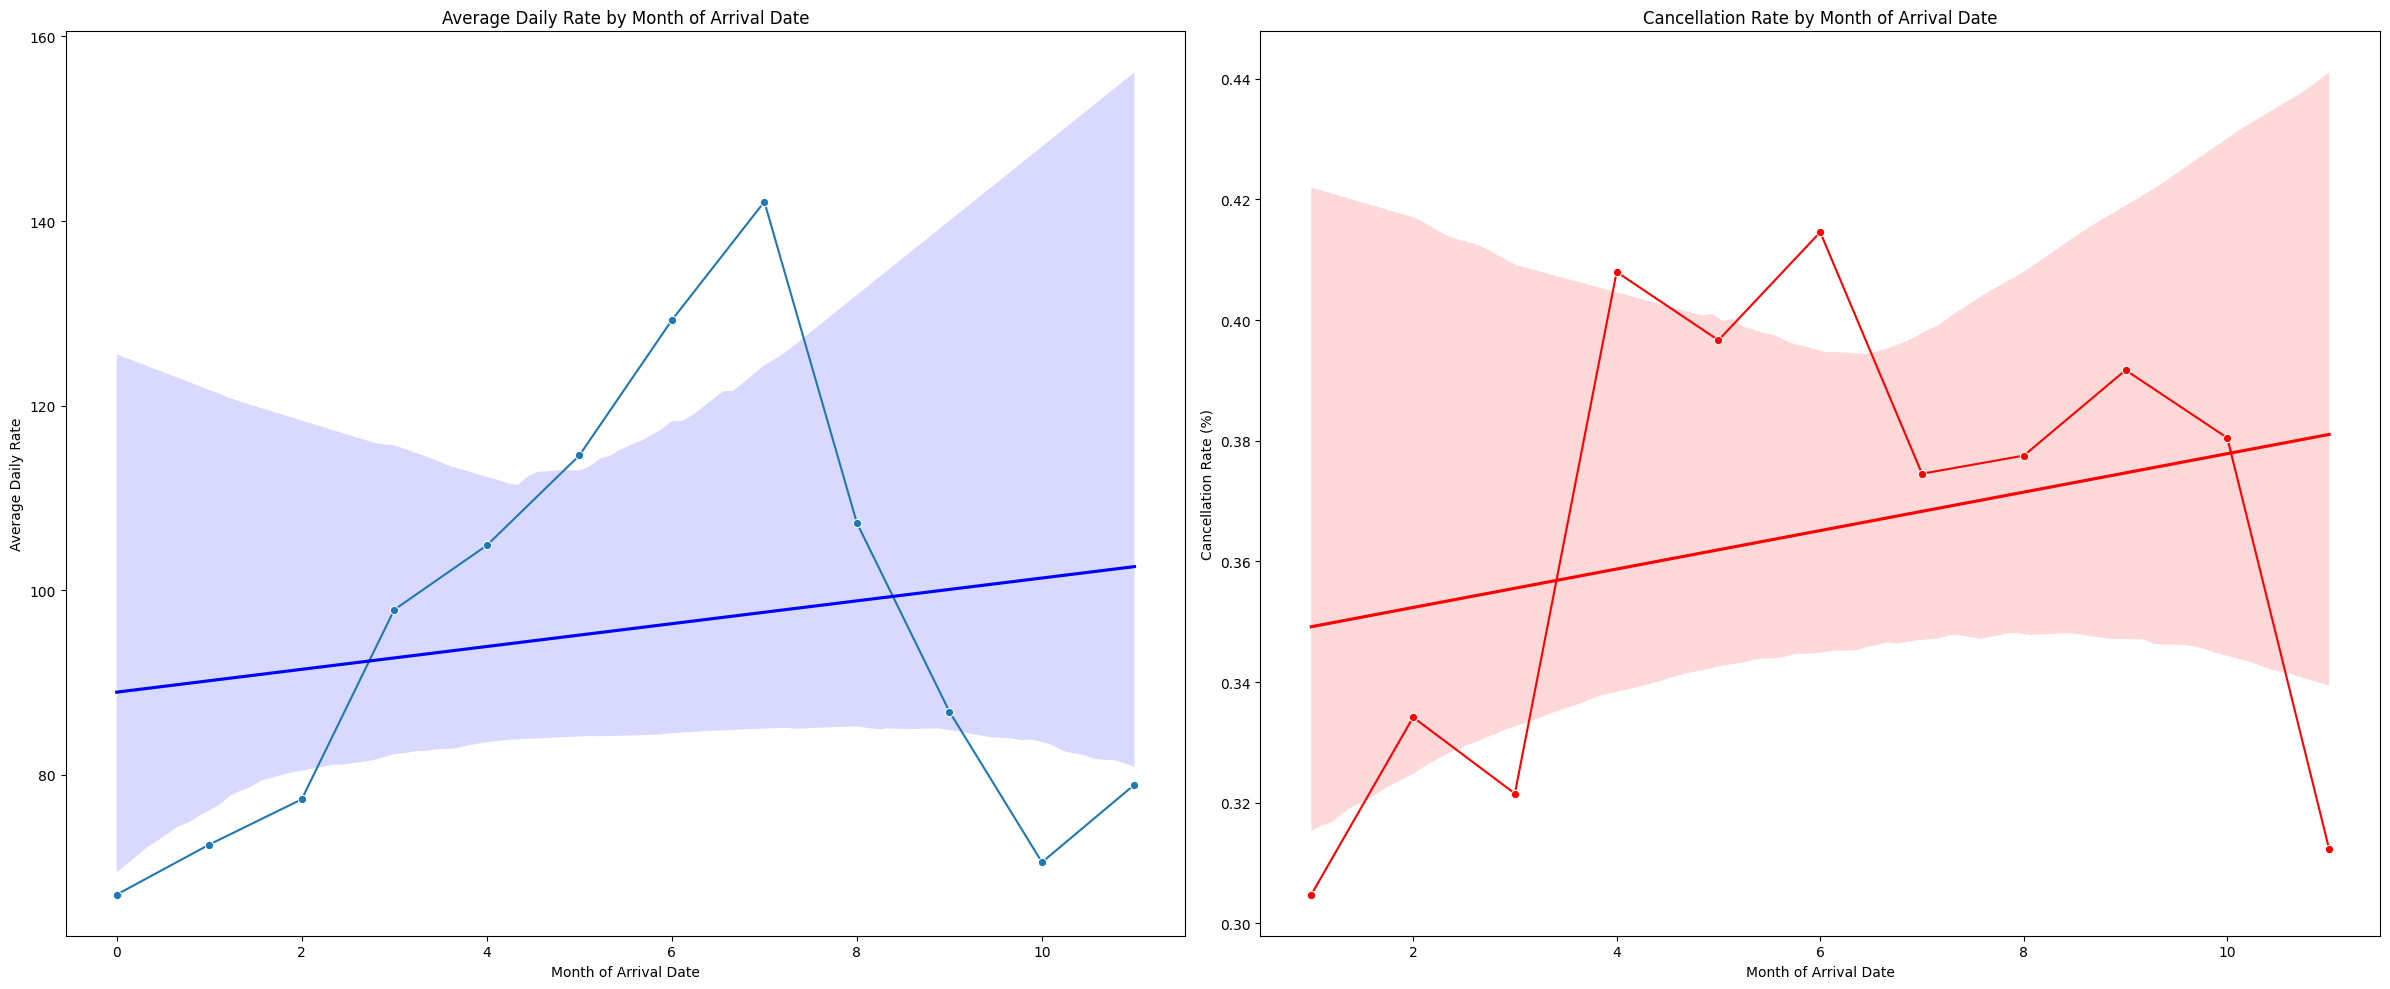

In [25]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('arrival_date_month')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('arrival_date_month').size() / df.groupby('arrival_date_month').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Month of Arrival Date')
plt.xlabel('Month of Arrival Date')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Month of Arrival Date')
plt.xlabel('Month of Arrival Date')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

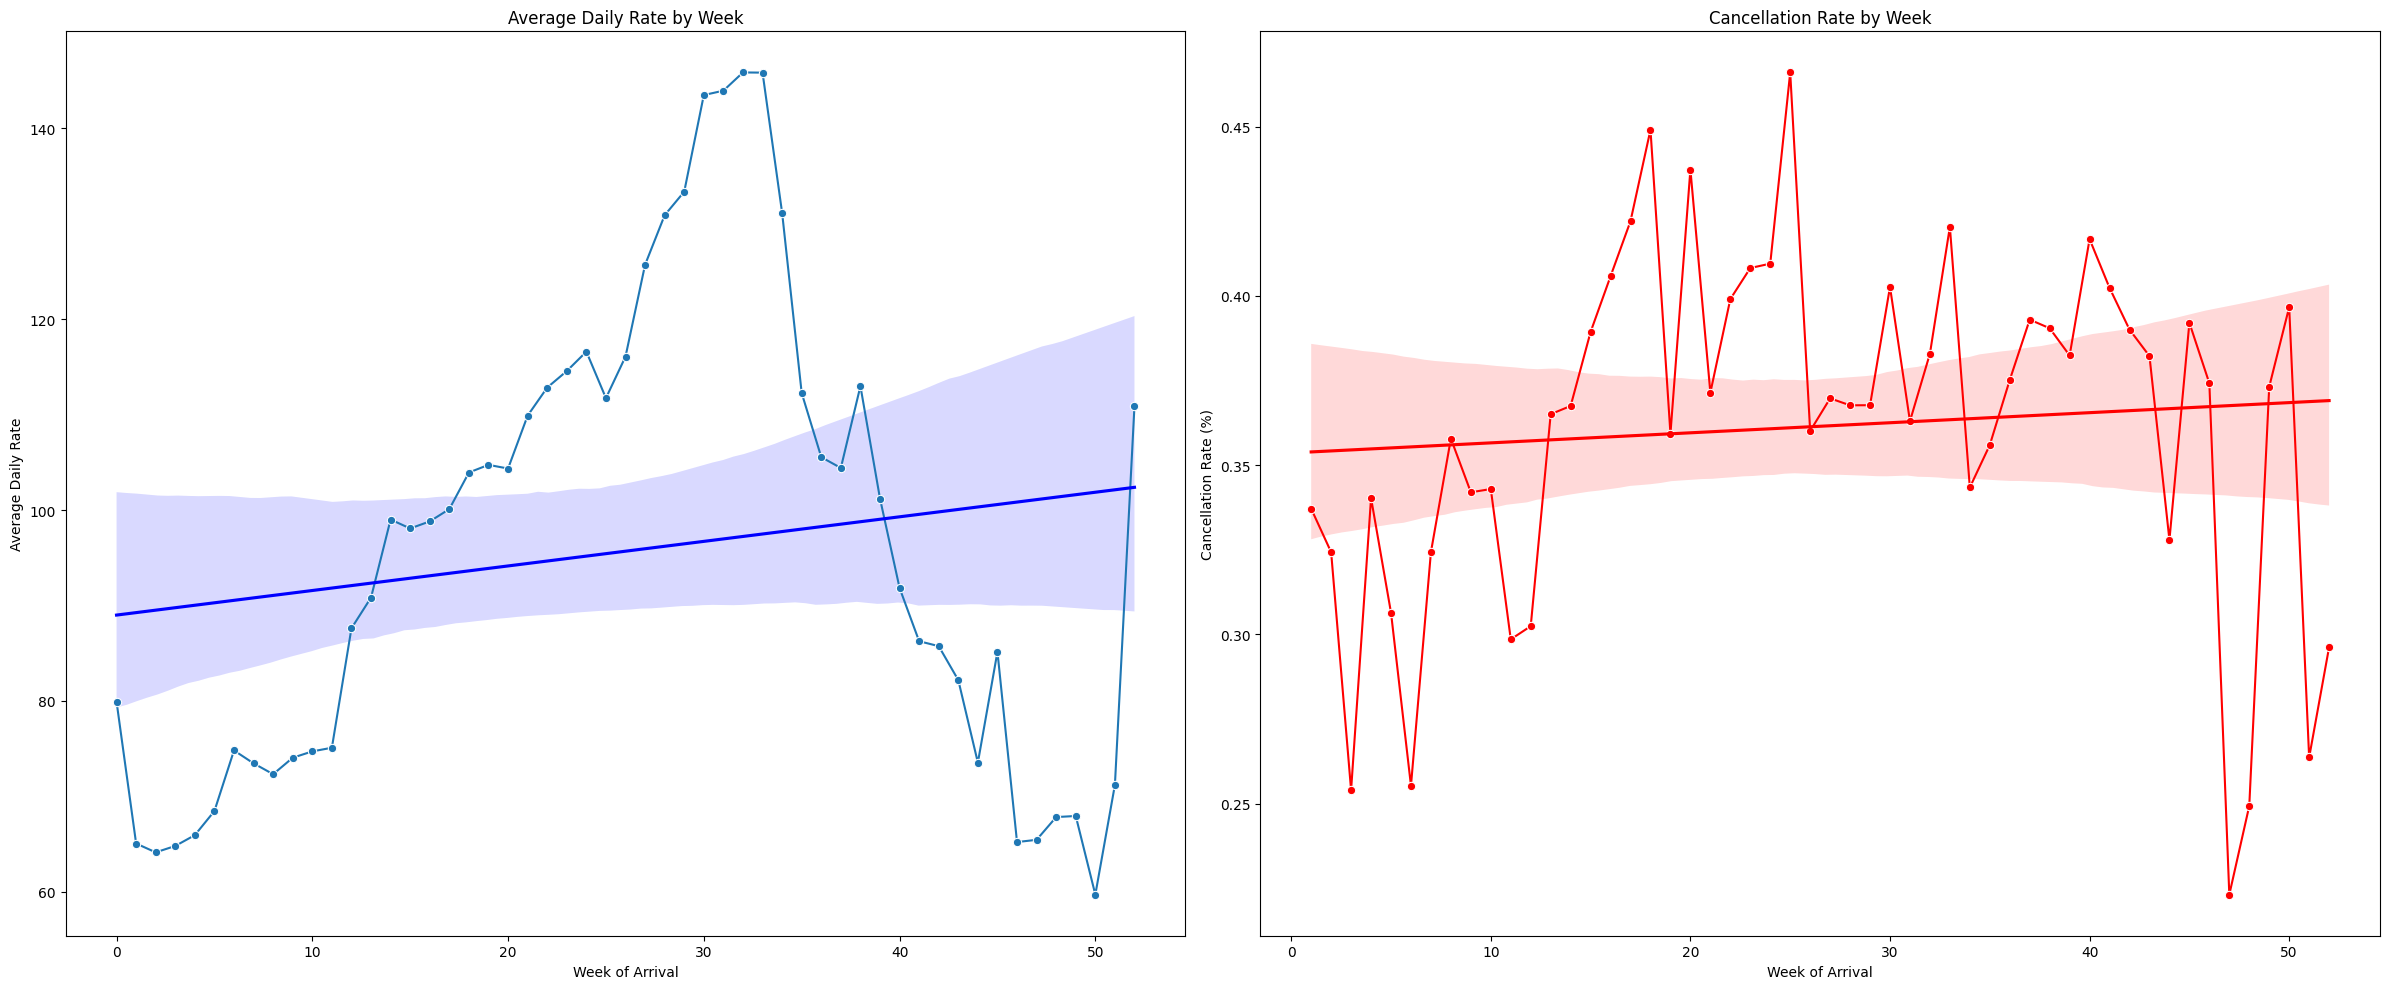

In [24]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('arrival_date_week_number')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('arrival_date_week_number').size() / df.groupby('arrival_date_week_number').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Week')
plt.xlabel('Week of Arrival')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Week')
plt.xlabel('Week of Arrival')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

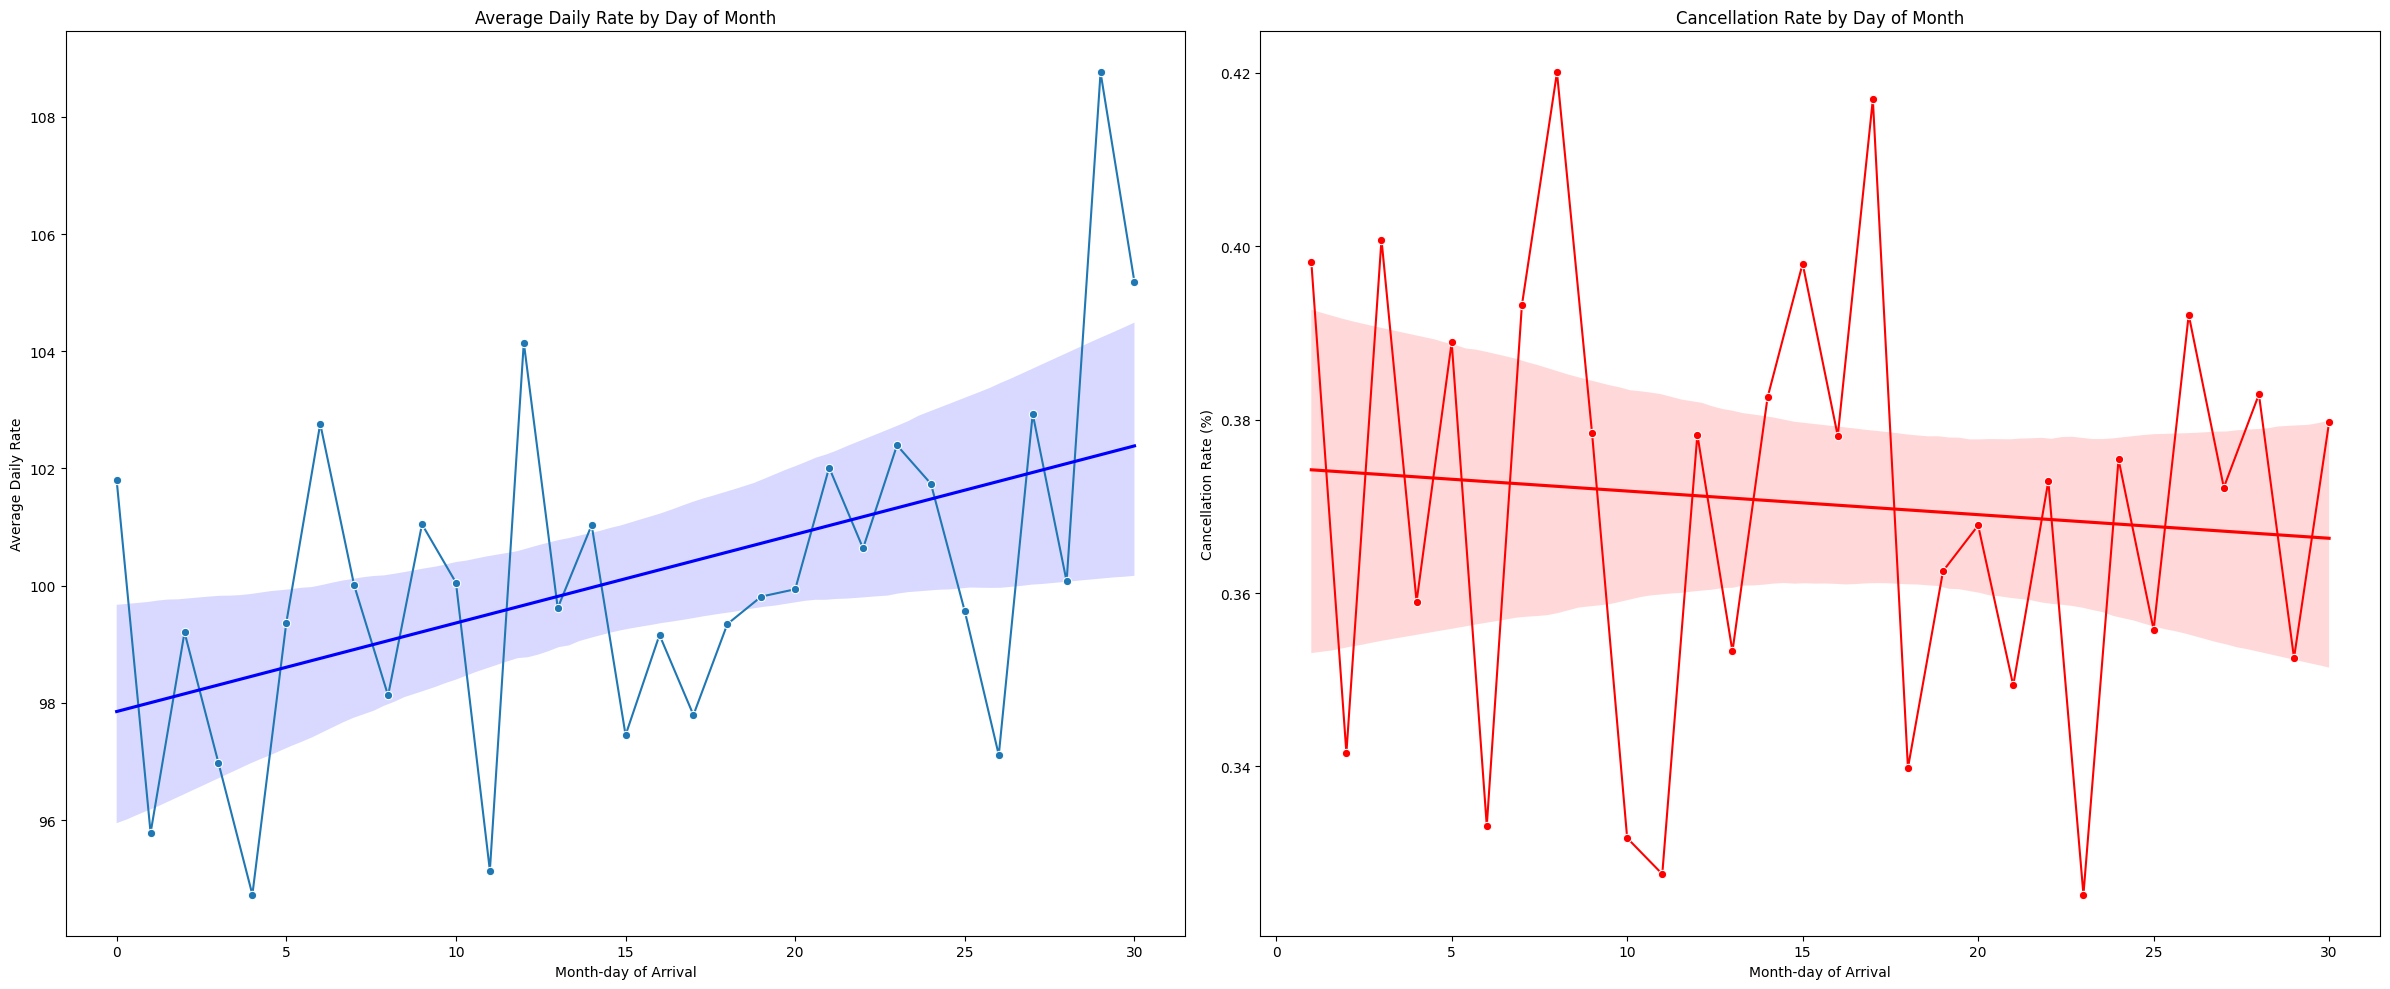

In [23]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('arrival_date_day_of_month')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('arrival_date_day_of_month').size() / df.groupby('arrival_date_day_of_month').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Day of Month')
plt.xlabel('Month-day of Arrival')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Day of Month')
plt.xlabel('Month-day of Arrival')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

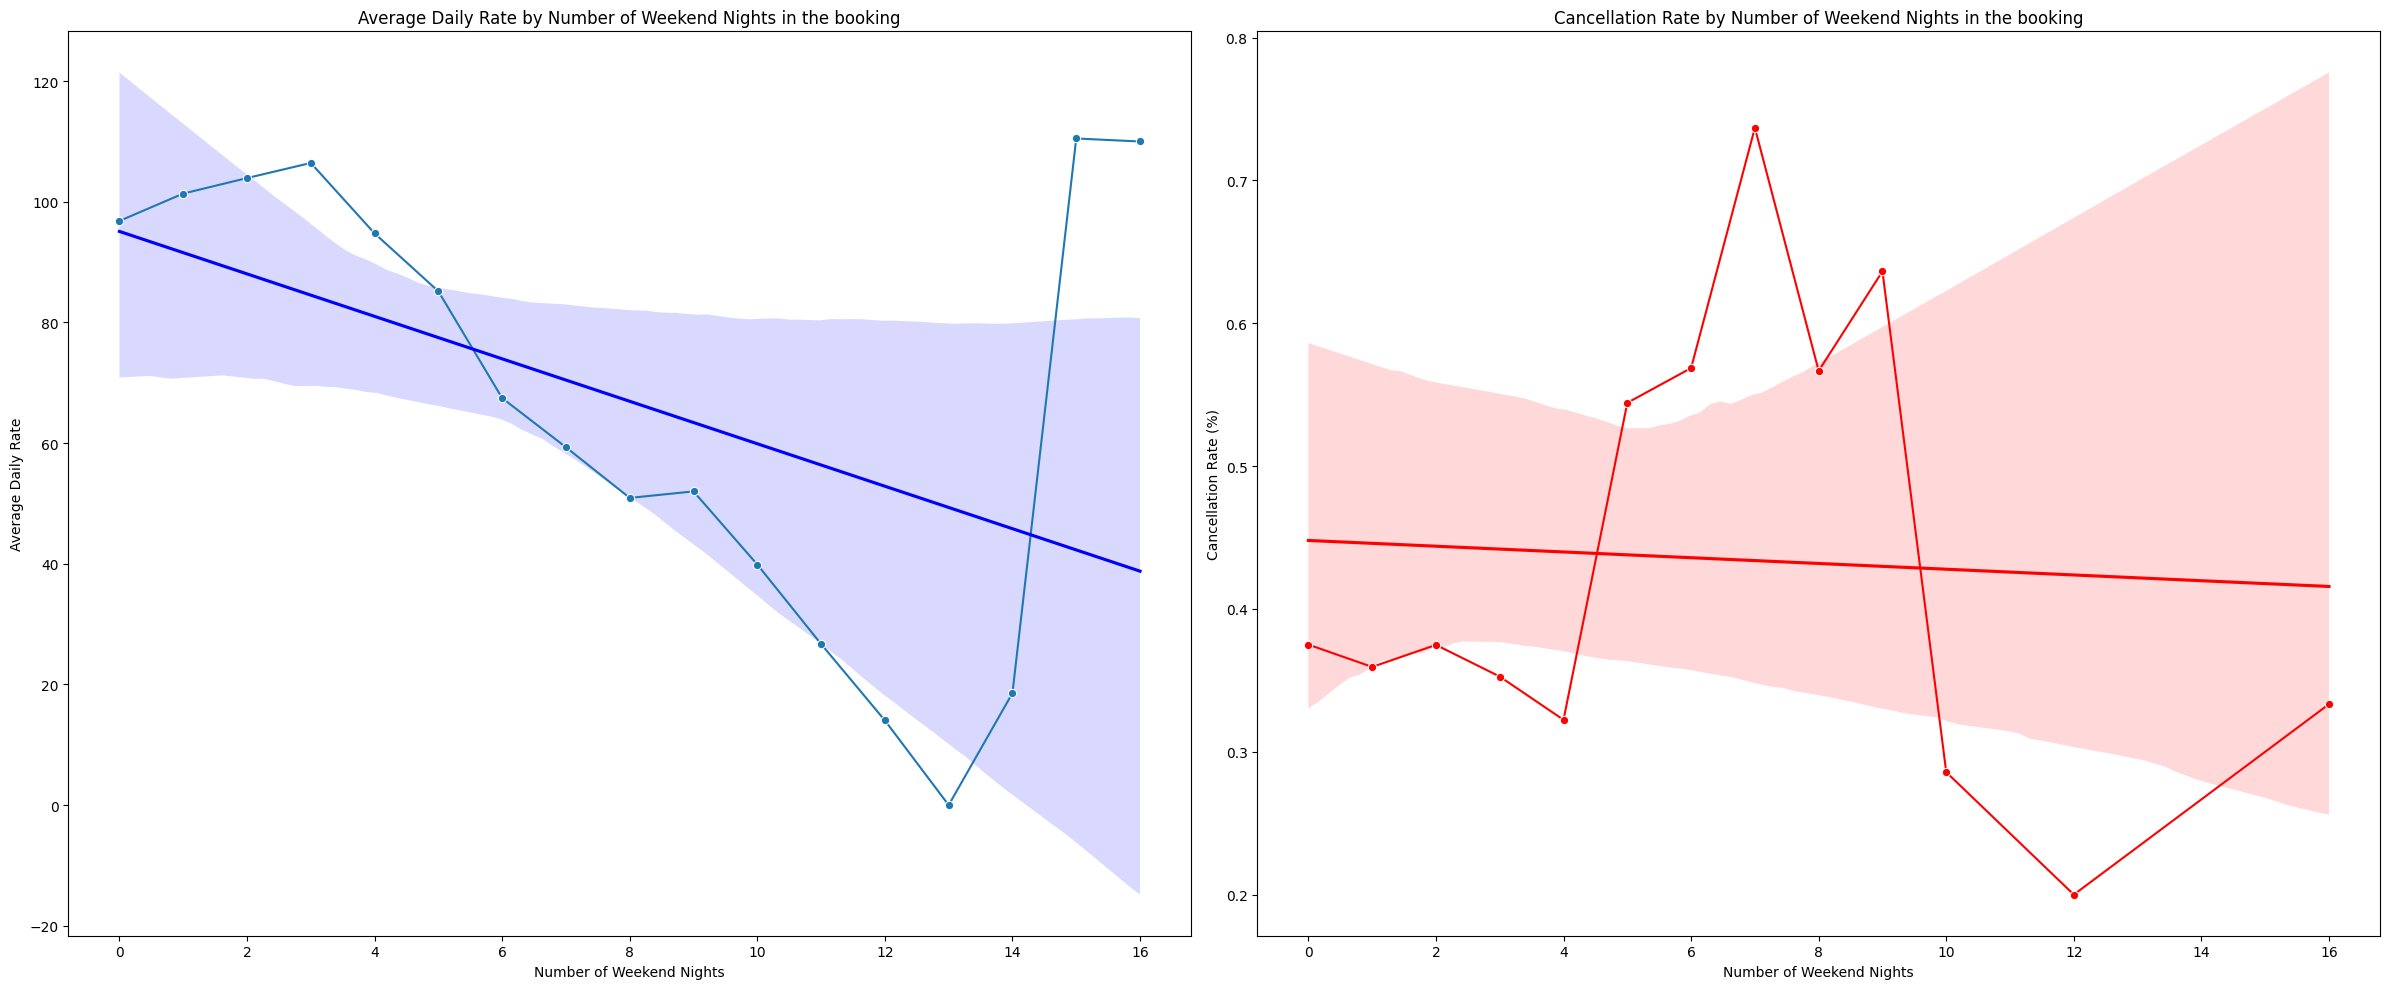

In [27]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('stays_in_weekend_nights')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('stays_in_weekend_nights').size() / df.groupby('stays_in_weekend_nights').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Number of Weekend Nights in the booking')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Number of Weekend Nights in the booking')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

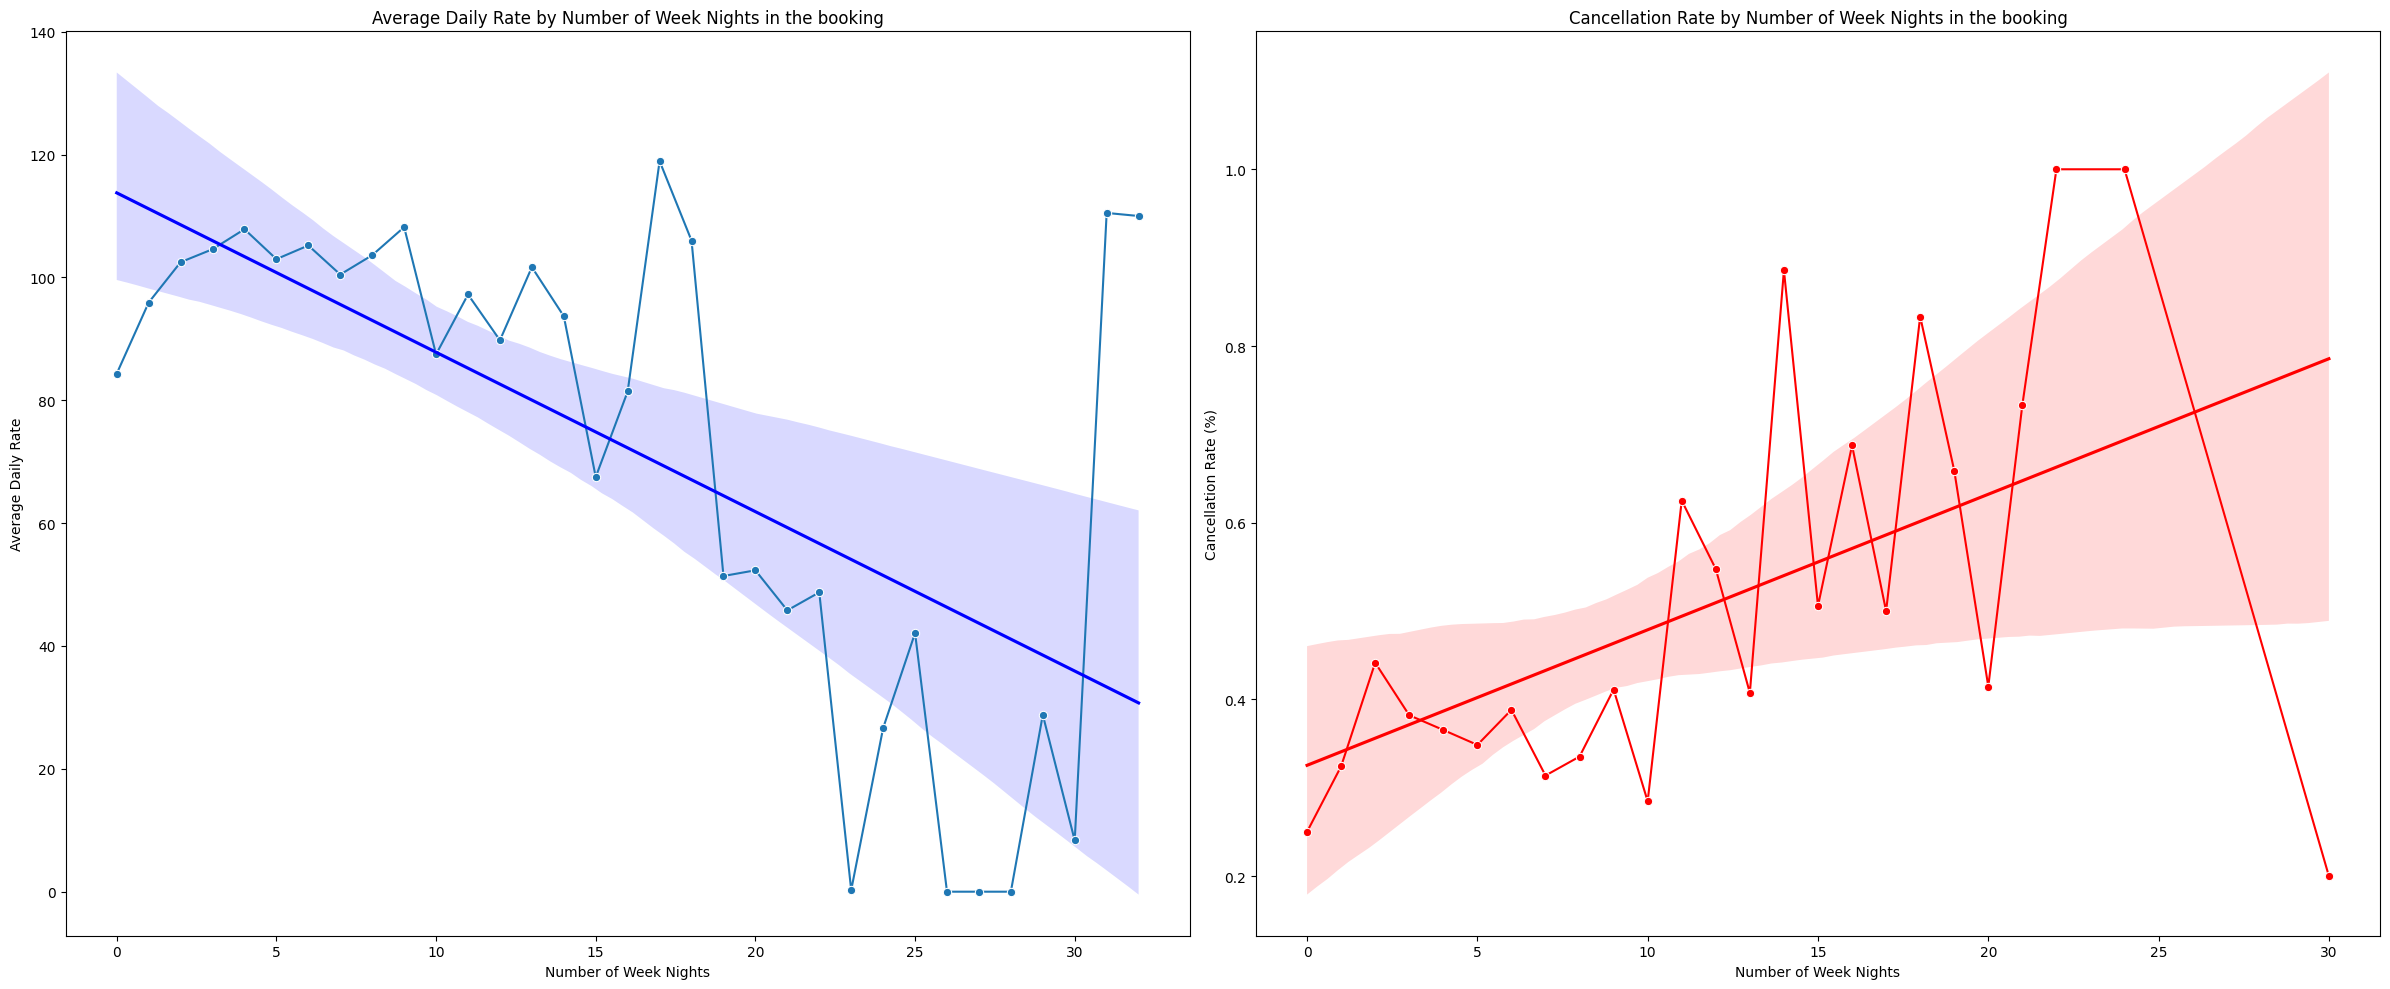

In [29]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('stays_in_week_nights')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('stays_in_week_nights').size() / df.groupby('stays_in_week_nights').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Number of Week Nights in the booking')
plt.xlabel('Number of Week Nights')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Number of Week Nights in the booking')
plt.xlabel('Number of Week Nights')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

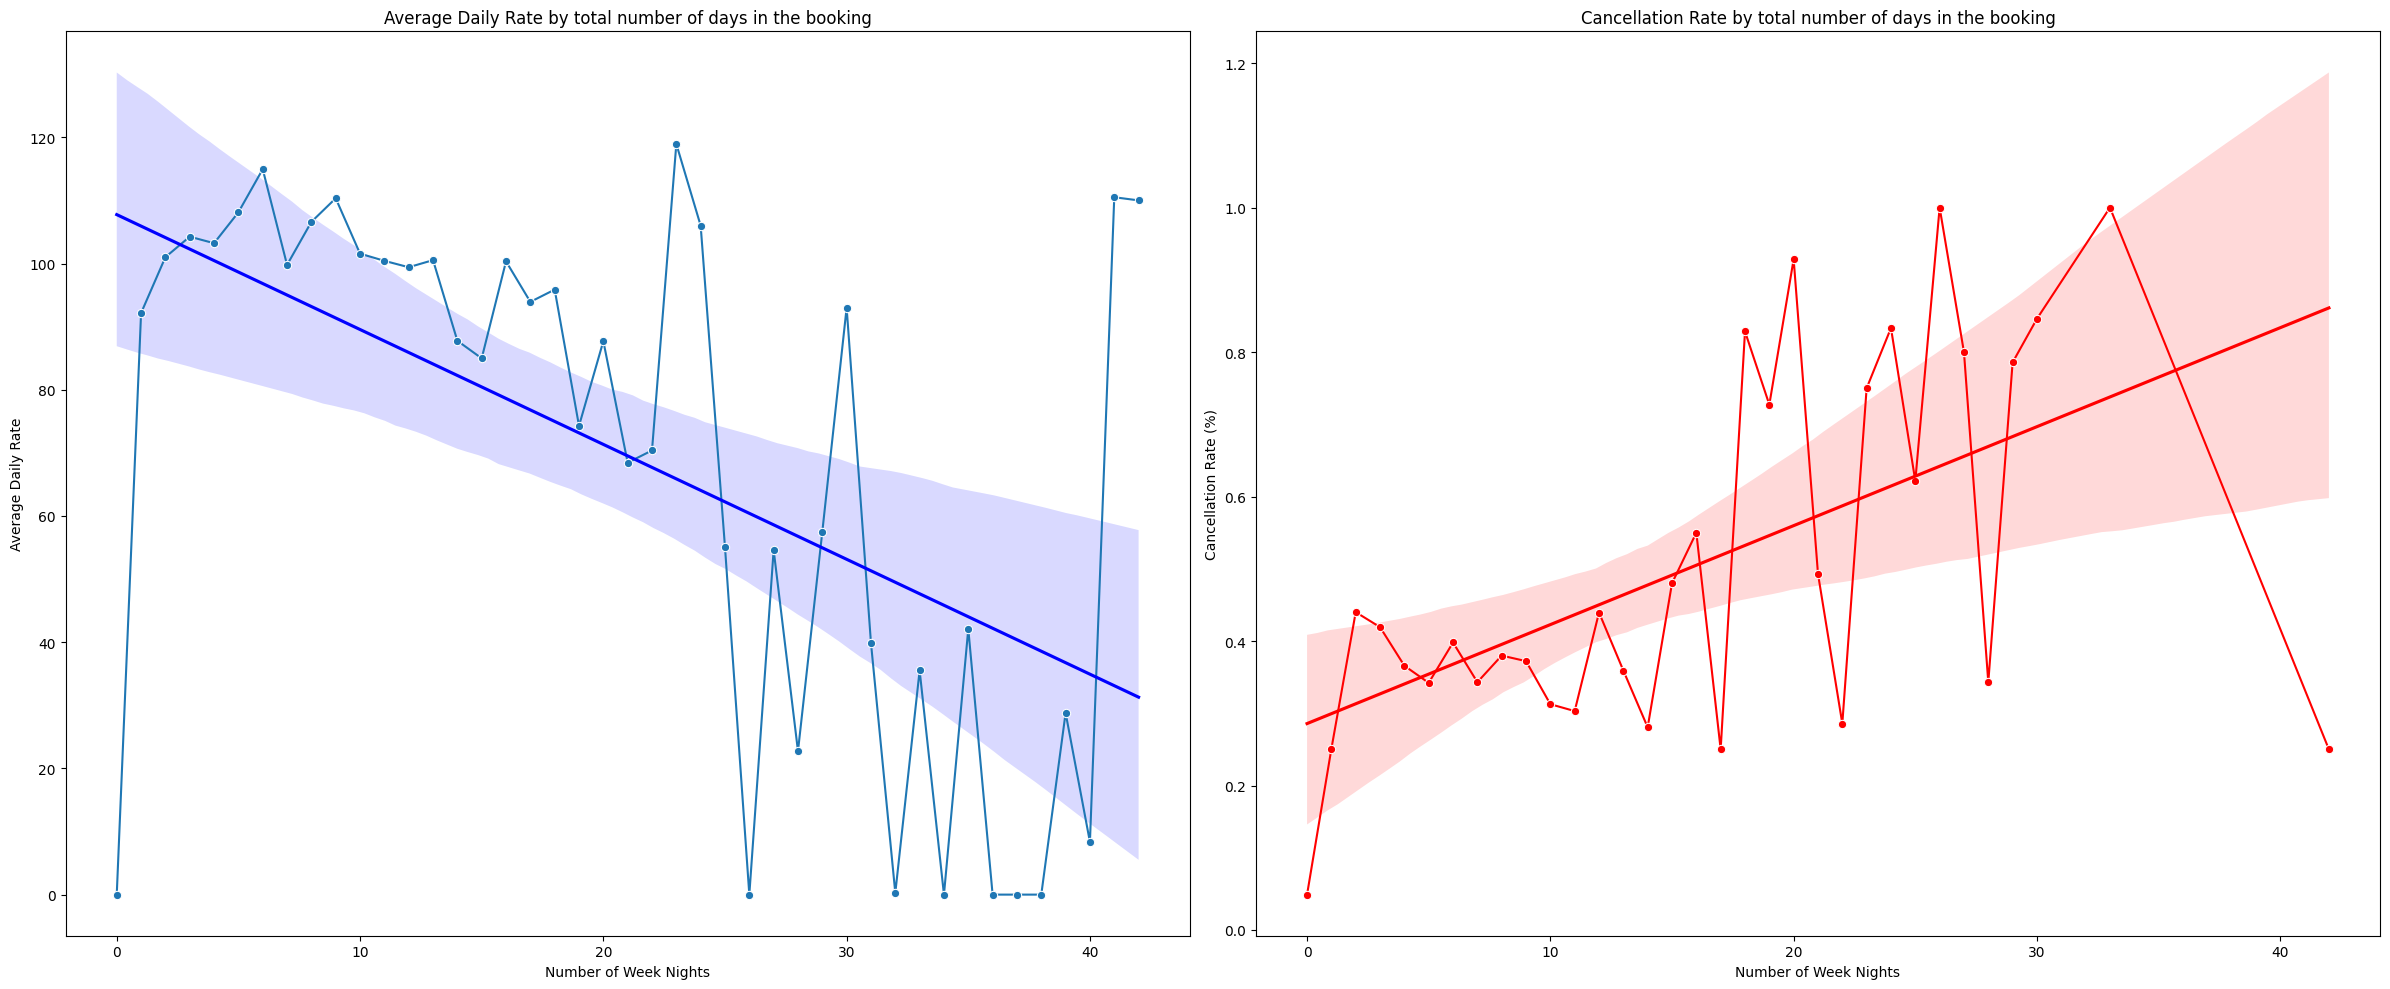

In [30]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('total_number_of_days_in_stay')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('total_number_of_days_in_stay').size() / df.groupby('total_number_of_days_in_stay').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by total number of days in the booking')
plt.xlabel('Number of Week Nights')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by total number of days in the booking')
plt.xlabel('Number of Week Nights')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

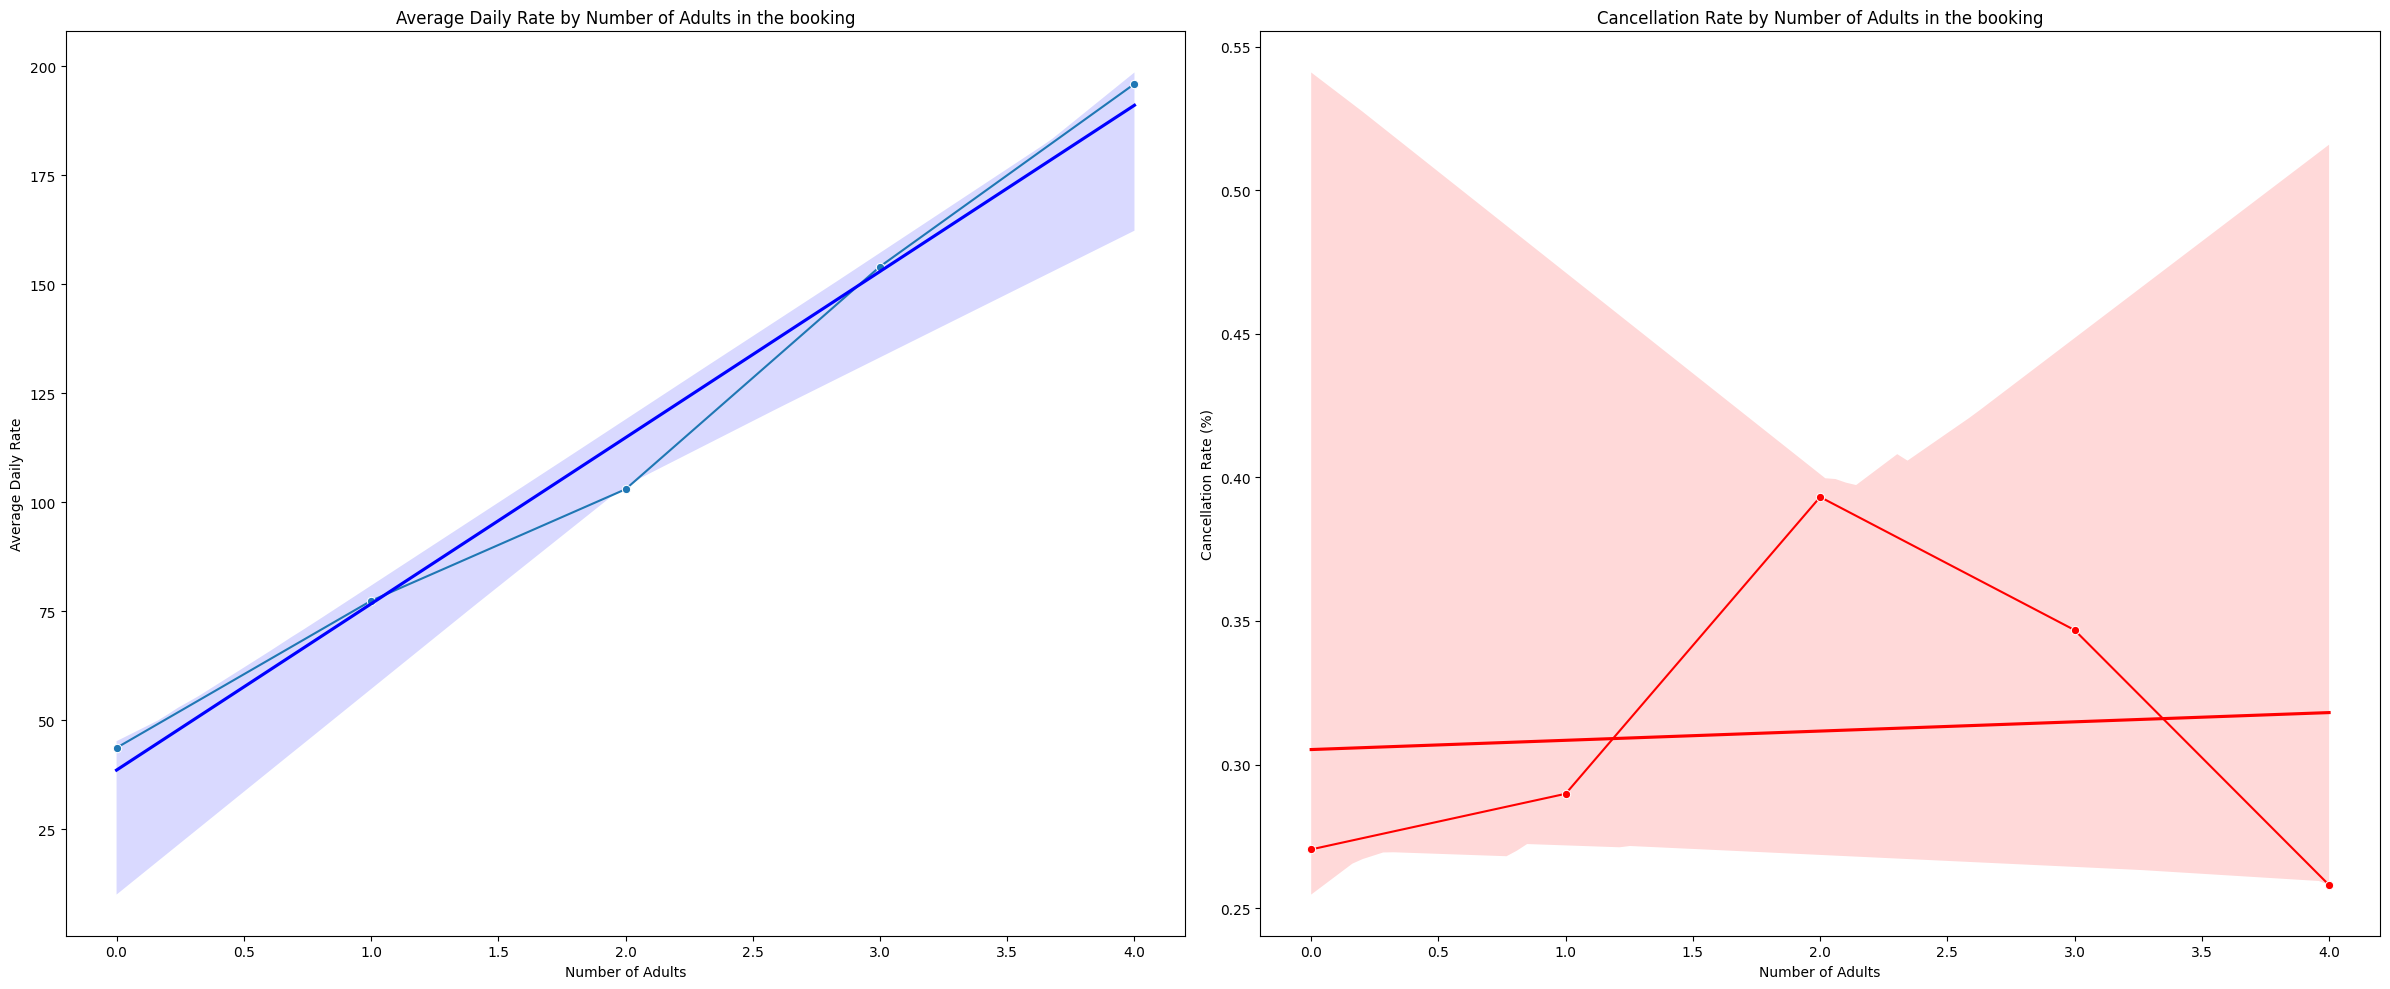

In [30]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('adults')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('adults').size() / df.groupby('adults').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Number of Adults in the booking')
plt.xlabel('Number of Adults')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Number of Adults in the booking')
plt.xlabel('Number of Adults')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

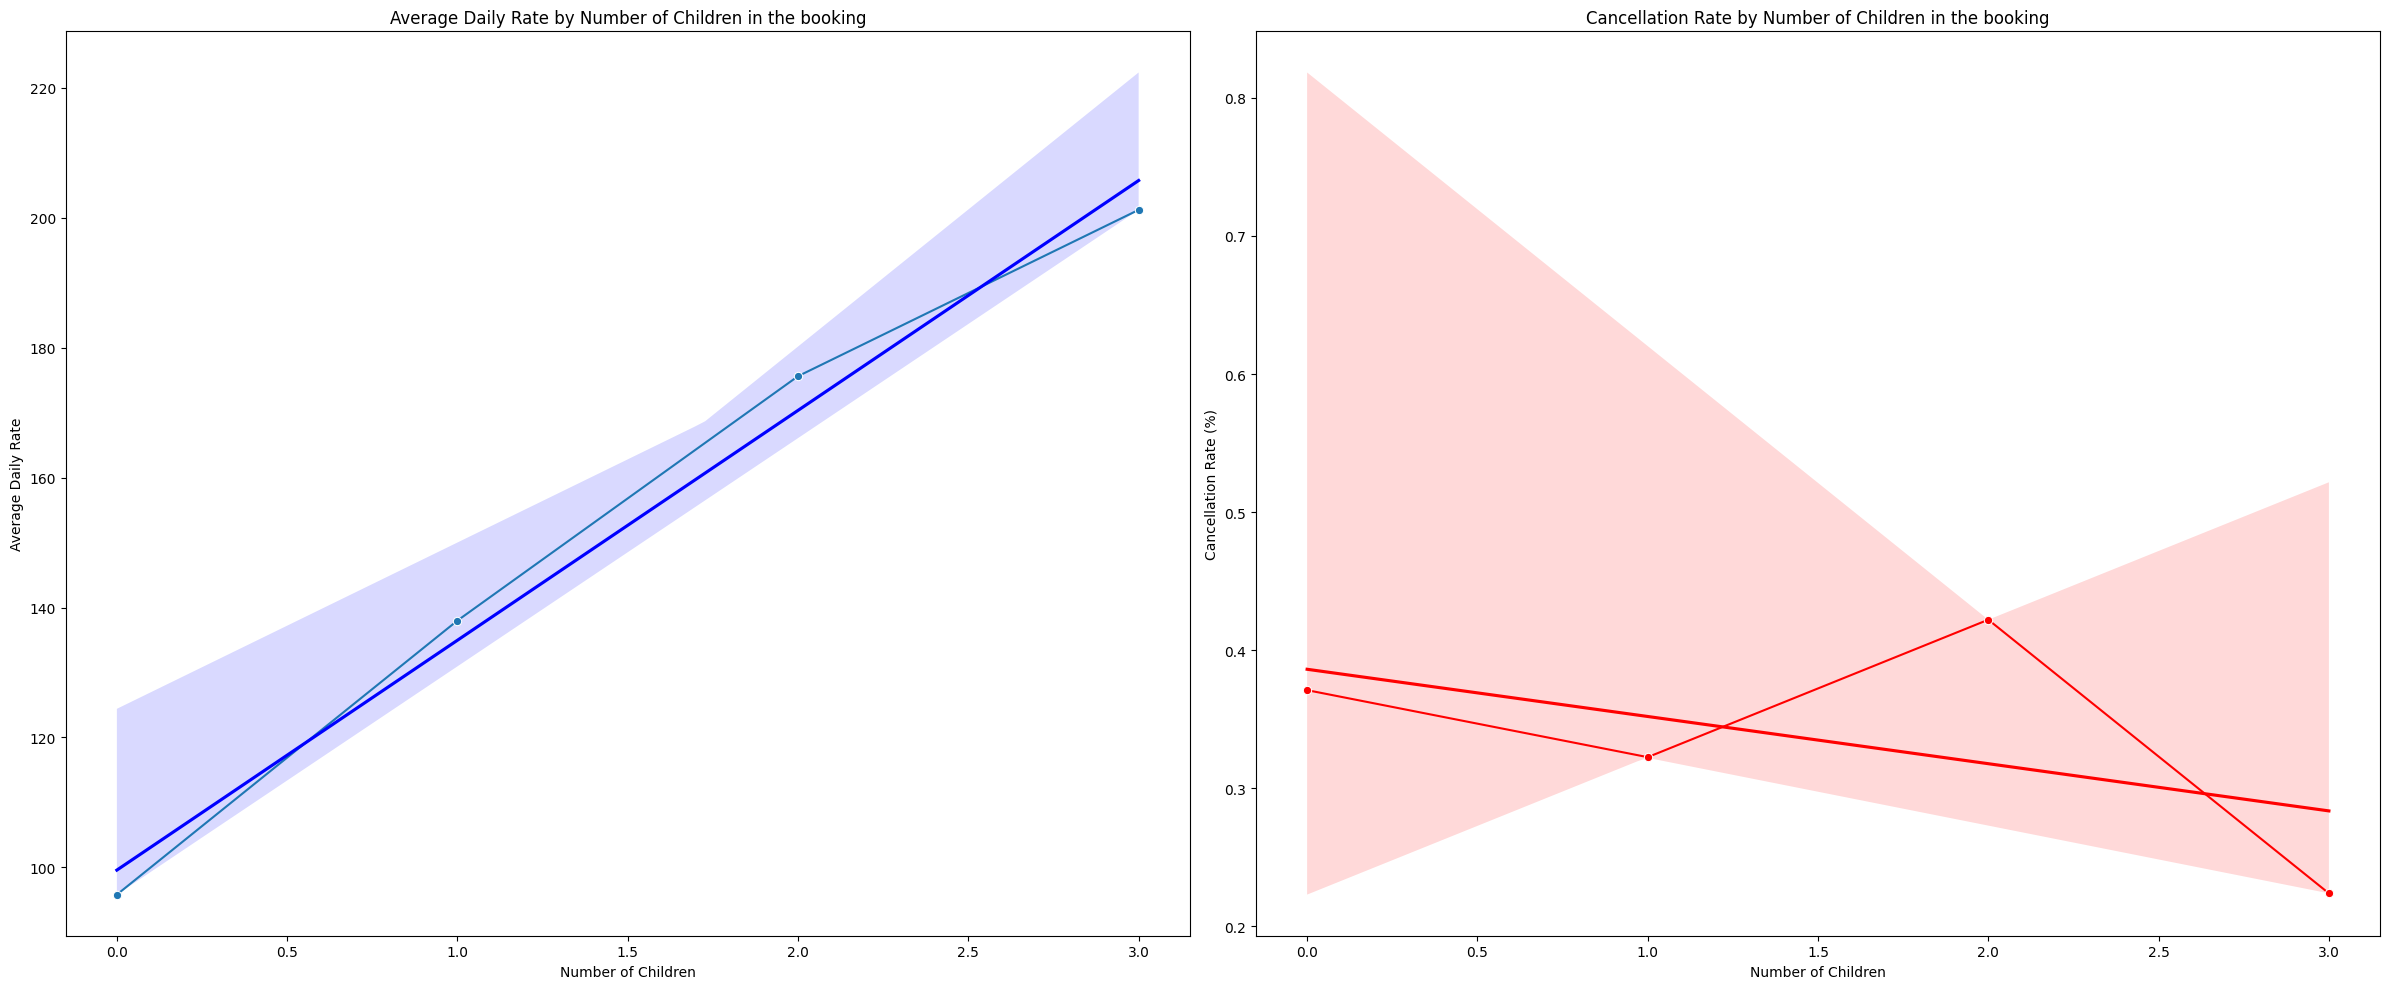

In [31]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('children')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('children').size() / df.groupby('children').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Number of Children in the booking')
plt.xlabel('Number of Children')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Number of Children in the booking')
plt.xlabel('Number of Children')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

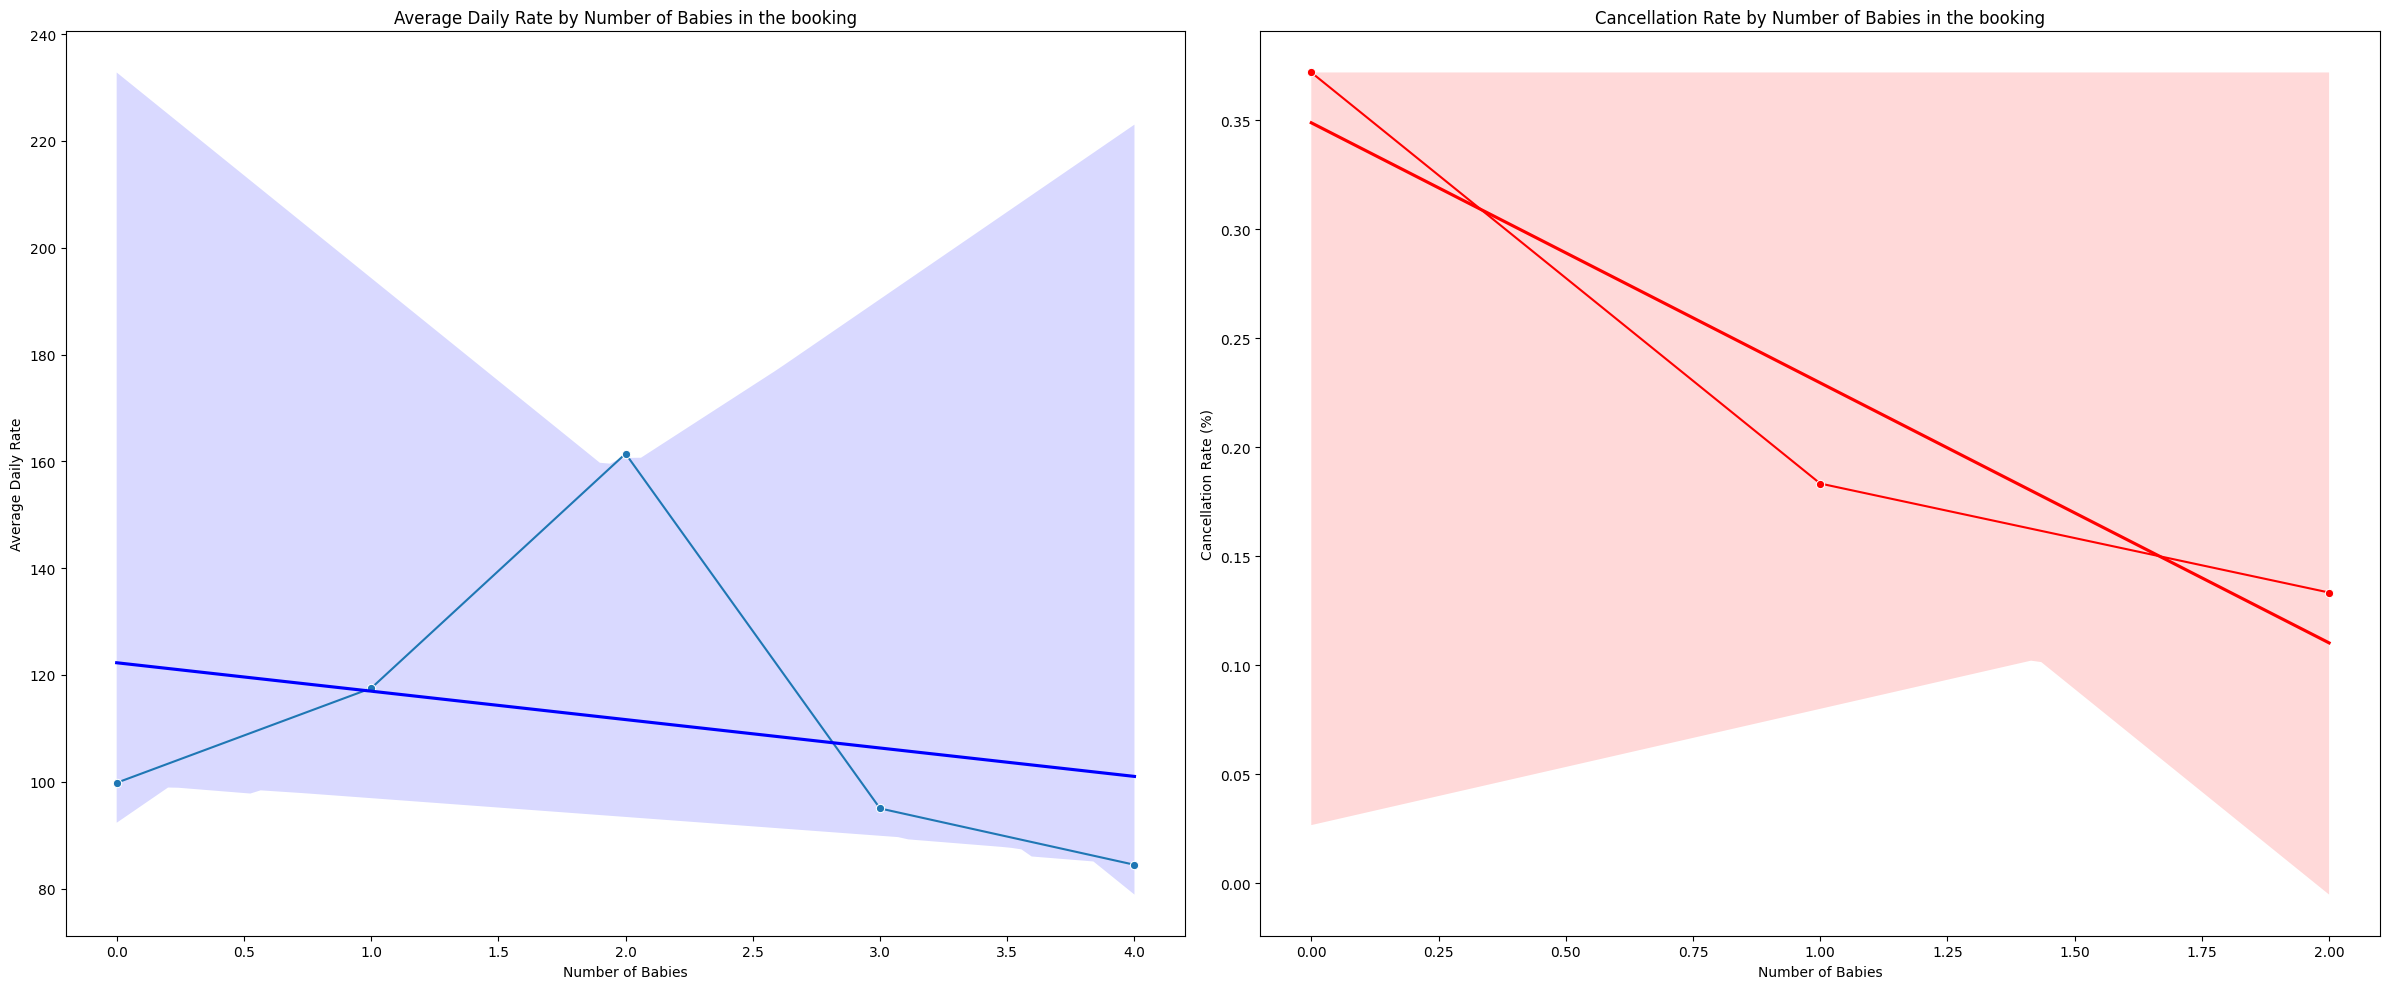

In [32]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('babies')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('babies').size() / df.groupby('babies').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Number of Babies in the booking')
plt.xlabel('Number of Babies')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Number of Babies in the booking')
plt.xlabel('Number of Babies')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

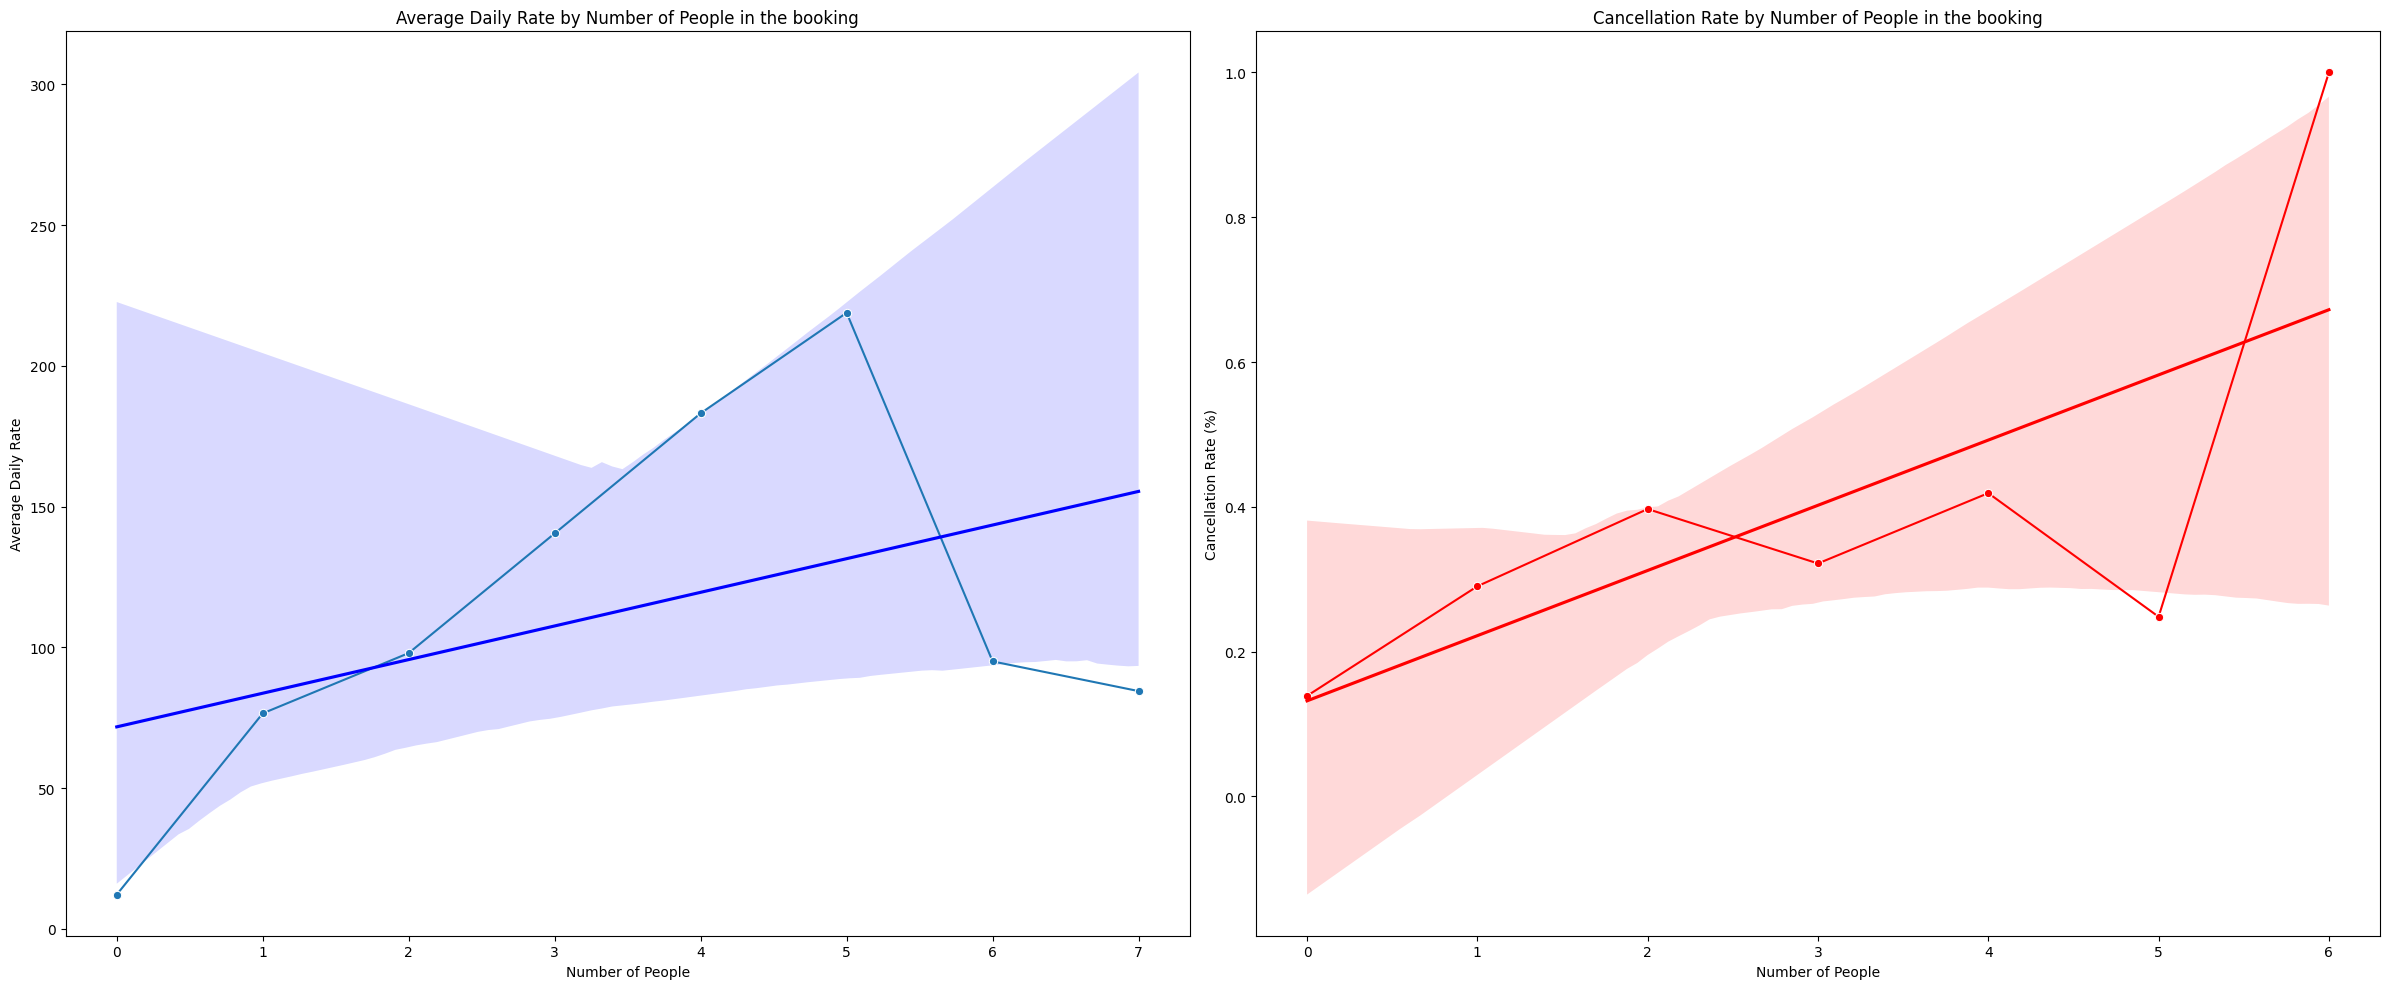

In [17]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('total_number_of_people')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('total_number_of_people').size() / df.groupby('total_number_of_people').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by Number of People in the booking')
plt.xlabel('Number of People')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by Number of People in the booking')
plt.xlabel('Number of People')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

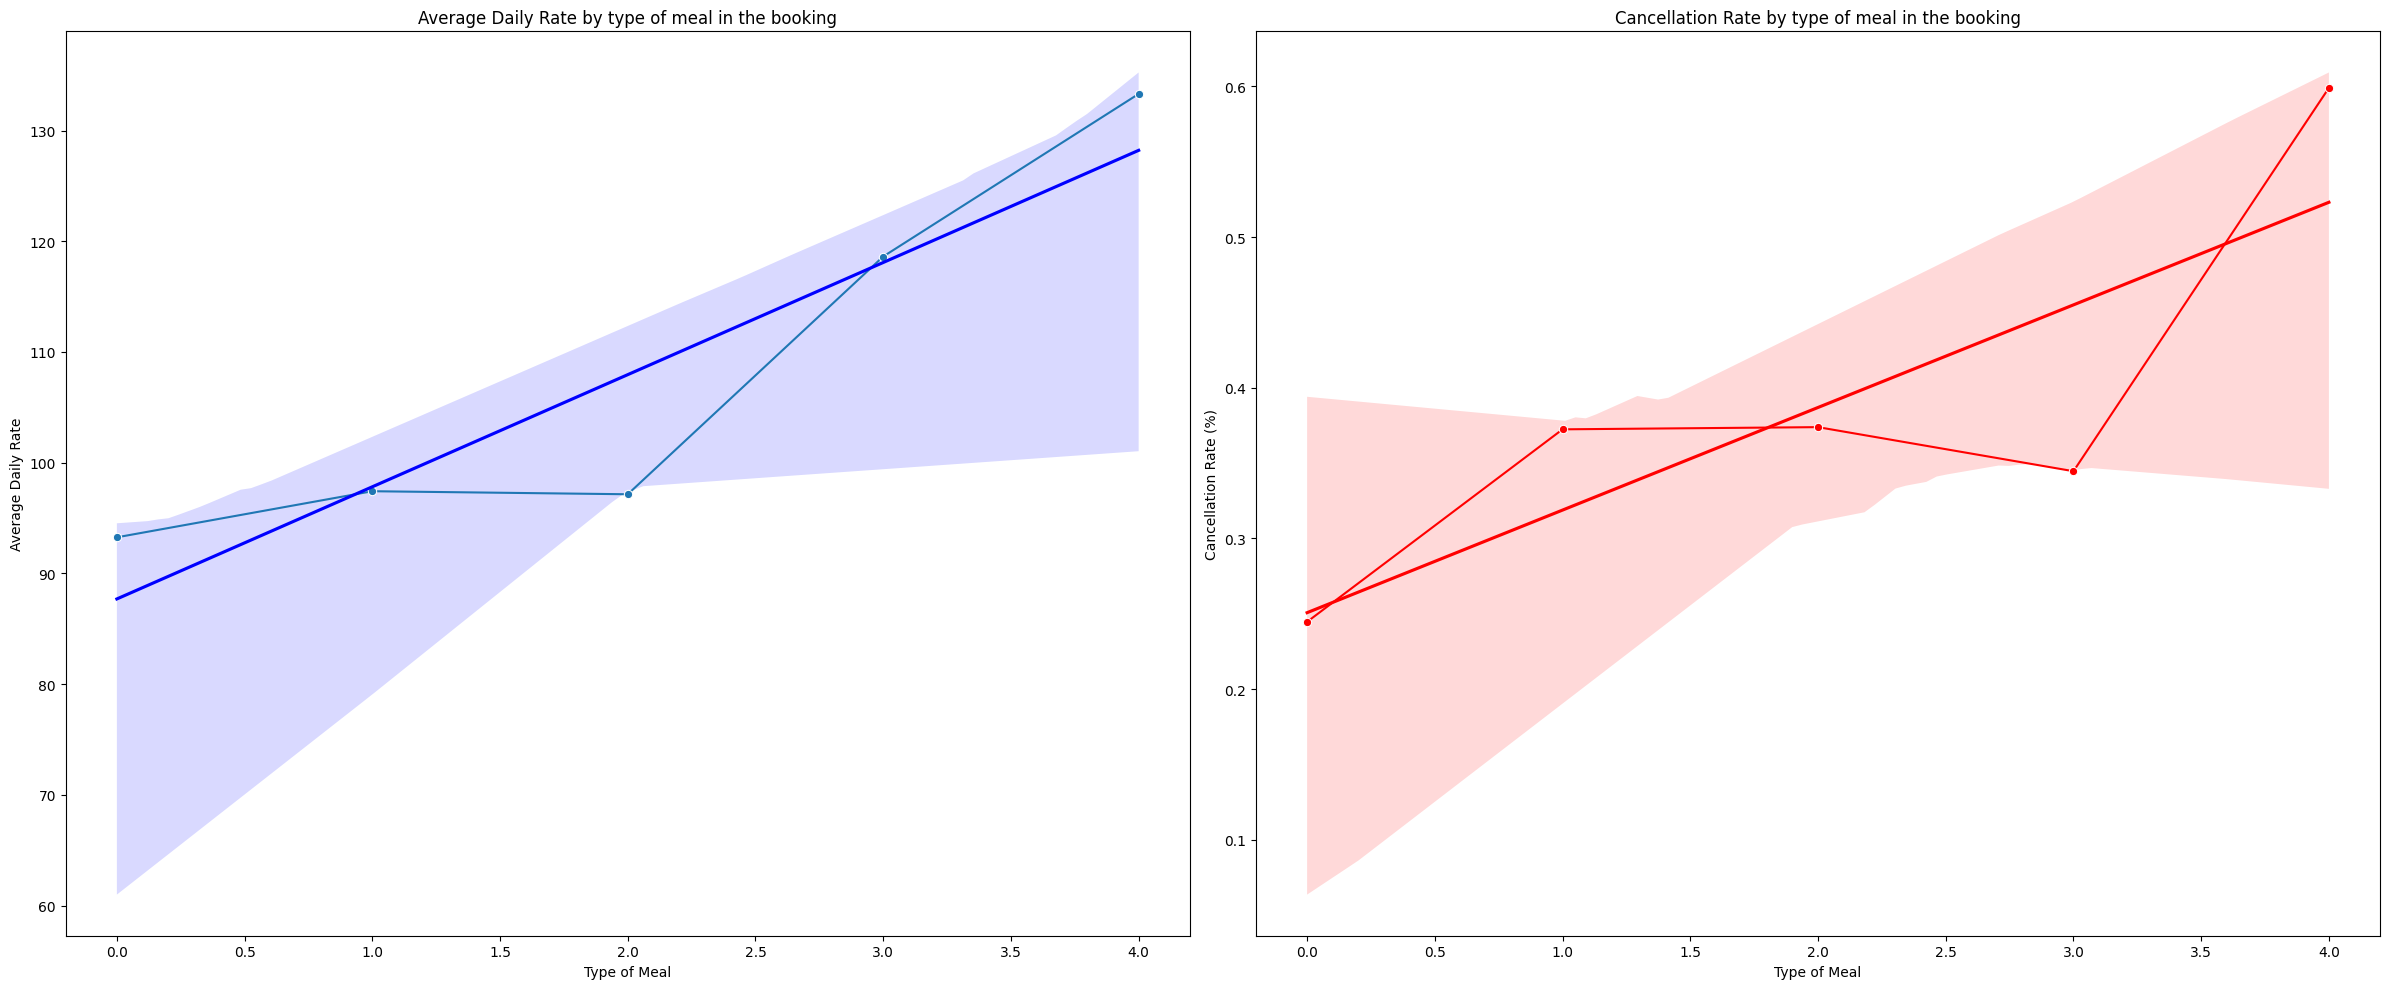

In [18]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('meal')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('meal').size() / df.groupby('meal').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title('Average Daily Rate by type of meal in the booking')
plt.xlabel('Type of Meal')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title('Cancellation Rate by type of meal in the booking')
plt.xlabel('Type of Meal')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

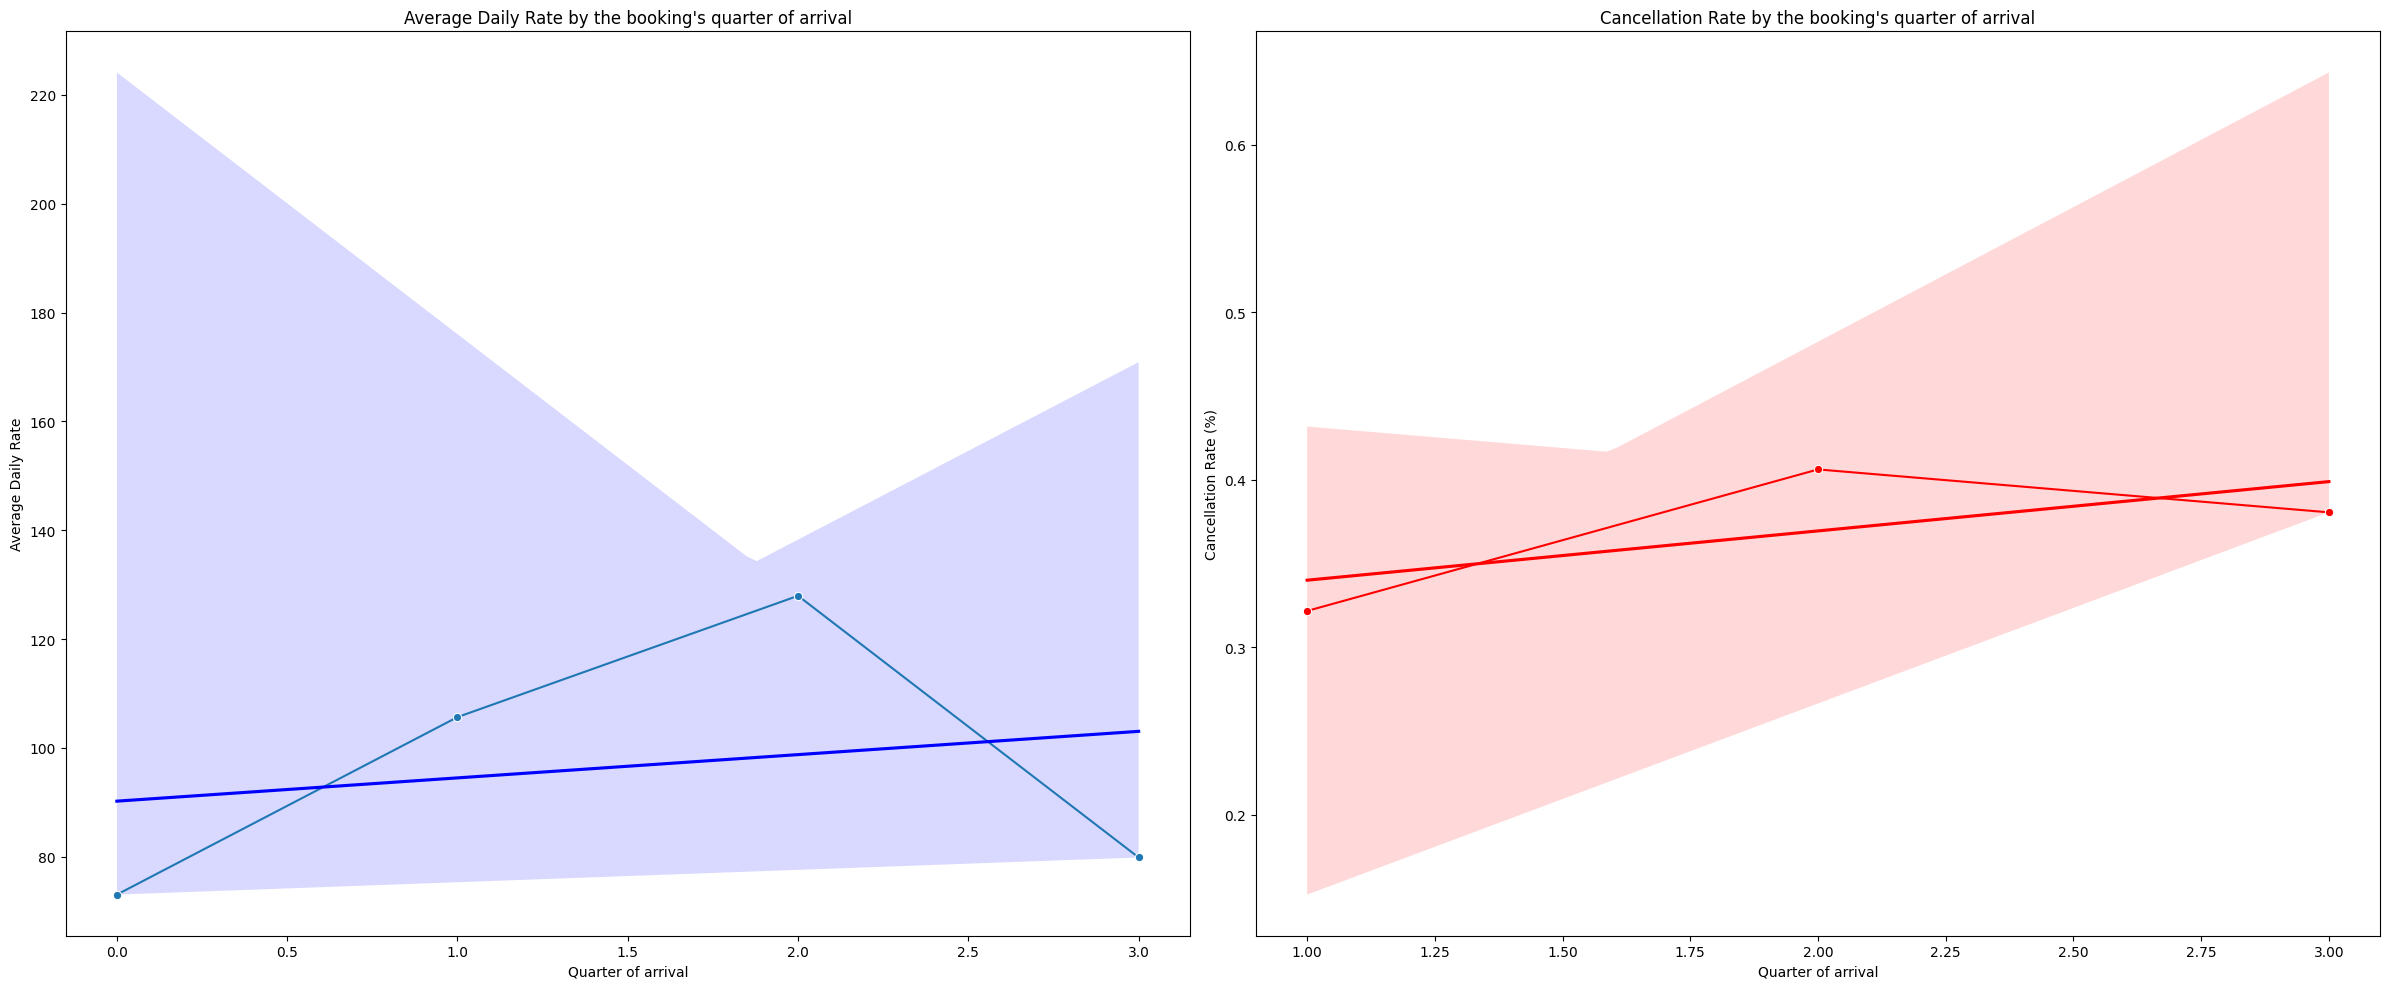

In [27]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('quarter_arrival')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('quarter_arrival').size() / df.groupby('quarter_arrival').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title("Average Daily Rate by the booking's quarter of arrival")
plt.xlabel('Quarter of arrival')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title("Cancellation Rate by the booking's quarter of arrival")
plt.xlabel('Quarter of arrival')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

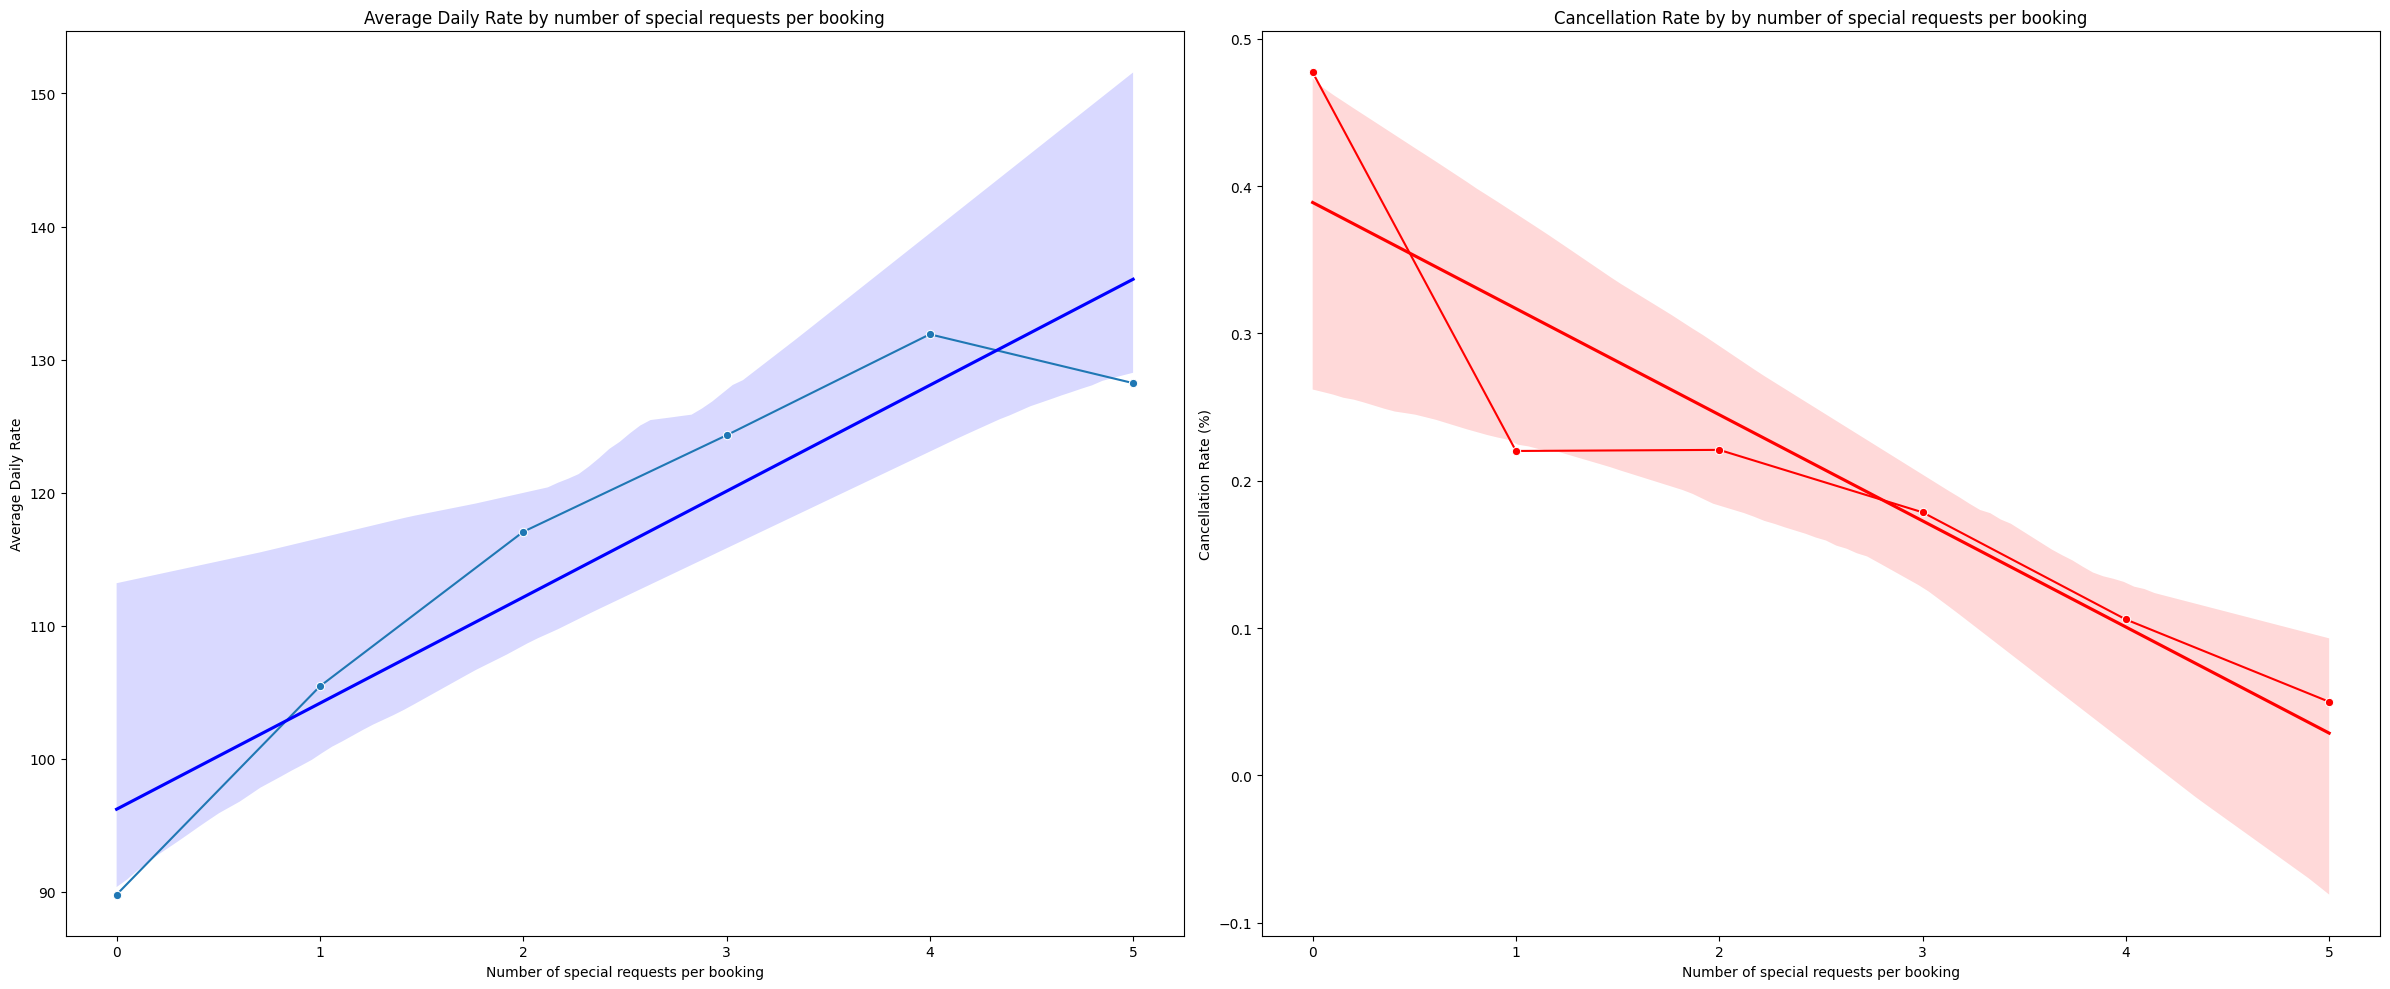

In [31]:
# Filtering out canceled bookings
completed_bookings = df[df['is_canceled'] == 0]

# Grouping the completed bookings by lead time and calculating the mean ADR
grouped_data = completed_bookings.groupby('total_of_special_requests')['adr'].mean().reset_index()

# Calculating cancellation rate
grouped_data['cancellation_rate'] = (df[df['is_canceled'] == 1].groupby('total_of_special_requests').size() / df.groupby('total_of_special_requests').size())

# Plotting
plt.figure(figsize=(24, 10))

# ADR plot with trend line
plt.subplot(1, 2, 1)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='adr', marker='o')
sns.regplot(data=grouped_data, x=grouped_data.index, y='adr', scatter=False, color='blue')
plt.title("Average Daily Rate by number of special requests per booking")
plt.xlabel('Number of special requests per booking')
plt.ylabel('Average Daily Rate')

# Cancellation rate plot with trend line
plt.subplot(1, 2, 2)
sns.lineplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', marker='o', color='red')
sns.regplot(data=grouped_data, x=grouped_data.index, y='cancellation_rate', scatter=False, color='red')
plt.title("Cancellation Rate by by number of special requests per booking")
plt.xlabel('Number of special requests per booking')
plt.ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

## Insights from 2.a) Histogram display for the occurence-frequency of each numerical columns' values, 2.b) Boxplot display for the dispersion of each numerical columns' values and 2.c)Relation between metrics defining booking timing, duration, client-composition and preferences with average daily rates and cancellation rates

- **is_canceled (which takes the 0 value if the booking's completed and 1 if booking's canceled):** more bookings were completed than canceled, meaning the completed-bookings are the majority of temptative bookings, yet the difference between completed and cancelled isn't large enough to make the latter an outlier (the 25th and 50th percentiles are 0 but the 75th percentile is 1, which speaks of the still considerable amount of canceled bookings). The distribution's left-skewed and mean > median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> the point of improvement concerning the canx. % is that the % of total bookings canceled may certainly be dropped, the further bullet points will explore how so.

- **lead_time (measured in days):** as the lead-time increases, the frequency of bookings done decreases, with the majority of bookings having a lead-time under 100 days. The 25th and 50th percentiles are both under 100 days, with the 75th percentile being between 150 and 200 days. Outliers exist beyond the point of 350 days onwards. The distribution's left-skewed and mean > median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> we can't categorically say, without further context, that either a larger or smaller lead-time is better for business, although we can certainly say that a shorter lead-time results in money for the business in a quicker manner than in the case of a longer lead-time. Yet, adr and cancellation rate should also be considered in the assessment of what lead-times are best for business. That is why the charts "Average Daily Rate by Lead Time" and "Cancellation Rate by Lead Time" were created (available below). The plots show that, as lead-time grows, adr drops and canx. % increases. Therefore, and in conclusion, the point of improvement concerning lead-times is that we can certainly drop them.

- **arrival_date_year:** bookings in 2015 and 2016 make up the majority of the dataset's bookings, there are no outliers, both the 25th and 50th percentiles equal 2016, whilst the 75th percentile equals 2017; the number of yearly bookings increased from 2015 to 2016 and then decreased from 2016 to 2017. The distribution's right-skewed and mean > median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> discussing a point of improvement for this metric isn't logical, past time isn't an endogenous variable that one can change.

- **quarter_arrival:** bookings in the total of Q1, Q2 and Q3 make up the majority of the dataset's bookings, in fact they amount to 75% of those. There are no outliers, and the 25th, 50th and 75th percentile are, respectively, Q2, Q3 and again Q3. The number of bookings-per-quarter progressively increases from Q1 through Q3, then decreasing on Q4. The probability distribution is right-skewed and mean < median. 
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the lead_time metric, we can't categorically say the opportunity to improve is in a particular quarter without the context of how each month correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by booking's quarter of arrival" and "Cancellation Rate by booking's quarter of arrival" (below). Those two charts tell the tale that the point of improvement concerning quarter of arrival is on Q3 as that's the one bringing about the greatest adr and while it's also associated with a great canx. %, the latter metric certainly can be more easily improved (and to a large extent) via the hospitality establishments' actions than the former, which has a lot to do with exogenous factors like competition pricing and seasonality. Therefore, the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic (having their arrival being on Q3).

- **arrival_date_month:** the majority of bookings occur until (and including) August, the 25th percentile is month April, the 50th percentile is month July and the 75th percentile is month September. Outliers are non-existing. The distribution's right-skewed, is concave downward shaped and mean < median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the quarter_arrival metric, we can't categorically say the opportunity to improve is in a particular month without the context of how each month correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by Month of Arrival Date" and "Cancellation Rate by Month of Arrival Date" (below). Those two charts tell the tale that the point of improvement concerning month of arrival is on the months of the year between June and August (including those two) as those bring about the greatest adr and while they're also associated with a great canx. %, the latter metric certainly can be more easily improved (and to a large extent) via the hospitality establishments' actions than the former, which has a lot to do with exogenous factors like competition pricing and seasonality. Therefore, the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic (having their arrival being from June to August).

- **arrival_date_week_number:** the majority of bookings occur before or during the 29th week of the year and the 25th, 50th and 75th percentiles are, respectively, the 16th, 28th and 38th week of the year. Outliers are non-existing, the distribution's slightly right-skewed, is concave downward shaped and mean < median. 
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the arrival_date_month metric, we can't categorically say the opportunity to improve is in a particular week of the year without the context of how each week correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by Week of Arrival" and "Cancellation Rate by Week of Arrival" (below). Those two charts tell the tale that the point of improvement concerning week of arrival is on the weeks of the year between the 20th and 40th (including those two) as those bring about the greatest adr and while they're also associated with a great canx. %, the latter metric certainly can be more easily improved (and to a large extent) via the hospitality establishments' actions than the former, which has a lot to do with exogenous factors like competition pricing and seasonality. Therefore, the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic (having their arrival being from the 20th to the 40th week of the year).

- **arrival_date_day_of_month:** the majority of bookings occur before or during the 17 first days of the month and the 25th, 50th and 75th percentiles are, respectively, the 8th, 16th and 23rd days of the month. Outliers are non-existing, the distribution appears to have not much of skewe to the left or right side and is concave downward shaped. Mean < Median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the arrival_date_week_number metric, we can't categorically say the opportunity to improve is in a particular day of the month without the context of how each day correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by Day of Month" and "Cancellation Rate by Day of Month" (below). Those two charts tell the tale that the point of improvement concerning day of arrival is that the later days of the month are the ones bringing about the greatest adr and the smallest canx. %, so the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic.

- **stays_in_weekend_nights & stays_in_week_nights:** the majority of bookings include between 0 and 1 weekend nights and between 0 and 2 week nights. As far as bookings' weekend nights, the 25th, 50th and 75th percentiles are 0, 1 and 2, respectively, with a few outliers. As far as bookings' week nights, the 25th, 50th and 75th percentiles are 1, 2 & 3 respectively, with a few outliers. In both metrics, their probability distribution is left-skewed. In the case of weekend nights, mean < median. In the case of week nights, mean > median. 
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the arrival_date_day_of_month metric, we can't categorically say the opportunity to improve is in bookings with particular duration characteristics without the context of how each booking-duration correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by Number of Weekend Nights in the booking", "Cancellation Rate by Number of Weekend Nights in the booking", "Average Daily Rate by Number of Week Nights in the booking", "Cancellation Rate by Number of Week Nights in the booking" (all below). All those charts tell us the bookings of lower duration have the best adr and low canx. %s, so the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic.

- **total_number_of_days_in_stay:** the majority of bookings in the dataset (actually 75% of those) have a total number of days in stay being 4 or less. The 25h, 50th and 75th percentiles are, respectively, 2, 3 and 4 days, with many outliers existing over the duration of 5 days. The probability distribution is left-skewed, with the number of bookings per duration (in days) progressively dropping as the number of days increases. Mean > Median. 
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the stays_in_weekend_nights & stays_in_week_nights metrics, we can't categorically say the opportunity to improve is in bookings with particular duration characteristics without the context of how each booking-duration correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by total number of days in the booking" and "Cancellation Rate by total number of days in the booking" (below). Those charts tell us the bookings of lower duration have the best adr and low canx. %s, so the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic.

- **total_number_of_people (equals adults + children + babies):** the majority of bookings have their total number of people being 2, with all 25th, 50th and 75th percentiles being 2, with outliers bigger than the 75th percentile and smaller than the 25th percentile. The probability distribution is clearly left-skewed, with the frequency of bookings clearly decreasing as the total number of people per booking increases. Mean < Median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> as one could intuitively tell, the more the number of people per booking, the larger the adr (at least until that number reaches 5, from which adr actually decreases; that decrease is caused solely by the number of babies; more children and adults per booking always increase the adr, and do so in a linear way). Therefore, the point of improvement here would be to increase the number of adults and children per booked day until the number of adults and children reaches 5 or to increase the number of people (any and all, including babies) indefinitely. 

- **meal:** the majority of meals are bed and breakfast, to the extent that meal's data is distributed as follows: the 25th, 50th and 75th percentiles are all bed and breakfast.; there are outliers both bigger than the 75th percentile and smaller than the 25th percentile. The frequency of bookings progressively increases from self catering to bed and breakfast and then progressively decreases as it goes to half board and full board. The distribution's slightly right-skewed and mean > median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> as one could intuitively tell, the more meal-inclusive the booking is, the more the adr is; plus, the canx. % as it stands, is roughly the same between 1 (self catering) and 3 (half board). I will say the point of improvement, with this metric, would be to improve the average meal to 3 or even above 3 if the cancellation rate could be contained to the extent that the total actual revenue doesn't drop in comparison with an average meal of 3, ceterus paribus.

- **total_of_special_requests:** the majority of bookings (in fact, 75% of all bookings in the dataset) have either 0 or 1 special requests. The 25th, 50th and 75th percentile are, respectively, 0, 0 and 1. There are a few, not many, outliers. As the number of total special requests increases, the number of bookings on each category of number of special requests decreases. The probability distribution is left-skewed and mean > median.
- <ins>Opportunity to improve in the afore-cited metric:</ins> much like we saw with the total_number_of_people metric, we can't categorically say the opportunity to improve is in bookings with particular duration characteristics without the context of how each booking-duration correlates with adr and canx. %, which is why I plotted the charts "Average Daily Rate by number of special requests per booking" and "Cancellation Rate by special requests per booking" (below). Those charts tell us the bookings of higher number of special requests have the best adr and best canx. %s, so the hospitality companies featured on the dataset should find ways of increasing booked days with that characteristic.

## <ins>2.d) Filtered pivot tables detailing the top 20 bookings per average daily rate and cancellation rate</ins>

Below I'm showing 2 pivot tables, each displaying an assortment of our dataset's columns, those being:

- lead time cluster
- arrival date year
- quarter arrival
- total number of days in stay
- total number of people
- meal
- total of special requests
- hotel
- market segment
- distribution channel
- assigned room type
- customer type
- adr (on pivot table 1) / cancellation rate (on pivot table 2)

I believe the columns displayed above do give a complete view of the dataset's characteristics. Moreover, I filtered my pivot tables so that I wouldn't show fringe-categories that only represent little parts of our data. That is to say the filters do slice the dataset into its most important categories.

Some of the original dataframe's columns do not feature on the filters nor on the pivot tables because I considered them irrelevant to our analysis (column "reservation_status_month" would be unecessary to feature considering we're already looking at years and quarters of customers' arrivals).                                                                                                                   

Now, here are the chosen filters for the 2 pivot tables:

- Continent is Europe
- Not a repeated guest
- No previous cancellations
- No previous bookings canceled
- No booking changes
- Deposit type is 1
- No days in waiting list
- Assigned room type is A or D
- Distribution channel is Direct or TA/TO
- Market segment is Online TA, Groups, or Offline TA/TO
- No required car parking spaces
- Customer type is Transient or Transient-Party
- Reserved and assigned room match

The first pivot table has the top 20 combinations of the afore-mentioned columns that originate the most ADR.

The second pivot table has the top 20 combinations of the afore-mentioned columns that originate the least average cancellation rate.

In [29]:
# Apply filters
filtered_df = df[(df['continent_copy'] == 'Europe') &
                 (df['is_repeated_guest'] == 0) &
                 (df['previous_cancellations'] == 0) &
                 (df['previous_bookings_not_canceled'] == 0) &
                 (df['booking_changes'] == 0) &
                 (df['deposit_type'] == 1) &
                 (df['days_in_waiting_list'] == 0) &
                 ((df['assigned_room_type_copy'] == 'A') | (df['assigned_room_type_copy'] == 'D')) &
                 ((df['distribution_channel_copy'] == 'Direct') | (df['distribution_channel_copy'] == 'TA/TO')) &
                 ((df['market_segment_copy'] == 'Online TA') | (df['market_segment_copy'] == 'Groups') | (df['market_segment_copy'] == 'Offline TA/TO')) &
                 (df['required_car_parking_spaces'] == 0) &
                 ((df['customer_type_copy'] == 'Transient') | (df['customer_type_copy'] == 'Transient-Party')) &
                 (df['match_reserved_and_assigned_room'] == 1)]

# Grouping the filtered data and calculating metrics
completed_bookings = filtered_df[filtered_df['is_canceled'] == 0]
grouped_data = completed_bookings.groupby(['lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 
                                           'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 
                                           'total_of_special_requests', 'hotel_copy', 'market_segment_copy', 
                                           'distribution_channel_copy', 'assigned_room_type_copy', 'customer_type_copy'])[['adr']].mean().reset_index()

# Create pivot table
pivot_table = pd.pivot_table(grouped_data, values='adr', index=['lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 
                                                                'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 
                                                                'total_of_special_requests', 'hotel_copy', 'market_segment_copy', 
                                                                'distribution_channel_copy', 'assigned_room_type_copy', 'customer_type_copy'])

# Calculate rankings
pivot_table['adr_rank'] = pivot_table['adr'].rank(ascending=False, method='min')

# Sort by rankings
pivot_table.sort_values(by='adr_rank', ascending=True, inplace=True)

# Display pivot table with adr_rank column
print("Top 20 ADR:")
print(pivot_table[['adr', 'adr_rank']].head(20))

Top 20 ADR:
                                                                                                                                                                                                                                                 adr  \
lead_time_cluster arrival_date_year quarter_arrival total_number_of_days_in_stay total_number_of_people meal total_of_special_requests hotel_copy   market_segment_copy distribution_channel_copy assigned_room_type_copy customer_type_copy           
1                 2016              4               2                            2.0                    3    1                         Resort Hotel Groups              Direct                    D                       Transient-Party     325.00   
                                                    3                            2.0                    3    0                         City Hotel   Online TA           TA/TO                     D                       Transient           314.10

In [30]:
# Grouping the filtered data and calculating metrics
completed_bookings = filtered_df[filtered_df['is_canceled'] == 0]
grouped_data = completed_bookings.groupby(['lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 
                                           'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 
                                           'total_of_special_requests', 'hotel_copy', 'market_segment_copy', 
                                           'distribution_channel_copy', 'assigned_room_type_copy', 'customer_type_copy'])[['adr']].mean().reset_index()

# Calculating cancellation rate
cancellation_data = filtered_df[filtered_df['is_canceled'] == 1].groupby(['lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 
                                                                          'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 
                                                                          'total_of_special_requests', 'hotel_copy', 'market_segment_copy', 
                                                                          'distribution_channel_copy', 'assigned_room_type_copy', 'customer_type_copy']).size().reset_index(name='cancellation_count')
grouped_data = pd.merge(grouped_data, cancellation_data, how='left', on=['lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 
                                                                        'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 
                                                                        'total_of_special_requests', 'hotel_copy', 'market_segment_copy', 
                                                                        'distribution_channel_copy', 'assigned_room_type_copy', 'customer_type_copy'])
grouped_data['cancellation_rate'] = grouped_data['cancellation_count'] / (grouped_data['cancellation_count'] + grouped_data['adr'])

# Create pivot table
pivot_table = pd.pivot_table(grouped_data, values='cancellation_rate', index=['lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 
                                                                              'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 
                                                                              'total_of_special_requests', 'hotel_copy', 'market_segment_copy', 
                                                                              'distribution_channel_copy', 'assigned_room_type_copy', 'customer_type_copy'])

# Calculate rankings
pivot_table['cancellation_rate_rank'] = pivot_table['cancellation_rate'].rank(ascending=True, method='min')

# Sort by rankings
pivot_table.sort_values(by='cancellation_rate_rank', ascending=True, inplace=True)

# Display pivot table with cancellation_rate_rank column
print("Top 20 Cancellation Rate:")
print(pivot_table[['cancellation_rate', 'cancellation_rate_rank']].head(20))

Top 20 Cancellation Rate:
                                                                                                                                                                                                                                              cancellation_rate  \
lead_time_cluster arrival_date_year quarter_arrival total_number_of_days_in_stay total_number_of_people meal total_of_special_requests hotel_copy   market_segment_copy distribution_channel_copy assigned_room_type_copy customer_type_copy                      
1                 2017              3               4                            2.0                    3    2                         Resort Hotel Online TA           TA/TO                     D                       Transient                    0.003367   
                                                    5                            2.0                    3    2                         Resort Hotel Online TA           TA/TO                     A  

## Insights from 2.d) Filtered pivot tables detailing the top 20 bookings per average daily rate and cancellation rate

There is clearly a particular customer profile that brings about the greatest average daily rate and the lowest cancellation rate, and that profile's defined by:

- rather short lead time, meaning inside cluster 0 or 1 
- more recent bookings, 2016 and after
- bookings in the 3rd and 4th quarters of the year
- a duration of stay ranging from 2 to 7 days
- bookings with a total number of people ranging from 2 to 3
- a type of meal included in the accommodation always either 'bed & breakfast' or a more-inclusive option ('half board' or 'full board')
- a total of special requests ranging from 0 to 2
- bookings predominantely in a Resort Hotel rather than a City one
- bookings through an Online Travel Agency
- reserved rooms of type A or D
- bookings not done as part of any group or contract

## <ins>2.e) Correlation matrix relating all available booking characteristics to the actual average daily rate</ins>   

With the following correlation matrix I'm aiming at once again identifying which metrics of the dataset - meaning characteristics of an accommodation - best correlate with the success of a hospitality establishment, success that's best-measured by adr and cancellation rate (hereby concatenated as one actual_adr).

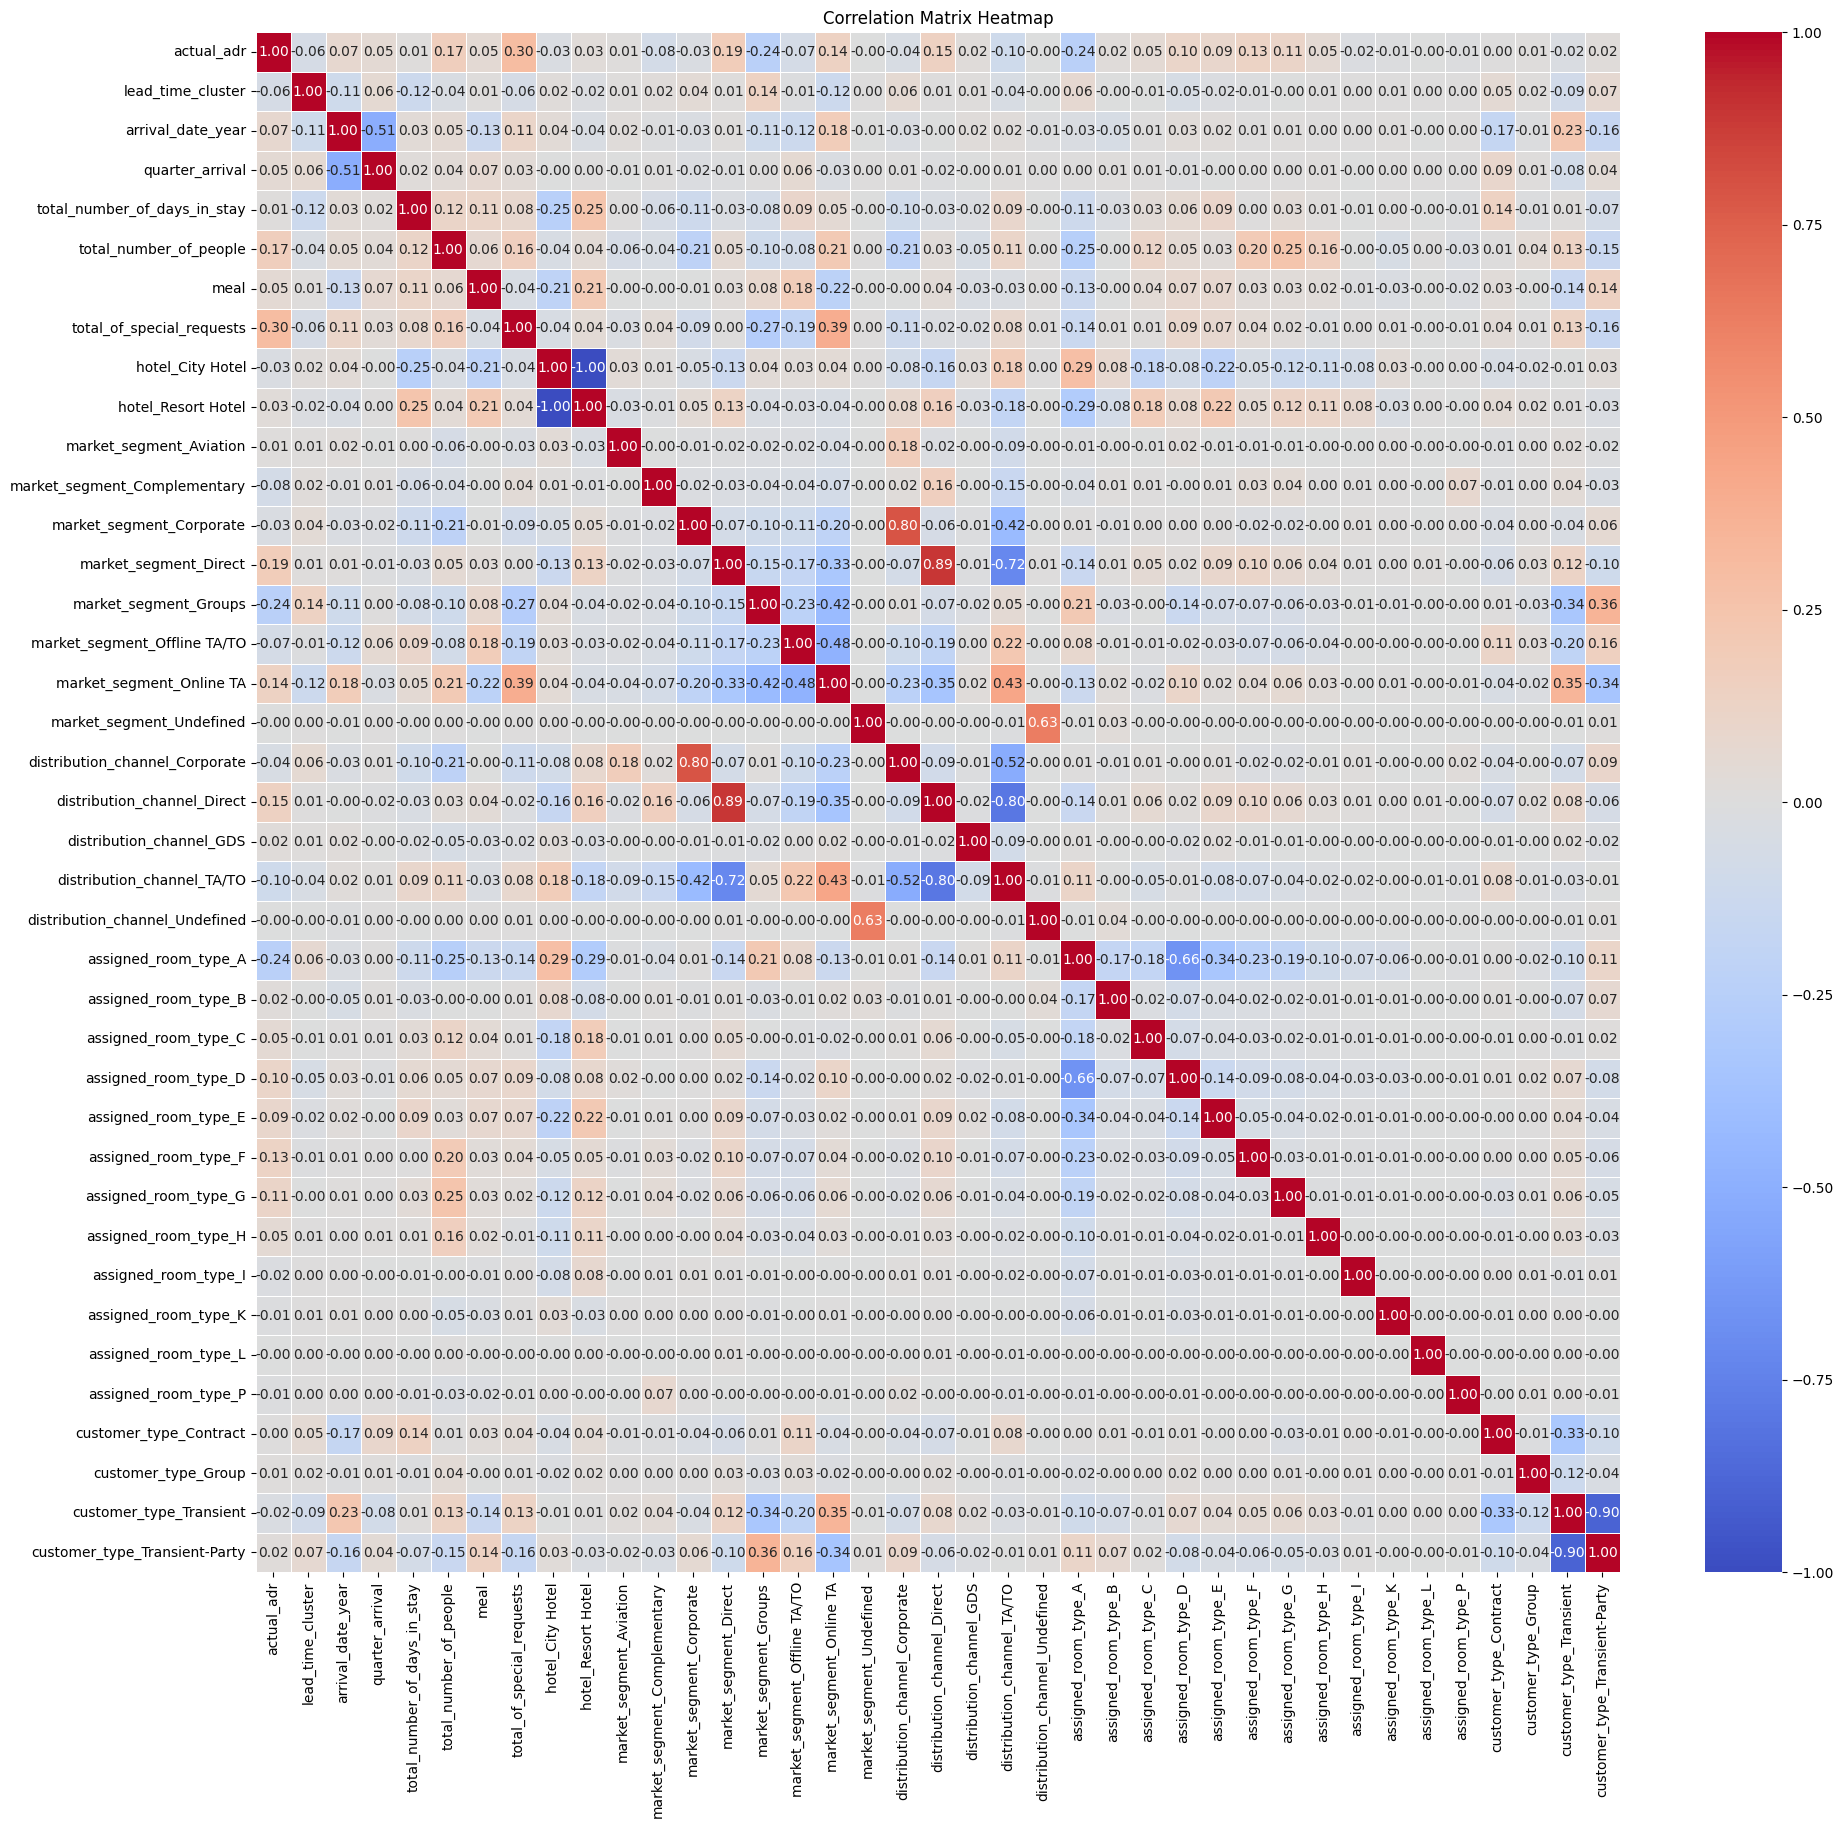

In [31]:
## Correlation matrix heatmap:

subset_df = df[['actual_adr', 'lead_time_cluster', 'arrival_date_year', 'quarter_arrival', 'total_number_of_days_in_stay', 'total_number_of_people', 'meal', 'total_of_special_requests', 'hotel_City Hotel', 'hotel_Resort Hotel', 'market_segment_Aviation', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined', 'distribution_channel_Corporate', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'distribution_channel_Undefined', 'assigned_room_type_A', 'assigned_room_type_B', 'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E', 'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H', 'assigned_room_type_I', 'assigned_room_type_K', 'assigned_room_type_L', 'assigned_room_type_P', 'customer_type_Contract', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party']]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(22,20))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title("Correlation Matrix Heatmap")

plt.show()

## Insights from 2.e) Correlation matrix relating all available booking characteristics to the actual average daily rate

I've drawn the matrix above with the objective of understanding which metrics of our dataset best-correlate with actual_adr (a metric which simultaneously takes into consideration adr and cancellation rate, which effectively have been my two evaluators of success for accommodations).

That very matrix allows me to look both for a) metrics that have strong direct correlation with actual_adr and b) metrics that have strong direct correlation with other metrics other than actual_adr that themselves are strongly correlated with actual_adr.

Starting with a), the metrics with a correlation coefficient either higher than 0.15 or smaller than -0.15 with actual_adr would be:

- total of special requests (0.30)
- market segment direct (0.19)
- total number of people (0.17)
- market segment groups (-0.24)
- assigned room A (-0.24)

As far as b), the metrics with a correlation coefficient either higher than 0.15 or smaller than -0.15 with any of the 6 latter metrics highlighted above would be:

(strongly correlating with total of special requests):

- total number of people (0.16)
- market segment groups (-0.27)
- market segment Offline TA/TO (-0.19)
- market segment Online TA (0.39)
- customer type Transient Party (-0.16)

(strongly correlating with market segment direct):

- market segment groups (-0.15)
- market segment Offline TA/TO (-0.17)
- market segment Online TA (-0.23)
- distribution channel Direct (0.89)
- distribution channel TA/TO (-0.72)

(strongly correlating with total number of people):

- total of special requests (0.16)
- market segment Corporate (-0.21)
- market segment Online TA (0.21)
- distribution channel Corporate (-0.21)
- assigned room type A (-0.25)
- assigned room type F (0.20)
- assigned room type G (0.25)
- assigned room type H (0.16)
- customer type Transient Party (-0.15)

(strongly correlated with market segment groups):

- total of special requests (-0.27)
- market segment direct (-0.15)
- market segment Offline TA/TO (-0.23)
- market segment Online TA (-0.42)
- assigned room type A (0.21)
- customer type Transient (-0.34)
- customer type Transient Party (0.36)

(strongly correlating with assigned room type A):

- total number of people (-0.25) 
- hotel City Hotel (0.29)
- hotel Resort Hotel (-0.29)
- market segment groups (0.21)
- assigned room type B (-0.17)
- assigned room type C (-0.18)
- assigned room type D (-0.66)
- assigned room type E (-0.34)
- assigned room type F (-0.23)
- assigned room type G (-0.19)

## Final conclusion and concise combination of all insights gathered through 2. Exploratory Data Analysis



The most efficient way for a hospitality establishment featured on the dataset or alike to increase revenue is to up the following metrics (ordered from most to least impactful), ceterus paribus:

- **Total of special requests per booking being, on average, more than 0.5714 (which is the currently observed mean of "total of special requests per booking").** This metric was chosen as the most impactful on this list because, out of all of the dataset's numerical columns, it was the one that most strongly correlated with actual ADR (0.30). Its 25th, 50th and 75th percentiles are, respectivelly, 0, 0 and 1. Given the low data dispersion of "total of special requests", which only has 3 outliers in the whole dataset, the task of increasing its mean may be considered hard, and that difficulty may be assuaged by changing metrics other than the one we're referring to that are either a) positively correlated with total of special requests and actual ADR or b) negatively correlated with total of special requests and actual ADR. Amongst the metrics that respect either of those conditions, the one with the strongest correlation to “total of special requests” is “market segment online TA” (0.39). Therefore, more nights booked via OTA could be a good option of increasing actual ADR via an increment of number of special requests. What’s more, and to corroborate the importance of upping "total of special requests": considering all data from the data frame after it’s been sliced as to only include its most-frequently-represented categories, 70% of the top 20 combinations of lead time, cluster arrival date year, quarter arrival, total number of days in stay, total number of people, meal, total of special requests, hotel, market segment, distribution channel, assigned room type and customer type that on average bring about the best adr, as well as 70% of the top 20 of such combinations that on average bring about the best cancellation rate have “total number of special requests” be 1 or more.

- **Percentage of total accommodations being assigned a room of type A being less than 62% (which is the currently observed mean of “assigned room A”).** This metric was chosen as the second most impactful on this list because, out of all of the dataset's numerical columns, it was the one with the second strongest correlation with actual ADR (-0.24). As naturally inferred by the fact that this binary metric takes the value of “1” in roughly 62% of cases, its 25th percentile is 0 whilst the 50th and 75th percentiles are all 1. One strategy to help reduce the metric is to change metrics other than the one we're referring to that are either a) negatively correlated with % of accommodations being assigned room of type A and positively correlated with actual ADR or b) positively correlated with % of accommodations being assigned room of type A and negatively correlated with actual ADR. Amongst the metrics that respect either of those conditions, the one with the strongest correlation to “assigned room type A” is “hotel City Hotel” (0.29). Therefore, less nights booked in “city Hotel”-type accommodations could be a good option of increasing actual ADR via a decrease in percentage of total accommodations being assigned a room of type A. What’s more, and to corroborate the importance of lessening the "% of bookings with assigned room of type A": considering only data from the data frame after it’s been sliced as to only include its most-frequently-represented categories, only 35% of the top 20 combinations of lead time, cluster arrival date year, quarter arrival, total number of days in stay, total number of people, meal, total of special requests, hotel, market segment, distribution channel, assigned room type and customer type that on average bring about the best adr, as well as only 55% of the top 20 of such combinations that on average bring about the best cancellation rate have their assigned room type be A.

- **Percentage of total accommodations being booked via “groups” being less than 16,59% (which is the currently observed mean of “market segment Groups”).** This metric was chosen as the third most impactful on this list because, out of all of the dataset's numerical columns, it was the one with the third strongest correlation with actual ADR (-0.24). As naturally inferred by the fact that this binary metric only takes the value of “1” in roughly 17% of cases, its 25th, 50th and 75th percentiles are all 0. One strategy to help reduce the metric is to change metrics other than the one we're referring to that are either a) negatively correlated with % of accommodations via groups and positively correlated with actual ADR or b) positively correlated with % of accommodations via groups and negatively correlated with actual ADR. Amongst the metrics that respect either of those conditions, the one with the strongest correlation to “market segment groups” is “market segment online TA” (-0.42). Therefore, more nights booked via OTA could be a good option of increasing actual ADR via a decrease in percentage of total accommodations booked via “groups”. Considering only data from the data frame after it’s been sliced as to only include its most-frequently-represented categories, “market segment Groups” isn’t represented on the top 20 combinations of lead time, cluster arrival date year, quarter arrival, total number of days in stay, total number of people, meal, total of special requests, hotel, market segment, distribution channel, assigned room type and customer type that on average bring about the best adr nor is it on the top 20 of such combinations that on average bring about the best cancellation rate.

- **Percentage of total accommodations being booked via “direct” being more than 10.6% (which is the currently observed mean of “market segment Direct”).** This metric was chosen as the fourth most impactful on this list because, out of all the dataset’s numerical columns, it was the one with the fourth strongest correlation with actual ADR (0.19). As naturally inferred by the fact that this binary metric only takes the value of “1” in roughly 11% of cases, its 25th, 50th and 75th percentiles are all 0. One strategy to help reduce the metric is to change metrics other than the one we're referring to that are either a) positively correlated with % of accommodations via direct and positively correlated with actual ADR or b) negatively correlated with % of accommodations via direct and negatively correlated with actual ADR. Amongst the metrics that respect either of those conditions, the one with the strongest correlation to “market segment direct” is “distribution channel direct” (0.89). Therefore, more nights booked in the direct market segment could be a good option of increasing actual ADR via an increase in percentage of total accommodations booked via direct channels. Considering only data from the data frame after it’s been sliced as to only include its most-frequently-represented categories, “market segment Direct” isn’t represented on the top 20 combinations of lead time, cluster arrival date year, quarter arrival, total number of days in stay, total number of people, meal, total of special requests, hotel, market segment, distribution channel, assigned room type and customer type that on average bring about the best adr nor is it on the top 20 of such combinations that on average bring about the best cancellation rate.

- **Total of people per booking being more than 1.97 (which is the currently observed mean of the “total number of people”).** This metric was chosen as the fifth most impactful on the list because, out of all the dataset’s numerical columns, it was the one with the fifth strongest correlation with actual ADR (0.17). Its 25th, 50th and 75th percentiles are all 2 and the metric’s distribution registers a considerable number of outliers. One strategy to increase the number of people per booking would be changing metrics other than the one we're referring to that are either a) positively correlated with total number of people and actual ADR or b) negatively correlated with total number of people and actual ADR. Amongst the metrics that respect either of those conditions, the one with the strongest correlation to “total number of people” is “assigned room type A” (-0.25). Therefore, more bookings with type A rooms assigned to them could be a good option of increasing actual ADR via an increment of number of people per booking. What’s more, and to corroborate the importance of upping "total number of people": considering all data from the data frame after it’s been sliced as to only include its most-frequently-represented categories, 100% of the top 20 combinations of lead time, cluster arrival date year, quarter arrival, total number of days in stay, total number of people, meal, total of special requests, hotel, market segment, distribution channel, assigned room type and customer type that on average bring about the best adr, as well as 100% of the top 20 of such combinations that on average bring about the best cancellation rate have “total number of people” be 2 or more.

# 3. Data Preprocessing for Machine Learning

## <ins>3.a) Outlier elimination</ins>

Generally, in prediction exercises, it's good practice to either remove or cap the outliers that make up the prediction model's input framework before proceeding to actual prediction, as outliers may skew projections.

The choice to either completely remove or merely cap outlying values depends on the outliers being legitimate datapoints or instead data errors. In the case of our dataframe, the outliers do represent actual bookings and so should be taken into account in any predictions, so I will choose to cap them.

In [33]:
numerical_columns_total = df.select_dtypes(include=['int64', 'float64']).drop(columns=['actual_adr', 'adr'])

# Calculating the IQR for each column
Q1 = numerical_columns_total.quantile(0.25)
Q3 = numerical_columns_total.quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the data points beyond the bounds
capped_data = numerical_columns_total.clip(lower=lower_bound, upper=upper_bound, axis=1)

## <ins>3.b) Dimensionality reduction via principal component analysis</ins>

Reducing the dimensionality of the data may be useful to reduce overfitting of any potential machine learning model (as high-dimensional datasets are more prone to overfitting), computational complexity and difficulty in visualization.

A way to carry out Dimensionality Reduction is via PCA (Principal Component Analysis), which transforms the original features into a new set of uncorrelated features, called principal components. These capture the maximum variance in the data.

In [34]:
from sklearn.decomposition import PCA

# Preparing the data
X = numerical_columns_total  # Features
y = df['actual_adr']         # Target variable

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA
n_components = 10 
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

## <ins>3.c) Distribution Fitting</ins>

Fitting our dataframe columns that'll serve as inputs in our predictive modeling to a commonly used probability distribution may increase the accuracy of our machine learning efforts if that fit is strong enough. Therefore, the normal and exponential distributions should be tested for their fitting to all our dataframe's numerical columns that aren't discrete (meaning they present continuous values) and aren't the output of our calculations (meaning they aren't "actual_adr" nor "adr"). By analyzing what columns respect that criteria, we understand that there are none that do such, hence distribution fitting will not be carried out in this analysis.

# 4. AB Testing

We’ll now conduct AB testing that will compare, for each of the 5 metrics highlighted as ADR-boosters in the final conclusions of 2. Exploratory Data Analysis, group a) the actual ADR mean of a data-cluster containing all accommodations whose ADR-booster metric falls under or is equal to its mean with group b) the actual ADR mean of a data-cluster containing all accommodations whose ADR-booster metric is larger than its mean.

We'll do such to corroborate the final conclusions of this analysis' chapter 2. If the conclusions featured on that chapter do stand the scrutiny of AB testing, we'll add confidence to our opinion that they are correct and indeed are successful vectors of revenue-increasing for accommodations alike those in the dataset.

To carry out the AB tests, we’ll conduct a student t-test and calculate the statistical significance and power associated with the experiments. In the end, depending on the results, we decide if we accept the null hypothesis (that there is no difference between groups in actual ADR caused by changing the ADR-booster metric) as true or instead accept the alternate hypothesis (that there is such a difference) as true.

If after any of the experiments the null hypothesis isn't rejected, then I’ll follow that AB test up with a second one in which the same group a) will be compared to a group b) that’ll be sliced so that its minimum value is 110% its previous minimum value. If the test’s results again indicate we should accept the null hypothesis, a new third test will follow that’ll copy the same logic we outlined, and so forth, until the results of the newest test indicate the rejection of the null hypothesis. This will show the measure of change needed in the ADR booster metric to actually increase ADR. 

Each test’s results will also include a measure of effect size (in the form of Cohen’s d), which will tell the magnitude of the difference between the means of group a) and b).

In [35]:
from scipy import stats
import statsmodels.stats.power as smp

# AB test for total of special requests per booking

# Creating the 2 groups that'll be compared with one another
group1 = df[df['total_of_special_requests'] <= df['total_of_special_requests'].mean()]
group2 = df[df['total_of_special_requests'] > df['total_of_special_requests'].mean()]

mean_group1 = group1['actual_adr'].mean()
mean_group2 = group2['actual_adr'].mean()

# Calculating the t-stat and p-value
t_statistic, p_value = stats.ttest_ind(group2['actual_adr'], group1['actual_adr'])

# Calculating the effect size (Cohen's d)
pooled_std = np.sqrt(((len(group1) - 1) * group1['actual_adr'].std() ** 2 + (len(group2) - 1) * group2['actual_adr'].std() ** 2) / (len(group1) + len(group2) - 2))

effect_size = (mean_group2 - mean_group1) / pooled_std

# Calculating the power of test for both groups
power_group1 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group1), alpha=0.05)
power_group2 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group2), alpha=0.05)

if p_value < 0.05:
    hypothesis_decision = "reject the null hypothesis"
else:
    hypothesis_decision = "accept the null hypothesis"

print("Mean of actual_adr for group 1:", mean_group1)
print("Mean of actual_adr for group 2:", mean_group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Effect size:", effect_size)
print("Power of the test for group 1:", power_group1)
print("Power of the test for group 2:", power_group2)
print("The test is {}, its statistical power is {} and so we {}".format(
    "statistically significant" if p_value < 0.05 else "not statistically significant",
    "high" if power_group1 > 0.8 and power_group2 > 0.8 else "low",
    hypothesis_decision))

Mean of actual_adr for group 1: 46.944797918029536
Mean of actual_adr for group 2: 85.88626161558525
T-statistic: 112.08277265186277
P-value: 0.0
Effect size: 0.6592842603606506
Power of the test for group 1: 1.0
Power of the test for group 2: 1.0
The test is statistically significant, its statistical power is high and so we reject the null hypothesis


In [36]:
# AB test for assigned room type A

# Creating the 2 groups that'll be compared with one another
group1 = df[df['assigned_room_type_A'] <= df['assigned_room_type_A'].mean()]
group2 = df[df['assigned_room_type_A'] > df['assigned_room_type_A'].mean()]

mean_group1 = group1['actual_adr'].mean()
mean_group2 = group2['actual_adr'].mean()

# Calculating the t-stat and p-value
t_statistic, p_value = stats.ttest_ind(group2['actual_adr'], group1['actual_adr'])

# Calculating the effect size (Cohen's d)
pooled_std = np.sqrt(((len(group1) - 1) * group1['actual_adr'].std() ** 2 + (len(group2) - 1) * group2['actual_adr'].std() ** 2) / (len(group1) + len(group2) - 2))

effect_size = (mean_group2 - mean_group1) / pooled_std

# Calculating the power of test for both groups
power_group1 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group1), alpha=0.05)
power_group2 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group2), alpha=0.05)

if p_value < 0.05:
    hypothesis_decision = "reject the null hypothesis"
else:
    hypothesis_decision = "accept the null hypothesis"

print("Mean of actual_adr for group 1:", mean_group1)
print("Mean of actual_adr for group 2:", mean_group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Effect size:", effect_size)
print("Power of the test for group 1:", power_group1)
print("Power of the test for group 2:", power_group2)
print("The test is {}, its statistical power is {} and so we {}".format(
    "statistically significant" if p_value < 0.05 else "not statistically significant",
    "high" if power_group1 > 0.8 and power_group2 > 0.8 else "low",
    hypothesis_decision))

Mean of actual_adr for group 1: 81.74161126673577
Mean of actual_adr for group 2: 51.4463357325159
T-statistic: -84.20786093885283
P-value: 0.0
Effect size: -0.5021562743706822
Power of the test for group 1: 1.0
Power of the test for group 2: 1.0
The test is statistically significant, its statistical power is high and so we reject the null hypothesis


In [37]:
# AB test for market segment Groups

# Creating the 2 groups that'll be compared with one another
group1 = df[df['market_segment_Groups'] <= df['market_segment_Groups'].mean()]
group2 = df[df['market_segment_Groups'] > df['market_segment_Groups'].mean()]

mean_group1 = group1['actual_adr'].mean()
mean_group2 = group2['actual_adr'].mean()

# Calculating the t-stat and p-value
t_statistic, p_value = stats.ttest_ind(group2['actual_adr'], group1['actual_adr'])

# Calculating the effect size (Cohen's d)
pooled_std = np.sqrt(((len(group1) - 1) * group1['actual_adr'].std() ** 2 + (len(group2) - 1) * group2['actual_adr'].std() ** 2) / (len(group1) + len(group2) - 2))

effect_size = (mean_group2 - mean_group1) / pooled_std

# Calculating the power of test for both groups
power_group1 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group1), alpha=0.05)
power_group2 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group2), alpha=0.05)

if p_value < 0.05:
    hypothesis_decision = "reject the null hypothesis"
else:
    hypothesis_decision = "accept the null hypothesis"

print("Mean of actual_adr for group 1:", mean_group1)
print("Mean of actual_adr for group 2:", mean_group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Effect size:", effect_size)
print("Power of the test for group 1:", power_group1)
print("Power of the test for group 2:", power_group2)
print("The test is {}, its statistical power is {} and so we {}".format(
    "statistically significant" if p_value < 0.05 else "not statistically significant",
    "high" if power_group1 > 0.8 and power_group2 > 0.8 else "low",
    hypothesis_decision))

Mean of actual_adr for group 1: 69.49995701905021
Mean of actual_adr for group 2: 30.030725859371053
T-statistic: -84.08945572721228
P-value: 0.0
Effect size: -0.6541667082145391
Power of the test for group 1: 1.0
Power of the test for group 2: 1.0
The test is statistically significant, its statistical power is high and so we reject the null hypothesis


In [38]:
# AB test for market segment Direct

# Creating the 2 groups that'll be compared with one another
group1 = df[df['market_segment_Direct'] <= df['market_segment_Direct'].mean()]
group2 = df[df['market_segment_Direct'] > df['market_segment_Direct'].mean()]

mean_group1 = group1['actual_adr'].mean()
mean_group2 = group2['actual_adr'].mean()

# Calculating the t-stat and p-value
t_statistic, p_value = stats.ttest_ind(group2['actual_adr'], group1['actual_adr'])

# Calculating the effect size (Cohen's d)
pooled_std = np.sqrt(((len(group1) - 1) * group1['actual_adr'].std() ** 2 + (len(group2) - 1) * group2['actual_adr'].std() ** 2) / (len(group1) + len(group2) - 2))

effect_size = (mean_group2 - mean_group1) / pooled_std

# Calculating the power of test for both groups
power_group1 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group1), alpha=0.05)
power_group2 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group2), alpha=0.05)

if p_value < 0.05:
    hypothesis_decision = "reject the null hypothesis"
else:
    hypothesis_decision = "accept the null hypothesis"

print("Mean of actual_adr for group 1:", mean_group1)
print("Mean of actual_adr for group 2:", mean_group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Effect size:", effect_size)
print("Power of the test for group 1:", power_group1)
print("Power of the test for group 2:", power_group2)
print("The test is {}, its statistical power is {} and so we {}".format(
    "statistically significant" if p_value < 0.05 else "not statistically significant",
    "high" if power_group1 > 0.8 and power_group2 > 0.8 else "low",
    hypothesis_decision))

Mean of actual_adr for group 1: 59.0013372789931
Mean of actual_adr for group 2: 96.40457956528637
T-statistic: 65.08382725168464
P-value: 0.0
Effect size: 0.612936262618033
Power of the test for group 1: 1.0
Power of the test for group 2: 1.0
The test is statistically significant, its statistical power is high and so we reject the null hypothesis


In [39]:
# AB test for total number of people

# Creating the 2 groups that'll be compared with one another
group1 = df[df['total_number_of_people'] <= df['total_number_of_people'].mean()]
group2 = df[df['total_number_of_people'] > df['total_number_of_people'].mean()]

mean_group1 = group1['actual_adr'].mean()
mean_group2 = group2['actual_adr'].mean()

# Calculating the t-stat and p-value
t_statistic, p_value = stats.ttest_ind(group2['actual_adr'], group1['actual_adr'])

# Calculating the effect size (Cohen's d)
pooled_std = np.sqrt(((len(group1) - 1) * group1['actual_adr'].std() ** 2 + (len(group2) - 1) * group2['actual_adr'].std() ** 2) / (len(group1) + len(group2) - 2))

effect_size = (mean_group2 - mean_group1) / pooled_std

# Calculating the power of test for both groups
power_group1 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group1), alpha=0.05)
power_group2 = smp.TTestIndPower().power(effect_size=effect_size, nobs1=len(group2), alpha=0.05)

if p_value < 0.05:
    hypothesis_decision = "reject the null hypothesis"
else:
    hypothesis_decision = "accept the null hypothesis"

print("Mean of actual_adr for group 1:", mean_group1)
print("Mean of actual_adr for group 2:", mean_group2)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Effect size:", effect_size)
print("Power of the test for group 1:", power_group1)
print("Power of the test for group 2:", power_group2)
print("The test is {}, its statistical power is {} and so we {}".format(
    "statistically significant" if p_value < 0.05 else "not statistically significant",
    "high" if power_group1 > 0.8 and power_group2 > 0.8 else "low",
    hypothesis_decision))

Mean of actual_adr for group 1: 53.966566055972926
Mean of actual_adr for group 2: 65.06682176158296
T-statistic: 24.32242797278989
P-value: 2.362761784223097e-130
Effect size: 0.17920143791317047
Power of the test for group 1: 1.0
Power of the test for group 2: 1.0
The test is statistically significant, its statistical power is high and so we reject the null hypothesis


## Final conclusion from 4. AB Testing

For all 5 of our ADR booster metrics, the t-test shows the alternate hypothesis (that the change on those metrics do have an effect on actual ADR) is true, plus each of those boosters except "total number of people" do have a strong effect size (over 0.5) which tells us that, for the top 4 ADR boosters, the magnitude of the effect on actual daily revenue will be considerable if the suggested changes do take place. As for the "total number of people", the effect size is rather small, albeit confirmed to exist.

# 5. Machine Learning Model predicting Actual Average Daily Rate

To end the analysis, I will train a regression model fed by a number of selected inputs to predict Actual ADR (with inputs naturally being the columns in our database that we believed to be, together, the best indicators of the indicated output).

That model will also be tested against unseen data of our dataframe and measured for its prediction-accuracy.

The first step of this is preparing our dataframe specifically for the analysis and that'll be done via a) Dimensionality Reduction, b) Outlier Elimination & c) Distribution Fitting, all carried out below.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Spliting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Formulating the predictive model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating the predictive model's accuracy

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 10.047369285534804
Mean Squared Error: 414.7795119072292
Root Mean Squared Error: 20.36613640107591
R-squared: 0.8913882462162245


## Final conclusion from 5. Machine Learning Model predicting Actual Average Daily Rate

The model's accuracy testing reveals a very-high accuracy in predicting Actual ADR and can be interpreted as follows:

- the average absolute difference between the predicted and actual values of "actual ADR" is 10 monetary units (which is only 16% of the average and median values of "actual ADR")
- the average squared difference between the predicted and actual values of "actual ADR" is 415 monetary units
- the average square root of the squared difference between the predicted and actual values of "actual ADR" is 20.3 monetary units (which is only 32% of both the average and median values of "actual ADR")
- the percentage of the variance in the actual average daily rate explained by the model is 89%